# AUTOENCODERS

In [6]:
import torch
import torch.nn as nn

# Define a simple fully connected neural network class
class SimpleFCNN(nn.Module):
    def __init__(self):
        super(SimpleFCNN, self).__init__()
        
        # Define a single linear layer since we want a model with only nn.Linear
        # This layer directly maps 4 input features to 4 output features
        self.fc = nn.Linear(in_features=2, out_features=1)

    def forward(self, x):
        # Pass the input through the fully connected layer
        output = self.fc(x)
        return output

# Instantiate the fully connected neural network
fcnn_model = SimpleFCNN()

# Print the model structure
fcnn_model.state_dict()


OrderedDict([('fc.weight', tensor([[ 0.1893, -0.5814]])),
             ('fc.bias', tensor([0.6679]))])

In [7]:
import torch
import torch.nn as nn

# Define a simple autoencoder class
class SimpleAutoencoder(nn.Module):
    def __init__(self):
        super(SimpleAutoencoder, self).__init__()
        
        # Since this model only has input and output layers, and both have 4 neurons,
        # we directly connect them without any hidden layers or compression
        self.encoder = nn.Linear(in_features=4, out_features=4)
        self.decoder = nn.Linear(in_features=4, out_features=4)

    def forward(self, x):
        # Encoding
        encoded = self.encoder(x)
        # Decoding
        decoded = self.decoder(encoded)
        return decoded

# Instantiate the model
model = SimpleAutoencoder()

# Print the model structure
model.state_dict()


OrderedDict([('encoder.weight',
              tensor([[-0.3758, -0.1041, -0.1434,  0.2611],
                      [-0.2135,  0.0050,  0.0057,  0.2078],
                      [-0.3465,  0.0528,  0.4432, -0.4202],
                      [-0.3720, -0.2820,  0.0533, -0.4373]])),
             ('encoder.bias', tensor([ 0.4317,  0.2250, -0.2415,  0.3843])),
             ('decoder.weight',
              tensor([[ 0.0681,  0.1031, -0.1947, -0.2338],
                      [ 0.4484,  0.2925,  0.0275,  0.2679],
                      [ 0.3199, -0.0778,  0.3124,  0.1674],
                      [-0.3417,  0.3060,  0.4230,  0.0902]])),
             ('decoder.bias', tensor([-0.1925,  0.0099,  0.4207, -0.3289]))])

Epoch [1], Loss: 0.2895
Epoch [201], Loss: 0.0442
Epoch [401], Loss: 0.0293
Epoch [601], Loss: 0.0224
Epoch [801], Loss: 0.0169
Epoch [1001], Loss: 0.0125
Epoch [1201], Loss: 0.0095
Epoch [1401], Loss: 0.0073
Epoch [1601], Loss: 0.0058
Epoch [1801], Loss: 0.0046
Epoch [2001], Loss: 0.0038
Epoch [2201], Loss: 0.0031
Epoch [2401], Loss: 0.0027
Epoch [2601], Loss: 0.0024
Epoch [2801], Loss: 0.0022
Epoch [3001], Loss: 0.0021
Epoch [3201], Loss: 0.0020
Epoch [3401], Loss: 0.0020
Epoch [3601], Loss: 0.0019
Epoch [3801], Loss: 0.0019
Epoch [4001], Loss: 0.0019
Epoch [4201], Loss: 0.0018
Epoch [4401], Loss: 0.0018
Epoch [4601], Loss: 0.0018
Epoch [4801], Loss: 0.0017
Epoch [5001], Loss: 0.0017
Epoch [5201], Loss: 0.0017
Epoch [5401], Loss: 0.0016
Epoch [5601], Loss: 0.0016
Epoch [5801], Loss: 0.0016
Epoch [6001], Loss: 0.0016
Epoch [6201], Loss: 0.0015
Epoch [6401], Loss: 0.0015
Epoch [6601], Loss: 0.0015
Epoch [6801], Loss: 0.0014
Epoch [7001], Loss: 0.0014
Epoch [7201], Loss: 0.0013
Epoch [7

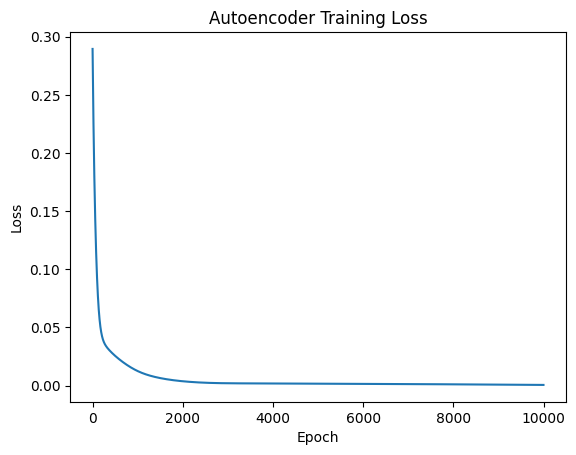

OrderedDict([('encoder.0.weight', tensor([[-0.1491,  0.1030,  0.2583,  0.3129],
        [-0.8394,  0.1675, -0.6275,  1.3021],
        [-0.6996, -1.4989,  0.4503,  0.0207],
        [-0.2703,  0.0397,  0.1322, -0.7776]])), ('encoder.0.bias', tensor([-0.2297, -0.3720,  1.4542,  0.5918])), ('decoder.0.weight', tensor([[-0.7612, -0.8565, -0.5108, -1.6314],
        [ 1.4472,  0.3099, -1.5272,  0.8879],
        [ 3.4464, -0.8387,  0.2049,  0.2106],
        [ 0.6167,  0.2354,  0.1281, -1.4512]])), ('decoder.0.bias', tensor([0.8683, 1.3084, 0.0721, 0.8289]))])


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

class Autoencoder(nn.Module):
    def __init__(self, num_neurons, inputs, lr, max_epochs, stabilization_threshold, check_interval):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.inputs = inputs
        self.lr = lr
        self.max_epochs = max_epochs
        self.stabilization_threshold = stabilization_threshold
        self.check_interval = check_interval
        self.optimizer = optim.Adam(self.parameters(), lr=self.lr)
        self.criterion = nn.MSELoss()
        self.loss_values = []

        # Start training upon instantiation
        self.train_autoencoder()

        # Save the state dictionary for future use
        self.state_dict = self.state_dict()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    def train_autoencoder(self):
        epoch = 0
        while True:
            self.optimizer.zero_grad()
            outputs = self(self.inputs)
            loss = self.criterion(outputs, self.inputs)
            loss.backward()
            self.optimizer.step()

            self.loss_values.append(loss.item())

            # Print loss every 100 epochs
            if epoch % 200 == 0:
                print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')
            
            # Check for stopping condition every 'check_interval' epochs
            if epoch >= self.check_interval:
                recent_loss_decay = self.loss_values[-self.check_interval] - self.loss_values[-1]
                if recent_loss_decay < self.stabilization_threshold:
                    print(f'Training stopped due to loss stabilization at Epoch [{epoch+1}], Loss: {loss.item():.4f}')
                    break

            epoch += 1
            if epoch >= self.max_epochs:
                print(f'Training stopped after reaching maximum epochs at Epoch [{epoch}], Loss: {loss.item():.4f}')
                break

    def plot_loss(self):
        plt.plot(self.loss_values)
        plt.title('Autoencoder Training Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.show()

# Example usage:
# Assuming the parameters are defined as before:
autoencoder = Autoencoder(num_neurons=4, inputs=torch.rand(10, 4), lr=0.001, max_epochs=10000, stabilization_threshold=0.00001, check_interval=200)
autoencoder.plot_loss()

# To access the saved state_dict:
print(autoencoder.state_dict)


### Simple and ComplicatedFCNN

In [9]:
import torch.optim as optim

class SimpleFCNN(nn.Module):
    def __init__(self, in_features, out_features):
        super(SimpleFCNN, self).__init__()
        self.fc = nn.Linear(in_features=in_features, out_features=out_features)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = self.activation(x)
        return x
    
    def train_model(self, inputs, targets, epochs=100, lr=0.01):
        criterion = nn.MSELoss()
        optimizer = optim.SGD(self.parameters(), lr=lr)
        for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = self(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

class ComplicatedFCNN(nn.Module):
    def __init__(self, input_layer_features, hidden_layers_neurons, output_layer_features, inputs, targets):
        super(ComplicatedFCNN, self).__init__()
        
        # Instantiate and train SimpleFCNN with inputs
        self.simple_fcnn = SimpleFCNN(in_features=hidden_layers_neurons, out_features=hidden_layers_neurons)
        self.simple_fcnn.train_model(inputs, targets)
        simple_fcnn_state_dict = self.simple_fcnn.state_dict()
        
        # Define the complicated model using nn.Sequential
        self.model = nn.Sequential(
            nn.Linear(in_features=input_layer_features, out_features=hidden_layers_neurons),
            nn.Tanh(),
            nn.Linear(in_features=hidden_layers_neurons, out_features=hidden_layers_neurons),
            nn.Tanh(),
            nn.Linear(in_features=hidden_layers_neurons, out_features=hidden_layers_neurons),
            nn.Tanh(),
            nn.Linear(in_features=hidden_layers_neurons, out_features=output_layer_features),
        )
        
        # Load the trained state_dict from SimpleFCNN into the last hidden layer of ComplicatedFCNN
        self.model[4].weight.data = simple_fcnn_state_dict['fc.weight']
        self.model[4].bias.data = simple_fcnn_state_dict['fc.bias']

    def forward(self, x):
        return self.model(x)


Epoch [1/100], Loss: 0.4516
Epoch [11/100], Loss: 0.4027
Epoch [21/100], Loss: 0.3577
Epoch [31/100], Loss: 0.3173
Epoch [41/100], Loss: 0.2817
Epoch [51/100], Loss: 0.2507
Epoch [61/100], Loss: 0.2239
Epoch [71/100], Loss: 0.2009
Epoch [81/100], Loss: 0.1812
Epoch [91/100], Loss: 0.1645
Epoch [101/100], Loss: 0.1501
Epoch [111/100], Loss: 0.1379
Epoch [121/100], Loss: 0.1274
Epoch [131/100], Loss: 0.1184
Epoch [141/100], Loss: 0.1108
Epoch [151/100], Loss: 0.1042
Epoch [161/100], Loss: 0.0985
Epoch [171/100], Loss: 0.0936
Epoch [181/100], Loss: 0.0893
Epoch [191/100], Loss: 0.0856
Epoch [201/100], Loss: 0.0823
Epoch [211/100], Loss: 0.0794
Epoch [221/100], Loss: 0.0769
Epoch [231/100], Loss: 0.0747
Epoch [241/100], Loss: 0.0726
Epoch [251/100], Loss: 0.0708
Epoch [261/100], Loss: 0.0692
Epoch [271/100], Loss: 0.0677
Epoch [281/100], Loss: 0.0663
Epoch [291/100], Loss: 0.0651
Epoch [301/100], Loss: 0.0639
Epoch [311/100], Loss: 0.0628
Epoch [321/100], Loss: 0.0618
Epoch [331/100], Loss

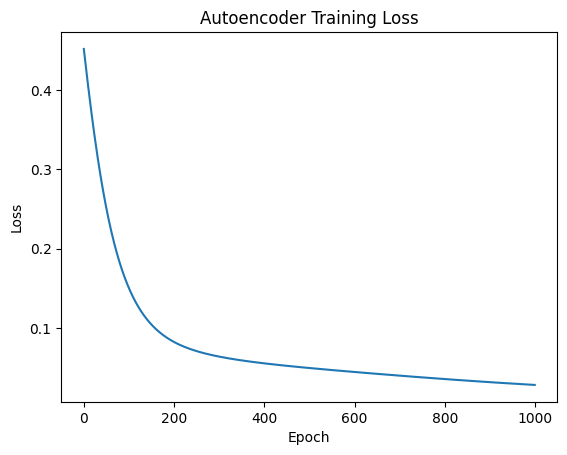

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the autoencoder class with dynamic neuron numbers
class Autoencoder(nn.Module):
    def __init__(self, num_neurons=4):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the autoencoder
autoencoder = Autoencoder(num_neurons=4)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Dummy input data
inputs = torch.rand(10, 4)  # Batch size of 10, 4 features each

# List to store loss values
loss_values = []

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = autoencoder(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')

# Plotting the loss
plt.plot(loss_values)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


Epoch [1], Loss: 0.6053
Epoch [101], Loss: 0.2911
Epoch [201], Loss: 0.1171
Epoch [301], Loss: 0.0683
Epoch [401], Loss: 0.0566
Epoch [501], Loss: 0.0521
Epoch [601], Loss: 0.0493
Epoch [701], Loss: 0.0472
Epoch [801], Loss: 0.0452
Epoch [901], Loss: 0.0432
Epoch [1001], Loss: 0.0411
Epoch [1101], Loss: 0.0386
Epoch [1201], Loss: 0.0359
Epoch [1301], Loss: 0.0328
Epoch [1401], Loss: 0.0295
Epoch [1501], Loss: 0.0260
Epoch [1601], Loss: 0.0225
Epoch [1701], Loss: 0.0191
Epoch [1801], Loss: 0.0161
Epoch [1901], Loss: 0.0135
Epoch [2001], Loss: 0.0114
Epoch [2101], Loss: 0.0098
Epoch [2201], Loss: 0.0085
Epoch [2301], Loss: 0.0075
Epoch [2401], Loss: 0.0067
Epoch [2501], Loss: 0.0060
Epoch [2601], Loss: 0.0054
Epoch [2701], Loss: 0.0048
Epoch [2801], Loss: 0.0043
Epoch [2901], Loss: 0.0039
Epoch [3001], Loss: 0.0035
Epoch [3101], Loss: 0.0033
Epoch [3201], Loss: 0.0030
Epoch [3301], Loss: 0.0028
Epoch [3401], Loss: 0.0027
Epoch [3501], Loss: 0.0026
Training stopped due to loss stabilizati

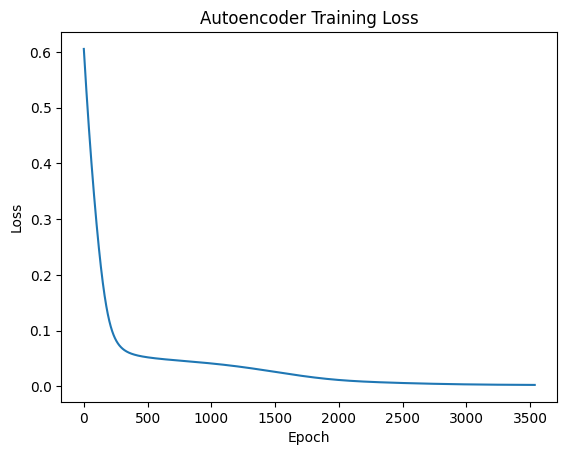

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the autoencoder class with dynamic neuron numbers
class Autoencoder(nn.Module):
    def __init__(self, num_neurons=4):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )
        self.decoder = nn.Sequential(
            nn.Linear(num_neurons, num_neurons),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Initialize the autoencoder
autoencoder = Autoencoder(num_neurons=4)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Dummy input data
inputs = torch.rand(10, 4)  # Batch size of 10, 4 features each

# List to store loss values
loss_values = []

# Training parameters
max_epochs = 10000  # Maximum number of epochs
stabilization_threshold = 0.0001  # Threshold for loss stabilization
check_interval = 100  # Interval for checking loss stabilization

# Training loop
epoch = 0
while True:
    optimizer.zero_grad()
    outputs = autoencoder(inputs)
    loss = criterion(outputs, inputs)
    loss.backward()
    optimizer.step()

    loss_values.append(loss.item())

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')
    
    # Check for stopping condition every 'check_interval' epochs after at least 'check_interval' epochs have been run
    if epoch >= check_interval:
        # Calculate loss decay over the last 'check_interval' epochs
        recent_loss_decay = loss_values[-check_interval] - loss_values[-1]
        # Check if loss decay is below the threshold
        if recent_loss_decay < stabilization_threshold:
            print(f'Training stopped due to loss stabilization at Epoch [{epoch+1}], Loss: {loss.item():.4f}')
            break

    # Increment epoch counter
    epoch += 1
    # Check for maximum number of epochs
    if epoch >= max_epochs:
        print(f'Training stopped after reaching maximum epochs at Epoch [{epoch}], Loss: {loss.item():.4f}')
        break

# Plotting the loss
plt.plot(loss_values)
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


## STEP 5: Training the PINN

In [12]:
epochs = 50001
start = time.time()
# Creation of the variables loss1_history, loss2_history and loss3_history for printing the evolution of the contribution of every loss term:
# Plot the loss history as before

loss_ic1_history = []
loss_ic2_history = []
loss_differential_equation_history = []
loss_total_history = []

loss_history = []  # To track loss over epochs
threshold = 0.0001  # Predetermined threshold for stopping
check_range = 200
#initial_loss_value = 0.05

for i in range(epochs):
    optimiser.zero_grad()

    # compute initial condition 1 loss:
    ic1_predicted= original_model(ic1_t_mu)
    
    residuals_ic1 = ic1_predicted - ic1_scope
    
    loss_ic1 = torch.mean((ic1_predicted - ic1_scope)**2)
    loss_ic1_history.append(loss_ic1.item())


    # compute initial condition 2 loss:
    du_dtdmu_initial = torch.autograd.grad(outputs = ic1_predicted, inputs = ic1_t_mu, grad_outputs= torch.ones_like(ic1_predicted), create_graph= True)[0]
    ic2_du_dt, ic2_du_dmu = du_dtdmu_initial[:, 0:1], du_dtdmu_initial[:,1:2]
    
    residuals_ic2 = ic2_du_dt- ic2_scope
    
    loss_ic2 = torch.mean((ic2_du_dt- ic2_scope)**2)
    loss_ic2_history.append(loss_ic2.item())

    # compute physic loss:
    physic_domain_predicted = original_model(physic_domain_t_mu)
    physic_domain_du_dtdmu = torch.autograd.grad(outputs = physic_domain_predicted, inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_predicted), create_graph= True)[0]
    physic_domain_d2u_d2t_d2mu = torch.autograd.grad(outputs = physic_domain_du_dtdmu[:,0:1], inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_du_dtdmu[:,0:1]), create_graph= True)[0]
    
    residuals_differential_equation = physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted 
    
    loss_differential_equation = torch.mean( (physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted )**2)
    loss_differential_equation_history.append(loss_differential_equation.item())
    
    loss = loss_ic1 + lambda1 * loss_ic2 + lambda2 * loss_differential_equation
    loss_total_history.append(loss.item())
    loss_history.append(loss.item())
    if i ==1:
        
        initial_loss_value = loss.item()        
    
    loss.backward()
    optimiser.step()
    
    # Update loss history and ensure it contains the losses of the last check_range epochs
    if len(loss_history) > check_range:
        loss_history.pop(0)  # Remove the oldest loss value
    
    # Check if the difference between max and min loss in the last 100 epochs is within the threshold
    max_min_range = max(loss_history) - min(loss_history)
    absolut_loss_value = sum(loss_history) / len(loss_history)
    if len(loss_history) == check_range and max_min_range <= threshold and  absolut_loss_value < initial_loss_value:
        print(f"Stopping training at epoch {i} as the loss stabilized within the threshold.")
        print(f"max_min_range = {max_min_range} \n absolute_loss_value: {absolut_loss_value} ")
        break
    
    if i%1000 == 0:
        print(f"Shape of ic1 residuals: {residuals_ic1.shape}")
        print(f'Decomposition of the loss terms: \n loss({loss}) = loss1({loss_ic1}) + {lambda1} * loss2({loss_ic2}) + {lambda2} * loss3({loss_differential_equation})')
        
        test_predicted = original_model(test_in_t_constant_mu)
        
        plt.figure(figsize=(10,2.5))
        plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
        )
        plt.plot(
                test_in_t_mu[0], 
                test_predicted[:,0].detach().numpy(), 
                label="PINN solution", 
                color="tab:green"
        )
        plt.scatter(
                    physic_in_t_mu[0].detach().numpy(), 
                    torch.zeros_like(physic_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        #plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation()}, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: Tanh, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")

        plt.grid()
        plt.legend()
        plt.show()
        torch.save({
                    "epoch": i,
                    "model_state_dict": original_model.state_dict(),
                    "optimiser_state_dict": optimiser.state_dict(),
                    "loss": loss,
                   },                    
                    f"lr{learning_rate}_epoch{i}.pth") #f"lr{learning_rate}_epoch{i}.pth")
        print(f"Saved the checkpoint corresponding to epoch: {i}")
end = time.time()
execution_time = (end - start)
print(f"Training elapsed time (s): {execution_time}")
        

NameError: name 'time' is not defined

In [ ]:
# Plot the loss history as before
plt.figure(figsize=(10, 6))
plt.plot(loss_history, label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_total_history[-1000:], label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(loss_total_history, label='Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

## STEP 7: Investigation of the loss terms

In [ ]:
# plot the contribution of every loss term (loss1, loss2 and loss3)
fig, (loss1_2, loss3) = plt.subplots(1,2, layout = 'constrained', sharex = True, figsize = (15,5))
#fig.suptitle(f"Decomposition of the loss terms using {original_model.__class__.__name__} model and Tanh #{original_model.activation()}# activation function \n (learning_rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})", fontsize = 14)
fig.suptitle(f"Decomposition of the loss terms using {original_model.__class__.__name__} model and Tanh activation function \n (learning_rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})", fontsize = 14)

loss1_2.plot(loss_ic1_history, label = "loss1: residuals of u(t=0)=1", color = "tab:red")
loss1_2.plot(loss_ic2_history, label = "loss2: residuals of du/dt(t=0)=0", color = "tab:blue")
loss1_2.set_title("loss1: (u(t=0)=1) and loss2: (du/dt(t=0)=0)")
loss1_2.set_xlabel("epochs")
loss1_2.set_ylabel("residuals")
loss1_2.grid()
loss1_2.legend()

loss3.plot(loss_differential_equation_history, label= "loss3: residuals of the differential equation", color = "tab:grey")
loss3.set_title("loss3: residuals of the differential equation")
loss3.set_xlabel("epochs")
loss3.set_ylabel("residuals")
loss3.legend()
loss3.grid()

## STEP9: Training using a different initialization & activation function

In [ ]:
activation_func = "LeakyReLU"
model_init = FCN_init(2,1,64,4, activation= activation_func)
model_init.parameters

In [ ]:
#plt.imshow(model_init.state_dict()["fcs.0.weight"])

In [ ]:
model_init.fcs

In [ ]:
print(model_init.parameters)
print(model_init.state_dict().keys())

In [ ]:
test_predicted_init = model_init(test_in_t_constant_mu)

In [ ]:
plt.figure(figsize=(10,2.5))
plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
)
plt.plot(test_in_t_mu[0], 
                 test_predicted_init[:,0].detach().numpy(), 
                 label="PINN solution (initial)", 
                 color="tab:green"
)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points(testing)"
)
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:purple",
        alpha=0.6,
        label= "Training points"
)
plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), epoch = 1, model: {model_init.__class__.__name__}, activation function: {activation_func}()")
plt.legend()
plt.show()

## STEP10: Inference Case (Check for a fixed value of mu)

In [ ]:
test_mu = 5
test_in_t_constant_mu = torch.stack([torch.linspace(0,1,point_resolution_test), test_mu*torch.ones(point_resolution_test)], -1).view(-1,2)
u_exact = exact_solution(test_mu/(2*mass), w0, test_in_t_mu[0])
#print(f" Point seed list for mesh grid domain points: \n \t {test_in_t_constant_mu}")
#print(f"Size of Domain training points: \n \t {test_in_t_constant_mu.size()}")b

In [ ]:
test_predicted_init = model_init(test_in_t_constant_mu)
#print(test_predicted)

In [ ]:
plt.figure(figsize=(10,2.5))
plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
)
plt.plot(test_in_t_mu[0], 
                 test_predicted_init[:,0].detach().numpy(), 
                 label="PINN solution (initial)", 
                 color="tab:green"
)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points(testing)"
)
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:purple",
        alpha=0.6,
        label= "Training points"
)
plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), epoch = 1, model: {model.__class__.__name__}, activation function: {activation_func}()")
plt.grid()
plt.legend()
plt.show()

In [ ]:
ic1_t_mu
physic_domain_t_mu
loss_ic1

In [ ]:
optimizer_init = torch.optim.Adam(model_init.parameters(), lr= learning_rate)
epochs = 10001
start = time.time()
# Creation of the variables loss1_history, loss2_history and loss3_history for printing the evolution of the contribution of every loss term:

loss_ic1_history = []
loss_ic2_history = []
loss_differential_equation_history = []

for i in range(epochs):
    optimizer_init.zero_grad()

    # compute initial condition 1 loss:
    ic1_predicted= model_init(ic1_t_mu)
    loss_ic1 = torch.mean((ic1_predicted - ic1_scope)**2)
    loss_ic1_history.append(loss_ic1.item())


    # compute initial condition 2 loss:
    du_dtdmu_initial = torch.autograd.grad(outputs = ic1_predicted, inputs = ic1_t_mu, grad_outputs= torch.ones_like(ic1_predicted), create_graph= True)[0]
    ic2_du_dt, ic2_du_dmu = du_dtdmu_initial[:, 0:1], du_dtdmu_initial[:,1:2]
    loss_ic2 = torch.mean((ic2_du_dt- ic2_scope)**2)
    loss_ic2_history.append(loss_ic2.item())

    # compute physic loss:
    physic_domain_predicted = model_init(physic_domain_t_mu)
    physic_domain_du_dtdmu = torch.autograd.grad(outputs = physic_domain_predicted, inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_predicted), create_graph= True)[0]
    physic_domain_d2u_d2t_d2mu = torch.autograd.grad(outputs = physic_domain_du_dtdmu[:,0:1], inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_du_dtdmu[:,0:1]), create_graph= True)[0]
    loss_differential_equation = torch.mean( (physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted )**2)
    loss_differential_equation_history.append(loss_differential_equation.item())
    
    loss = loss_ic1 + lambda1 * loss_ic2 + lambda2 * loss_differential_equation
    
    loss.backward()
    optimizer_init.step()
    
    
    if i%1000 == 0:
        print(f'Decomposition of the loss terms: \n loss({loss}) = loss1({loss_ic1}) + {lambda1} * loss2({loss_ic2}) + {lambda2} * loss3({loss_differential_equation})')
        
        test_predicted_init = model_init(test_in_t_constant_mu)
        
        plt.figure(figsize=(10,2.5))
        plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
        )
        plt.plot(
                test_in_t_mu[0], 
                test_predicted_init[:,0].detach().numpy(), 
                label="PINN solution", 
                color="tab:green"
        )
        plt.scatter(
                    physic_in_t_mu[0].detach().numpy(), 
                    torch.zeros_like(physic_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {model_init.__class__.__name__}, activation function: {activation_func}, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.grid()
        plt.legend()
        plt.show()
end = time.time()
execution_time = (end - start)
print(f"Training elapsed time (s): {execution_time}")

### Predicted values

#### Generation of testing points:

In [ ]:
#### Generation of t and mu test points within the domain:
point_resolution_test = 100

# Testing points:
test_in_t_mu = [torch.linspace(0,1,point_resolution_test), torch.linspace(1,10,point_resolution_test) ]
test_domain_t_mu = torch.stack(torch.meshgrid(*test_in_t_mu, indexing='ij'), -1).view(-1, 2)

# print(f"Point seed list for mesh grid test points: \n \t \n \t: {test_in_t_mu}")
# print(f"Test points \n \t [t, mu]: \n \t {test_domain_t_mu}")
# print(f"Size of the test domain points: \n \t {test_domain_t_mu.size()}")

In [ ]:
test_predicted = original_model(test_in_t_constant_mu)
#test_predicted.size()
#test_predicted

In [ ]:
plt.figure(figsize=(10,2.5))
plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
)
plt.plot(test_in_t_mu[0], 
                 test_predicted[:,0].detach().numpy(), 
                 label="PINN solution (initial)", 
                 color="tab:green"
)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points(testing)"
)
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:purple",
        alpha=0.6,
        label= "Training points"
)
### model and activation has to be manually adapted
plt.title(f"Exact and predicted solution for a nn with following architecture: [{original_input_size}, {original_hidden_layers}, {original_output_size}] \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation}, epoch = 1")
plt.legend()
plt.show()

### Exact solution:

In [ ]:
def exact_solution(d, w0, t):
    "Defines the analytical solution to the under-damped harmonic oscillator problem above."
    assert d < w0             
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*t)
    exp = torch.exp(-d*t)
    u = exp*2*A*cos
    return u

In [ ]:
# Example to check if it works (calculation of the exact solution):
test_mu = 5
u_exact = exact_solution(test_mu/(2*mass), w0, test_in_t_mu[0])
#u_exact.view(-1,1)
#u_exact.size()
#u_exact.numel()
#u_exact.dim()
#u_exact

In [ ]:
#physic_in_t_mu[0]

In [ ]:
# Plotting the exact solution:
plt.figure(figsize=(10,2.5))
plt.plot(
        test_in_t_mu[0], 
        u_exact, 
        label="Exact solution", 
        color="tab:grey", 
        alpha=0.6)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points (testing)")
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:red",
        alpha=0.6,
        label= "Training points")

plt.title(f"Exact solution \n u(t=(0,1), $\mu$ = {test_mu}) using {point_resolution_test} seed points")
plt.legend()
plt.show()

In [ ]:
test_predicted = original_model(test_in_t_constant_mu)
        
        plt.figure(figsize=(10,2.5))
        plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
        )
        plt.plot(
                test_in_t_mu[0], 
                test_predicted[:,0].detach().numpy(), 
                label="PINN solution", 
                color="tab:green"
        )
        plt.scatter(
                    physic_in_t_mu[0].detach().numpy(), 
                    torch.zeros_like(physic_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        #plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation()}, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.grid()
        plt.legend()
        plt.show()

# TEST PLOT

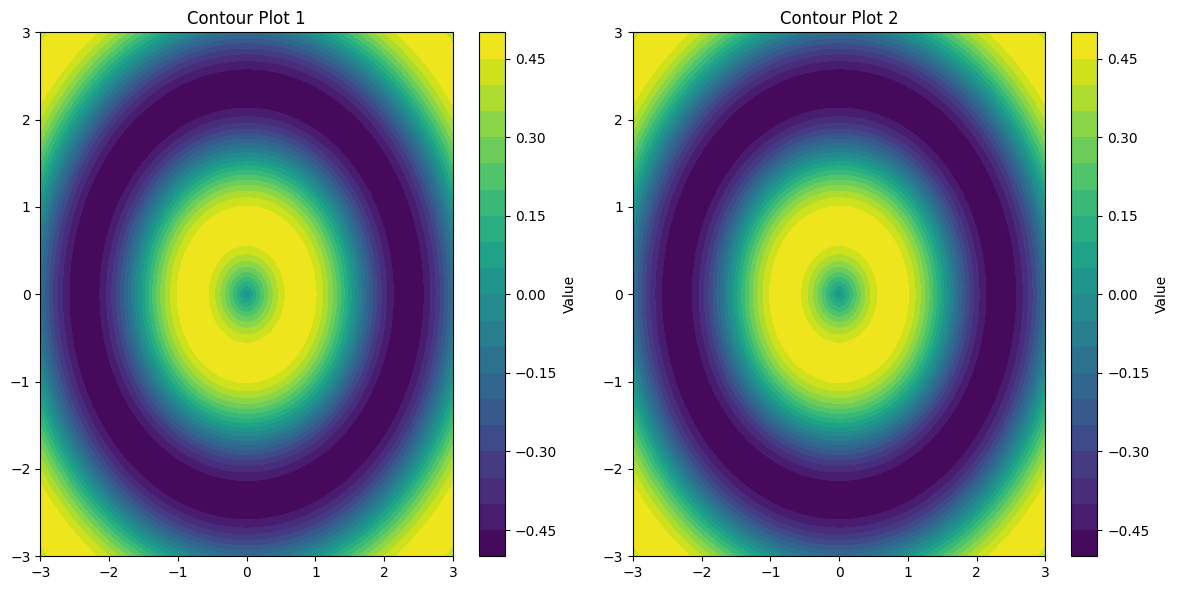

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
def generate_data():
    x = np.linspace(-3.0, 3.0, 100)
    y = np.linspace(-3.0, 3.0, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * np.cos(np.sqrt(X**2 + Y**2))
    return X, Y, Z

# Set up a grid of subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Generate data
X, Y, Z = generate_data()

# Create a contour plot in the first subplot
CS1 = ax1.contourf(X, Y, Z, levels=20, cmap='viridis')
cbar1 = fig.colorbar(CS1, ax=ax1, orientation='vertical')
cbar1.set_label('Value')
ax1.set_title('Contour Plot 1')

# Create a contour plot in the second subplot
CS2 = ax2.contourf(X, Y, Z, levels=20, cmap='viridis')
cbar2 = fig.colorbar(CS2, ax=ax2, orientation='vertical')
cbar2.set_label('Value')
ax2.set_title('Contour Plot 2')

plt.tight_layout()
plt.show()

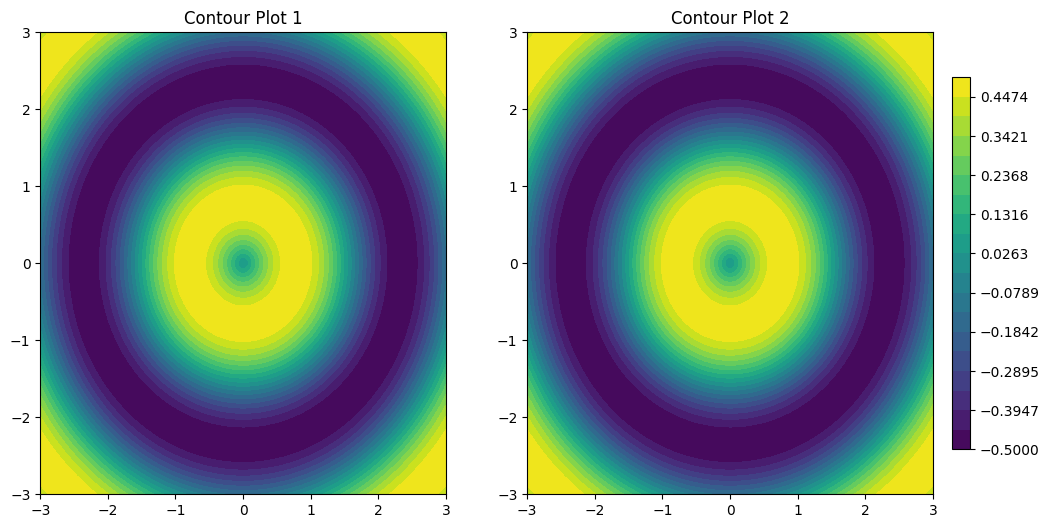

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
def generate_data():
    x = np.linspace(-3.0, 3.0, 100)
    y = np.linspace(-3.0, 3.0, 100)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(np.sqrt(X**2 + Y**2)) * np.cos(np.sqrt(X**2 + Y**2))
    return X, Y, Z

# Set up a grid of subplots (1 row, 2 columns)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Generate data
X, Y, Z = generate_data()

# Define levels for contour consistency
levels = np.linspace(Z.min(), Z.max(), 20)

# Create a contour plot in the first subplot
CS1 = ax1.contourf(X, Y, Z, levels=levels, cmap='viridis')
ax1.set_title('Contour Plot 1')

# Create a contour plot in the second subplot
CS2 = ax2.contourf(X, Y, Z, levels=levels, cmap='viridis')
ax2.set_title('Contour Plot 2')

# Create a colorbar for the whole figure
fig.colorbar(CS1, ax=[ax1, ax2], orientation='vertical', fraction=0.02, pad=0.02)

#plt.tight_layout()
plt.show()


# GPU MEMORY

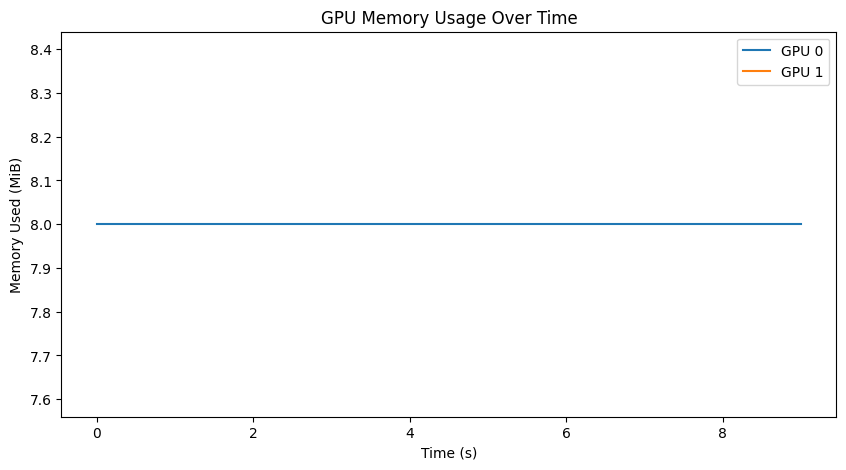

In [38]:
import subprocess
import time
import matplotlib.pyplot as plt

def get_gpu_memory():
    # This command returns GPU details including memory usage
    result = subprocess.run(['nvidia-smi', '--query-gpu=memory.used', '--format=csv,nounits,noheader'], capture_output=True, text=True)
    # Parse the output to extract used memory values
    memory_usage = [int(x) for x in result.stdout.strip().split('\n')]
    return memory_usage

def plot_memory_usage(memory_records):
    plt.figure(figsize=(10, 5))
    for i, records in enumerate(memory_records):
        plt.plot(records, label=f'GPU {i}')
    plt.title('GPU Memory Usage Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Memory Used (MiB)')
    plt.legend()
    plt.show()

# Number of seconds to monitor
monitor_time = 10
# Interval between measurements in seconds
interval = 1

# Records of memory usage for each GPU
gpu_memory_records = [[], []]

# Monitor the memory usage
start_time = time.time()
while time.time() - start_time < monitor_time:
    memory_usage = get_gpu_memory()
    for i, usage in enumerate(memory_usage):
        gpu_memory_records[i].append(usage)
    time.sleep(interval)

# Plot the recorded memory usage
plot_memory_usage(gpu_memory_records)


In [39]:
!nvidia-smi


Thu Jun  6 09:23:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA RTX A5000                Off| 00000000:06:00.0 Off |                  Off |
| 30%   30C    P8               21W / 230W|      8MiB / 24564MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# AS-II (version 1: 2024.03.01): extend_layers_neurons funciona correctamente, pero no es lo que queremos

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_size, hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, fig_size = (10,5), font_size = 8):
        
        self.fig_size = fig_size
        self.font_size = font_size
        
        weights_biases_dict = self.state_dict()
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.fig_size)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = self.font_size)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = self.font_size)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = self.font_size)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = self.font_size)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = self.font_size, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network', fontsize = self.font_size)
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.ax.tick_params(labelsize = self.font_size)
        
        cbar.set_label('Range of Weights and Biases', fontsize= self.font_size) 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)

        #self.initialize_parameters(initialization)
        
        self.original_model_path = original_model_path
        self.original_state_dict = self.load_original_state_dict()

        self.extend_layers_neurons()
        
    def extend_layers_neurons(self):
        #current_model.initialize_parameters(initialization)  # Initialize current model first
        for name, param in self.named_parameters():
            
            if name in self.original_state_dict:                
                original_param = self.original_state_dict[name]
                
                if param.shape == original_param.shape:                    
                    param.data.copy_(original_param)   
                    
                else:
                    
                    if "weight" in name: 
                        if param.shape != original_param.shape:  
                            # Copy matching portion of old weights                     
                            param.data[:original_param.size(0), :original_param.size(1)].copy_(original_param)
                        
                        elif param.size(0) != original_param.size(0): 
                            # Copy matching portion of old weights                           
                            param.data[:original_param.size(0), :].copy_(original_param)                           
                        
                        elif param.size(0) != original_param.size(0) and "fc0" in name:                            
                            param.data[0,:original_param.size(1)].copy_(original_param[0]) 
               
                    if "bias" in name: 
                        if param.size(0) != original_param.size(0):  
                            # Copy matching portion of old weights
                            param.data[:original_param.size(0)].copy_(original_param)
                        else:
                            param.data.copy_(original_param)     
    
    def load_original_state_dict(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        return torch.load(self.original_model_path)['model_state_dict']

class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold
        self.train()
        
    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


In [2]:
# Usage example
original_input_size = 2
original_hidden_layers = [4]
original_output_size = 1
original_model = FCN(original_input_size, original_hidden_layers, original_output_size, activation='Tanh', initialization='Xavier')

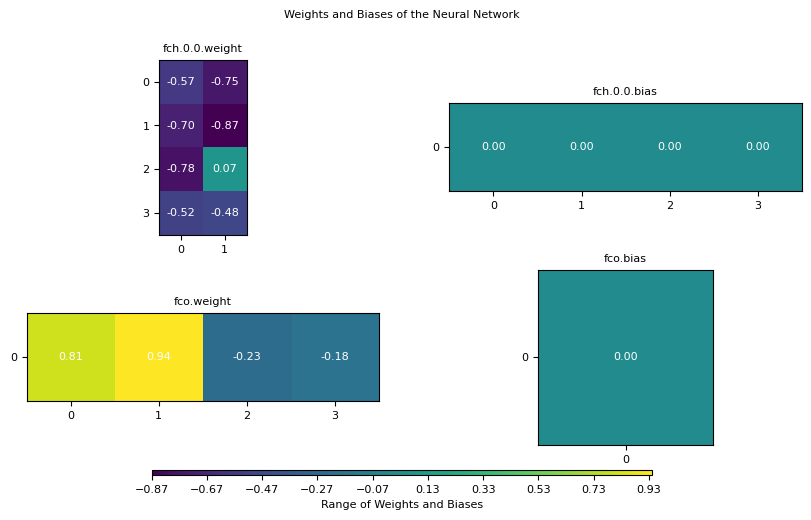

In [3]:
original_model.plot_weights(fig_size = (10,5), font_size = 8)

In [4]:
# Train original model
train_model = TrainModel(original_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)

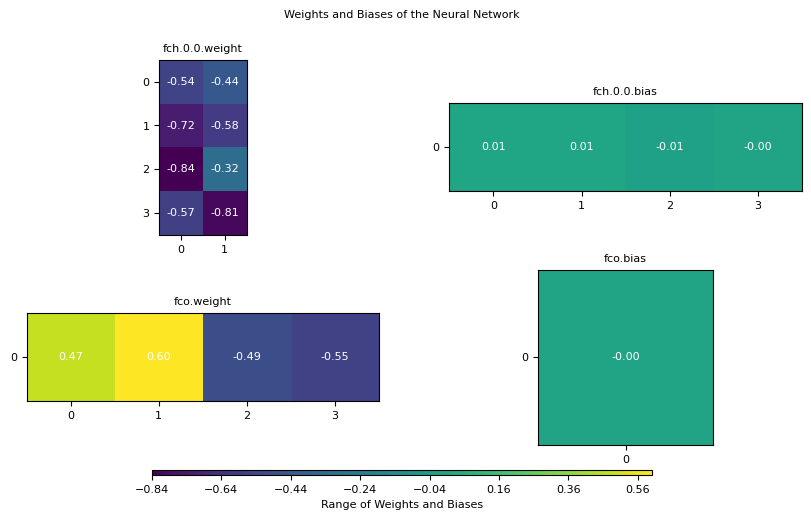

In [5]:
original_model.plot_weights(fig_size = (10,5), font_size = 8)

In [6]:
# Create extended model
extended_input_size = 2
extended_hidden_layers = [4,4]
extended_output_size = 1
extended_model = FCN_extended(extended_input_size, extended_hidden_layers, extended_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')

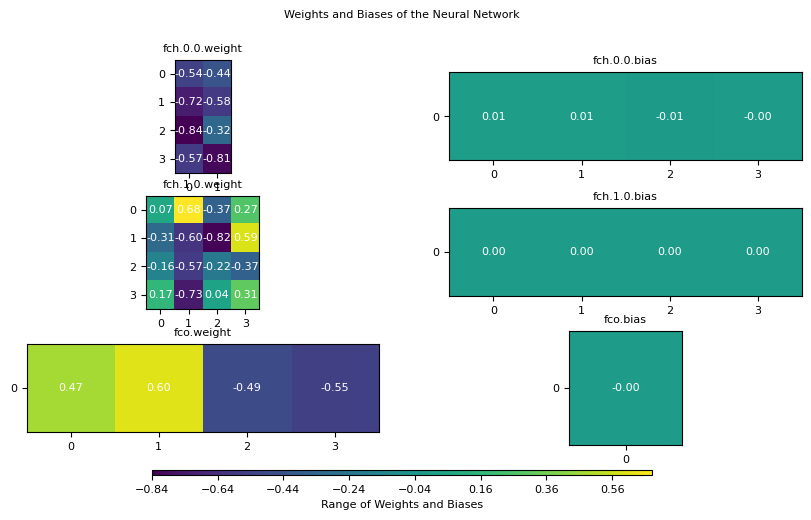

In [7]:
extended_model.plot_weights(fig_size = (10,5), font_size = 8)

In [8]:
# Train original model
train_extended_model = TrainModel(extended_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)

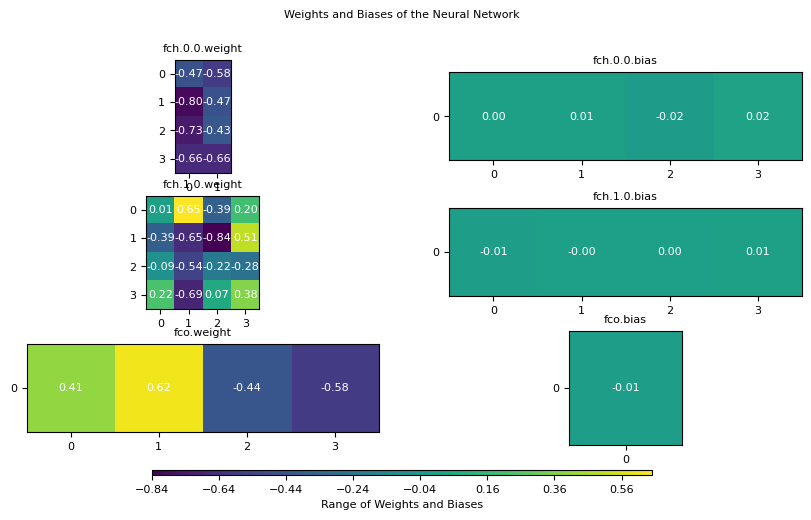

In [9]:
extended_model.plot_weights(fig_size= (10,5), font_size = 8)

In [10]:
# Create extended model
extended1_input_size = 2
extended1_hidden_layers = [8,8]
extended1_output_size = 1
extended1_model = FCN_extended(extended1_input_size, extended1_hidden_layers, extended1_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')

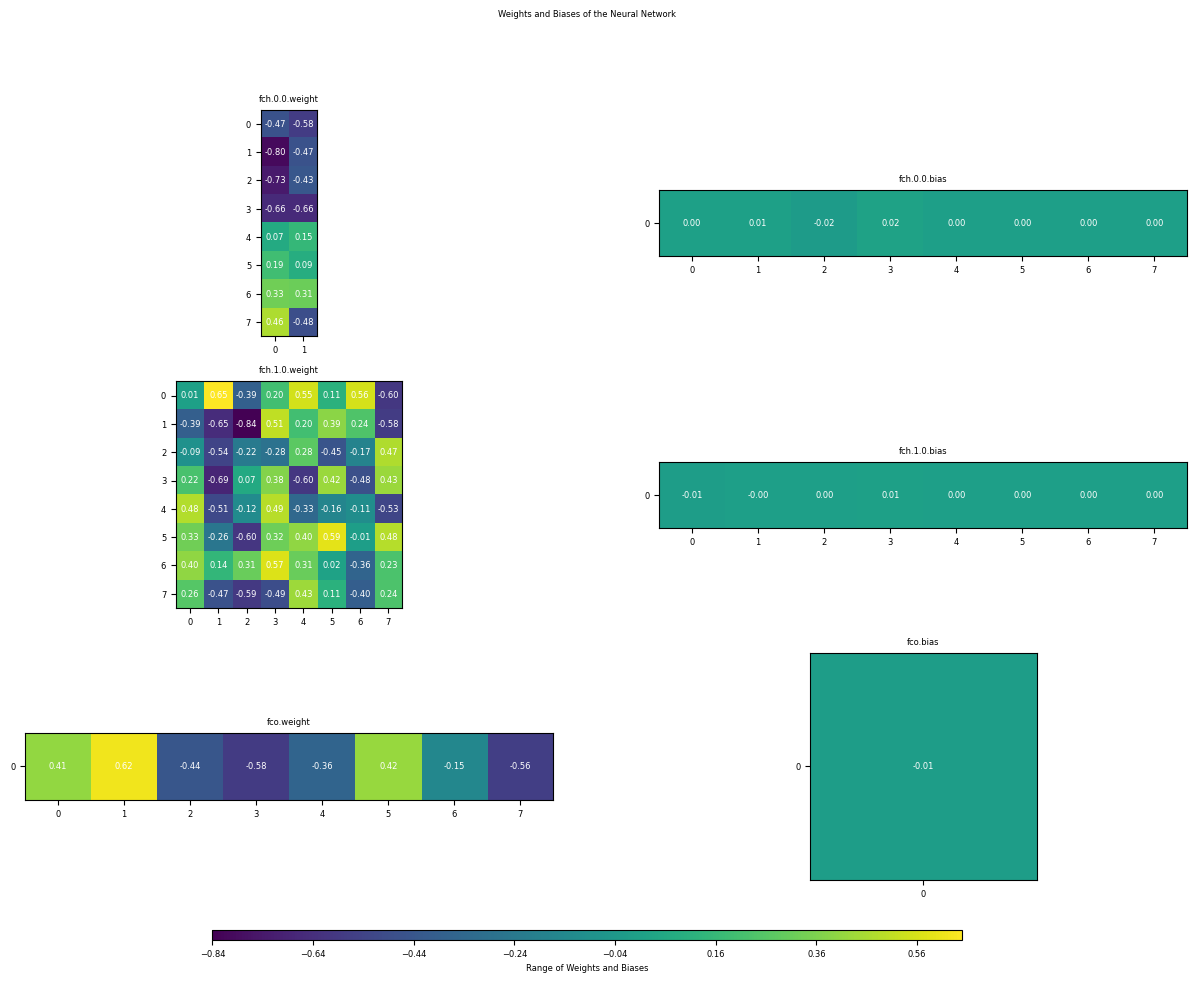

In [11]:
extended1_model.plot_weights(fig_size= (15,10), font_size = 6)

In [12]:
# Train original model
train_extended1_model = TrainModel(extended1_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)

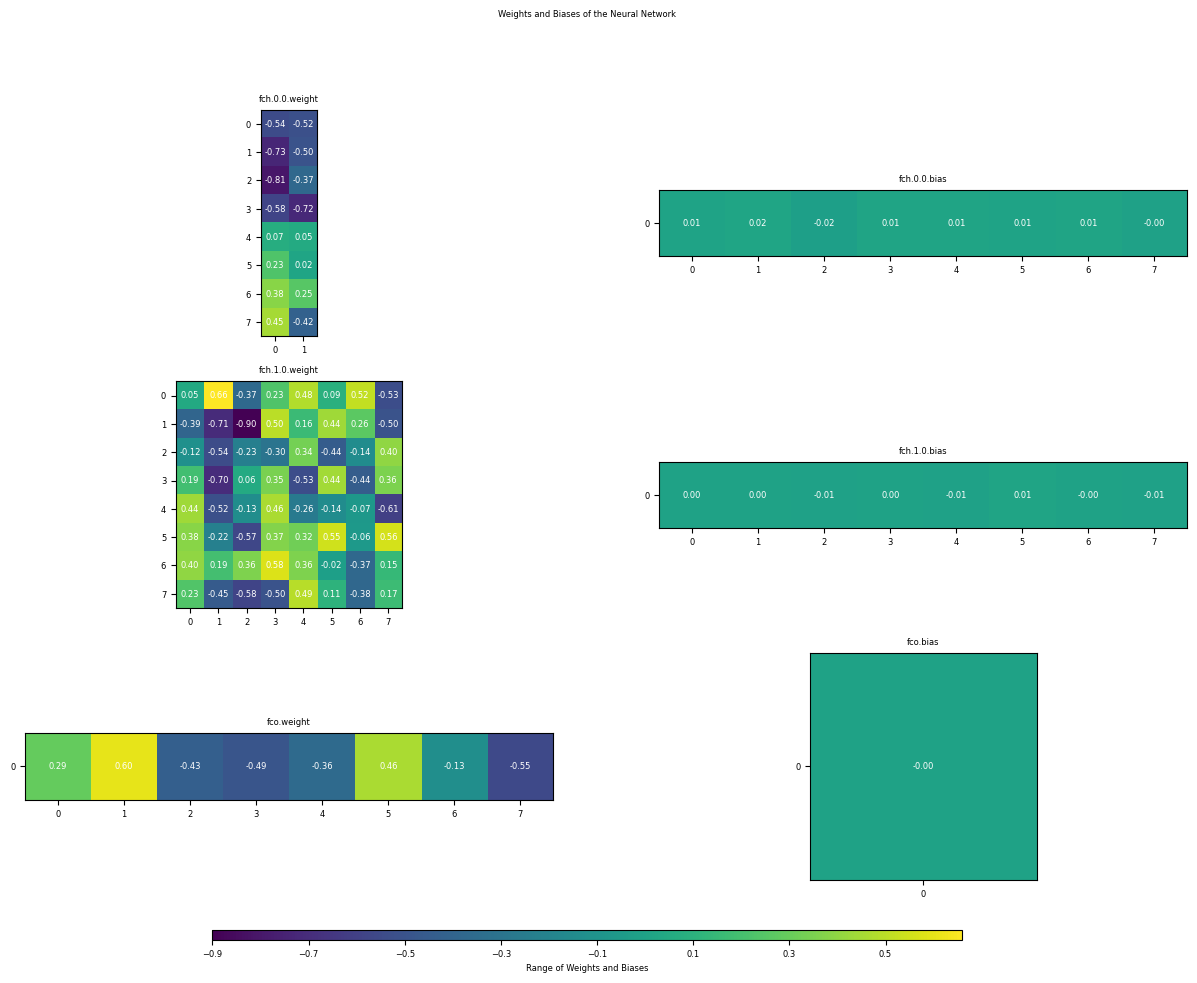

In [13]:
extended1_model.plot_weights(fig_size= (15,10), font_size = 6)

In [14]:
# Create extended model
extended2_input_size = 2
extended2_hidden_layers = [16,16,16,16]
extended2_output_size = 1
extended2_model = FCN_extended(extended2_input_size, extended2_hidden_layers, extended2_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')

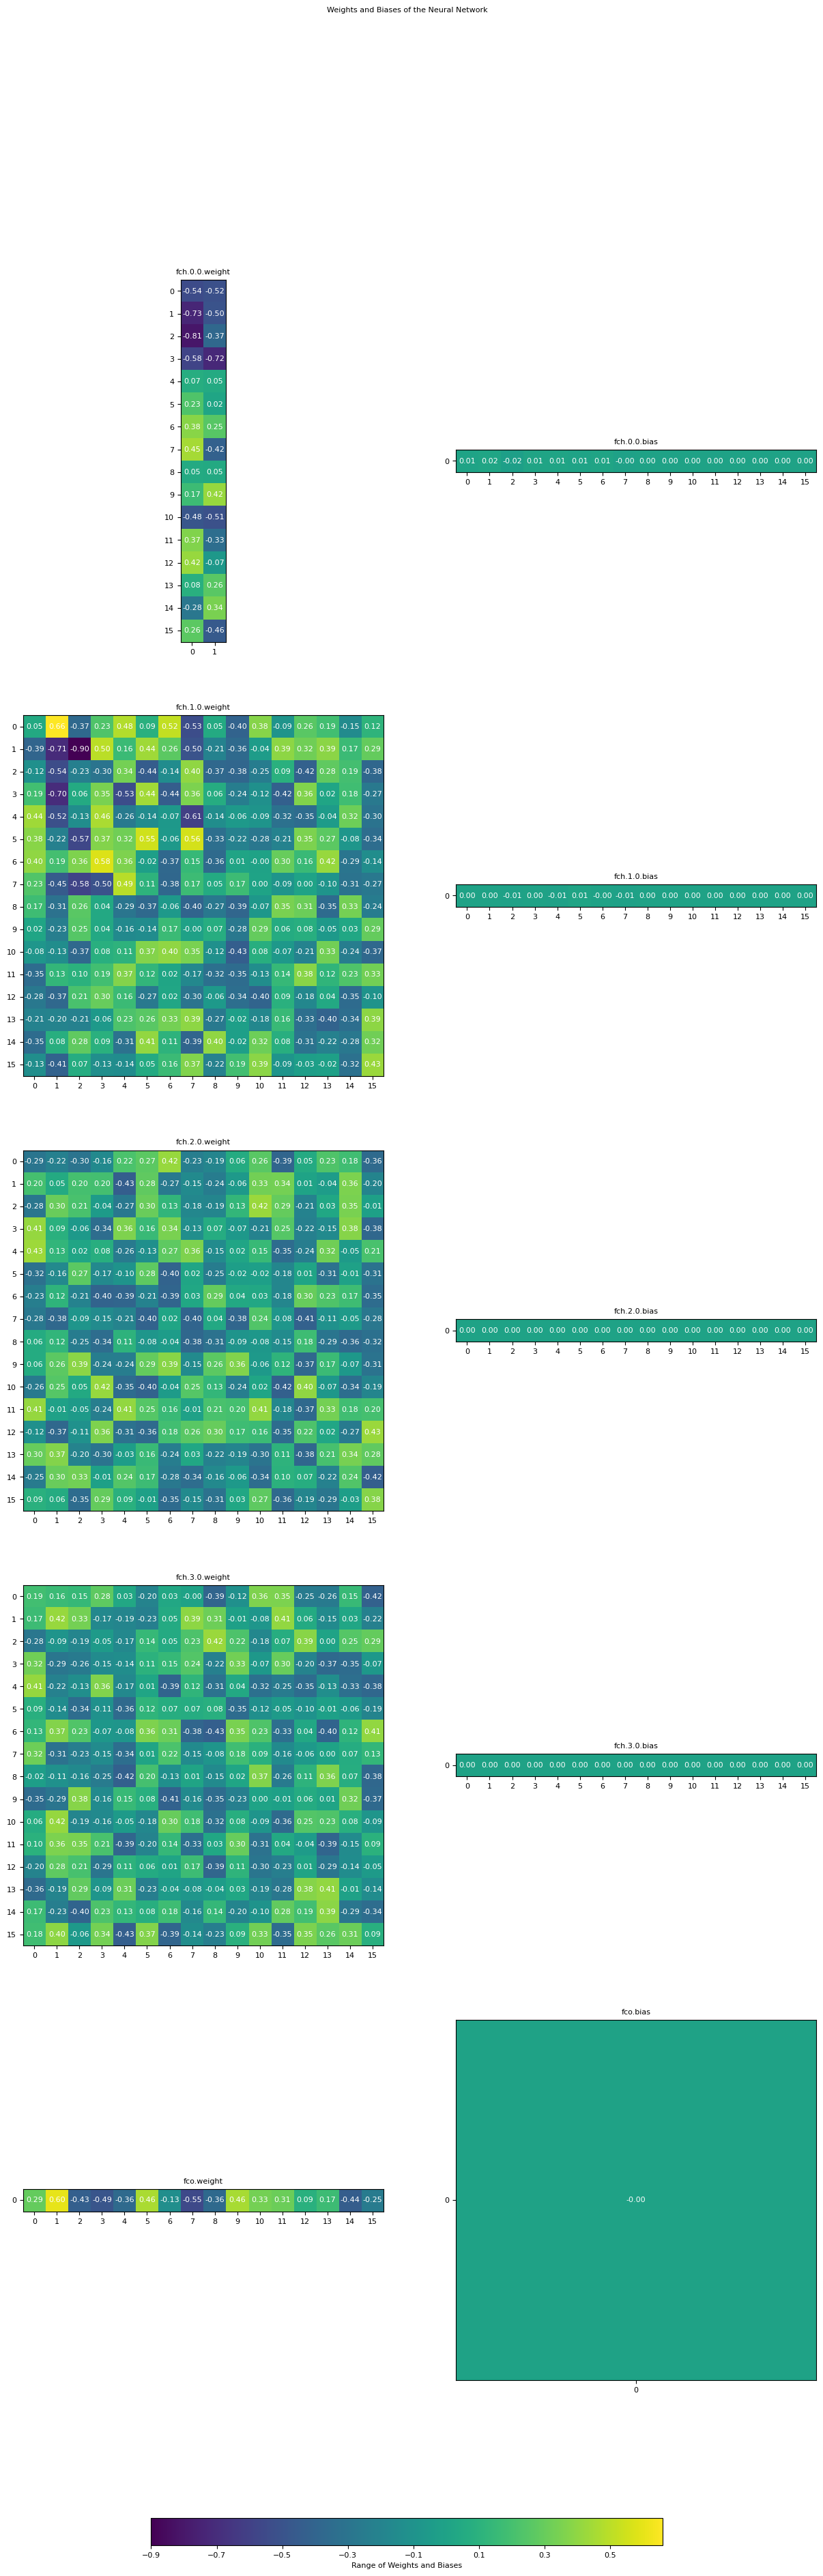

In [17]:
extended2_model.plot_weights(fig_size= (15,40), font_size = 8)

# AS-II (version 1: 2024.03.08): 

In [7]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_size, hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])   
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, fig_size = (10,5), font_size = 8):
        
        self.fig_size = fig_size
        self.font_size = font_size
        
        weights_biases_dict = self.state_dict()
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.fig_size)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = self.font_size)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = self.font_size)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = self.font_size)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = self.font_size)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = self.font_size, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network', fontsize = self.font_size)
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.ax.tick_params(labelsize = self.font_size)
        
        cbar.set_label('Range of Weights and Biases', fontsize= self.font_size) 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)

        #self.initialize_parameters(initialization)
        
        self.original_model_path = original_model_path
        self.original_state_dict = self.load_original_state_dict()

        self.extend_layers_neurons()
        
    def extend_layers_neurons(self):
        #current_model.initialize_parameters(initialization)  # Initialize current model first
        for name, param in self.named_parameters():
            
            if name in self.original_state_dict:                
                original_param = self.original_state_dict[name]
                
                if param.shape == original_param.shape:                    
                    param.data.copy_(original_param)   
                    
                else:
                    
                    if "weight" in name: 
                        if param.shape != original_param.shape:  
                            # Copy matching portion of old weights                     
                            param.data[:original_param.size(0), :original_param.size(1)].copy_(original_param)
                        
                        elif param.size(0) != original_param.size(0): 
                            # Copy matching portion of old weights                           
                            param.data[:original_param.size(0), :].copy_(original_param)                           
                        
                        elif param.size(0) != original_param.size(0) and "fc0" in name:                            
                            param.data[0,:original_param.size(1)].copy_(original_param[0]) 
               
                    if "bias" in name: 
                        if param.size(0) != original_param.size(0):  
                            # Copy matching portion of old weights
                            param.data[:original_param.size(0)].copy_(original_param)
                        else:
                            param.data.copy_(original_param)     
    
    def load_original_state_dict(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        return torch.load(self.original_model_path)['model_state_dict']

class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold
        self.train()
        
    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


In [8]:
# Usage example
original_input_size = 2
original_hidden_layers = [4]
original_output_size = 1
original_model = FCN(original_input_size, original_hidden_layers, original_output_size, activation='Tanh', initialization='Xavier')

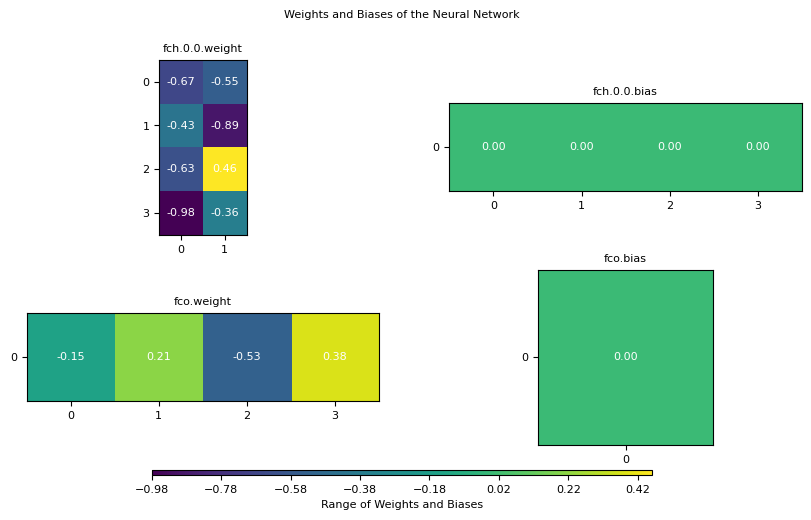

In [9]:
original_model.plot_weights(fig_size = (10,5), font_size = 8)

In [10]:
# Train original model
TrainModel(original_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)

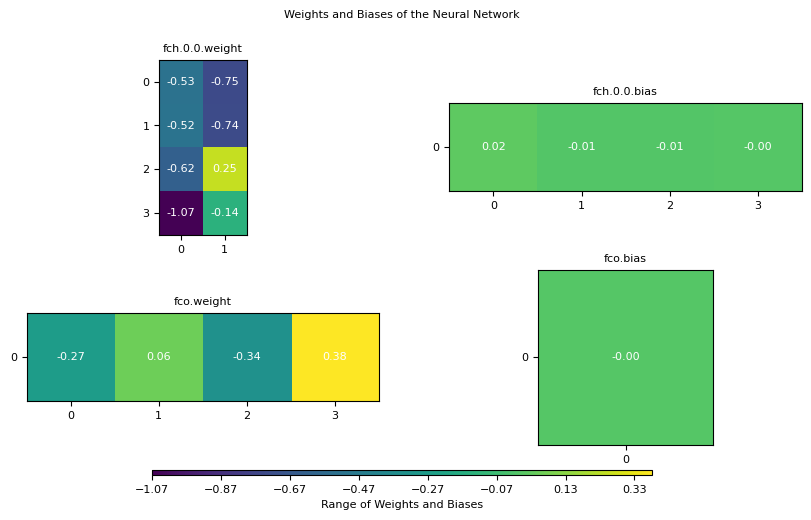

In [11]:
original_model.plot_weights(fig_size = (10,5), font_size = 8)

In [ ]:
# Create extended model
extended_input_size = 2
extended_hidden_layers = [4,4]
extended_output_size = 1
extended_model = FCN_extended(extended_input_size, extended_hidden_layers, extended_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')

In [ ]:
extended_model.plot_weights(fig_size = (10,5), font_size = 8)

In [ ]:
# Train original model
train_extended_model = TrainModel(extended_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)

In [ ]:
extended_model.plot_weights(fig_size= (10,5), font_size = 8)

In [ ]:
# Create extended model
extended1_input_size = 2
extended1_hidden_layers = [8,8]
extended1_output_size = 1
extended1_model = FCN_extended(extended1_input_size, extended1_hidden_layers, extended1_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')

In [ ]:
extended1_model.plot_weights(fig_size= (15,10), font_size = 6)

In [ ]:
# Train original model
train_extended1_model = TrainModel(extended1_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)

In [ ]:
extended1_model.plot_weights(fig_size= (15,10), font_size = 6)

In [ ]:
# Create extended model
extended2_input_size = 2
extended2_hidden_layers = [16,16,16,16]
extended2_output_size = 1
extended2_model = FCN_extended(extended2_input_size, extended2_hidden_layers, extended2_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')

In [ ]:
extended2_model.plot_weights(fig_size= (15,40), font_size = 8)

# JOINING ALL.ipynb

In [7]:
### Import all what you need:
import torch
import torch.nn as nn
import torch.nn.init as init
from torchsummary import summary # https://pypi.org/project/torch-summary/
import torchinfo 

import numpy as np

import matplotlib.pyplot as plt

import time

# Use the notebook backend (for Jupyter Notebooks)
#%matplotlib notebook

#plt.ion()  # Turn on the interactive mode

In [8]:
# Pseudorandom number generator:
torch.manual_seed(123)

In [9]:
#Definition of the physical constants and hyperparameters:
mass = 1
d, w0 = 2, 20
mu, k = 2*d, w0**2            # Este mu NO se utiliza!!!!!
learning_rate =  1e-3         # learning rate
lambda1, lambda2 = 1e-3, 1e-4 # loss term hyperparameters
epochs = 20001

### Initial, training and test points generation:

#### Initial condition 1: generation of initial points:
$$ u(t=0, \mu) = 1
$$


In [10]:
#### Generation of t and mu initial points (Initial condition 1) 
point_resolution = 40

ic1_t_mu = torch.stack([torch.zeros(point_resolution).requires_grad_(True), torch.linspace(1,10, point_resolution).requires_grad_(True)],-1)
ic1_scope = torch.ones_like(ic1_t_mu[:,0:1]).requires_grad_(True)

#print(f"Initial condition 1: \n \t [t, mu]: \n{ic1_t_mu}")
#print(f"\n Initial condition 1: \n \t u(t=0, mu) = 1: \n {ic1_scope}")
#print(f"\n Shapes of [t, mu] and u(t=0, mu) = 1: \n\t{ic1_t_mu.shape}, {ic1_scope.shape}")

#### Initial condition 2: t and mu training points generation:
$$
\dfrac{d u}{d t}(t=0, \mu) = 0~
$$

In [11]:
ic2_t_mu = torch.stack([torch.zeros(point_resolution).requires_grad_(True), torch.linspace(1,10, point_resolution).requires_grad_(True)], -1)
ic2_scope = torch.zeros_like(ic2_t_mu[:,0:1]).requires_grad_(True)

#print(f"Initial condition 2: \n \t [t, mu]: \n{ic2_t_mu}")
#print(f"\n Initial condition 2: \n \t du/dt(t=0, mu) = 0: \n\t {ic2_scope}")
#print(f"\n Shapes of [t, mu] and du/dt(t=0, mu) = 0: \n\t {ic2_t_mu.shape}, {ic2_scope.shape}")

#### Generation of physical domain training points: 

In [12]:
### Generate domain physic loss sample points:
physic_in_t_mu = [torch.linspace(1e-2,1, point_resolution).requires_grad_(True), torch.linspace(1,10, point_resolution).requires_grad_(True)] # Mejora: se puede utilizar torch.rand
physic_domain_t_mu = torch.stack(torch.meshgrid(*physic_in_t_mu, indexing='ij'), -1).view(-1, 2).requires_grad_(True)

#print(f" Point seed list for mesh grid domain points: \n \t {physic_in_t_mu}")
#print(f"Domain training points: \n \t: {physic_domain_t_mu}")
#print(f"Size of Domain training points: \n \t {physic_domain_t_mu.size()}")

#### Generation of testing points:

In [13]:
#### Generation of t and mu test points within the domain:
point_resolution_test = 100

# Testing points:
test_in_t_mu = [torch.linspace(0,1,point_resolution_test), torch.linspace(1,10,point_resolution_test) ]
test_domain_t_mu = torch.stack(torch.meshgrid(*test_in_t_mu, indexing='ij'), -1).view(-1, 2)

# print(f"Point seed list for mesh grid test points: \n \t \n \t: {test_in_t_mu}")
# print(f"Test points \n \t [t, mu]: \n \t {test_domain_t_mu}")
# print(f"Size of the test domain points: \n \t {test_domain_t_mu.size()}")

### Exact solution:

In [14]:
def exact_solution(d, w0, t):
    "Defines the analytical solution to the under-damped harmonic oscillator problem above."
    assert d < w0             
    w = np.sqrt(w0**2-d**2)
    phi = np.arctan(-d/w)
    A = 1/(2*np.cos(phi))
    cos = torch.cos(phi+w*t)
    exp = torch.exp(-d*t)
    u = exp*2*A*cos
    return u

In [15]:
# Example to check if it works (calculation of the exact solution):
test_mu = 5
u_exact = exact_solution(test_mu/(2*mass), w0, test_in_t_mu[0])
#u_exact.view(-1,1)
#u_exact.size()
#u_exact.numel()
#u_exact.dim()
#u_exact

In [16]:
#physic_in_t_mu[0]

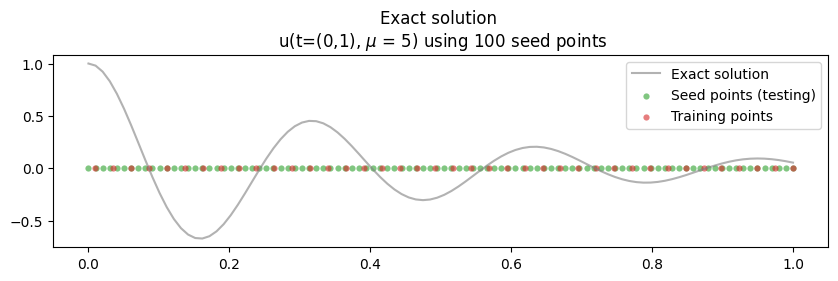

In [17]:
# Plotting the exact solution:
plt.figure(figsize=(10,2.5))
plt.plot(
        test_in_t_mu[0], 
        u_exact, 
        label="Exact solution", 
        color="tab:grey", 
        alpha=0.6)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points (testing)")
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:red",
        alpha=0.6,
        label= "Training points")

plt.title(f"Exact solution \n u(t=(0,1), $\mu$ = {test_mu}) using {point_resolution_test} seed points")
plt.legend()
plt.show()

## Step 2: Create Fully Connected Neural Network Class (FCNN):

In [18]:
class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, N_OUTPUT = 1, hidden_layers = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        #self.fcs = nn.Sequential(
        #    nn.Linear(N_INPUT, hidden_layers[0]),
        #    self.activation
        #)
        self.fcs = nn.Linear(N_INPUT, hidden_layers[0])

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_layers[i + 1]),
                self.activation
            ) for i in range(len(hidden_layers) - 1)
        ])

        self.fce = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)


    def forward(self, x):
        x = self.activation(self.fcs(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fce(x)
        return x
    
    def initialize_parameters(self, initialization):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self):
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 10))
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

## STEP 3: Instantiate the Model Class

In [19]:
original_input_size = 2
original_hidden_layers = [4]
original_output_size = 1
original_model = FCN(original_input_size, original_output_size, original_hidden_layers, activation='Tanh', initialization='Xavier')
#original_model.plot_weights()

### Checking the model using test points and a constant mu value:

In [20]:
test_mu = 5
test_in_t_constant_mu = torch.stack([torch.linspace(0,1,point_resolution_test), test_mu*torch.ones(point_resolution_test)], -1).view(-1,2)
#print(f" Point seed list for mesh grid domain points: \n \t {test_in_t_constant_mu}")
#print(f"Size of Domain training points: \n \t {test_in_t_constant_mu.size()}")

In [21]:
# NO es necesario porque se mantiene constante mu
#test_domain_t_constant_mu = torch.stack(torch.meshgrid(*test_in_t_constant_mu, indexing='ij'), -1).view(-1, 2)
#test_domain_t_constant_mu.size()
#print(f"Domain training points: \n \t: {test_domain_t_constant_mu}")

In [22]:
test_predicted = original_model(test_in_t_constant_mu)
#test_predicted.size()
#test_predicted

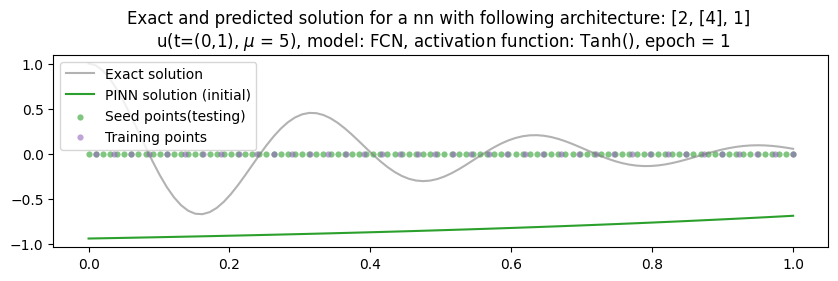

In [23]:
plt.figure(figsize=(10,2.5))
plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
)
plt.plot(test_in_t_mu[0], 
                 test_predicted[:,0].detach().numpy(), 
                 label="PINN solution (initial)", 
                 color="tab:green"
)
plt.scatter(
        test_in_t_mu[0], 
        torch.zeros_like(test_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:green",
        alpha=0.6,
        label= "Seed points(testing)"
)
plt.scatter(
        physic_in_t_mu[0].detach().numpy(), 
        torch.zeros_like(physic_in_t_mu[0]), 
        s=20, 
        lw=0, 
        color="tab:purple",
        alpha=0.6,
        label= "Training points"
)
### model and activation has to be manually adapted
plt.title(f"Exact and predicted solution for a nn with following architecture: [{original_input_size}, {original_hidden_layers}, {original_output_size}] \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation}, epoch = 1")
plt.legend()
plt.show()

## STEP 4: Selection of the Optimizer

In [24]:
### model.parameters has to be manually adapted
optimiser = torch.optim.Adam(original_model.parameters(), lr= learning_rate)
optimiser

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

## STEP 5: Training the PINN

Shape of ic1 residuals: torch.Size([40, 1])

Shape of ic2 residuals: torch.Size([40, 1])
tensor([[0.9456],
        [0.8898],
        [0.8272],
        [0.7605],
        [0.6925],
        [0.6256],
        [0.5615],
        [0.5014],
        [0.4460],
        [0.3955],
        [0.3501],
        [0.3095],
        [0.2734],
        [0.2414],
        [0.2131],
        [0.1882],
        [0.1662],
        [0.1469],
        [0.1298],
        [0.1148],
        [0.1016],
        [0.0900],
        [0.0797],
        [0.0707],
        [0.0627],
        [0.0556],
        [0.0493],
        [0.0438],
        [0.0389],
        [0.0346],
        [0.0308],
        [0.0274],
        [0.0243],
        [0.0217],
        [0.0193],
        [0.0172],
        [0.0153],
        [0.0136],
        [0.0122],
        [0.0108]], grad_fn=<SubBackward0>)
Shape of differential equation residuals: torch.Size([1600, 1])
tensor([[-209.8236],
        [-245.4817],
        [-275.2289],
        ...,
        [-360.5808],
     

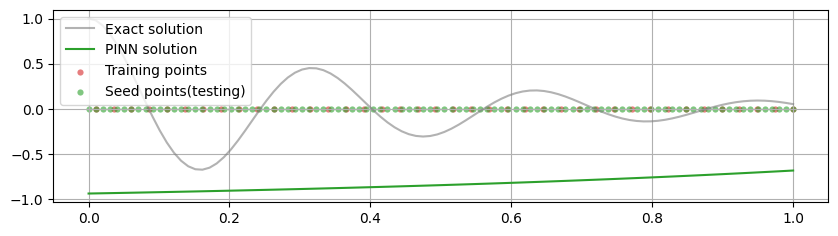

Saved the checkpoint corresponding to epoch: 0
Shape of ic1 residuals: torch.Size([40, 1])

Shape of ic2 residuals: torch.Size([40, 1])
tensor([[-0.3050],
        [-0.3289],
        [-0.3507],
        [-0.3695],
        [-0.3851],
        [-0.3974],
        [-0.4065],
        [-0.4127],
        [-0.4165],
        [-0.4183],
        [-0.4184],
        [-0.4171],
        [-0.4149],
        [-0.4119],
        [-0.4082],
        [-0.4042],
        [-0.3998],
        [-0.3952],
        [-0.3903],
        [-0.3854],
        [-0.3802],
        [-0.3750],
        [-0.3696],
        [-0.3641],
        [-0.3585],
        [-0.3527],
        [-0.3469],
        [-0.3409],
        [-0.3348],
        [-0.3286],
        [-0.3222],
        [-0.3158],
        [-0.3092],
        [-0.3026],
        [-0.2958],
        [-0.2890],
        [-0.2820],
        [-0.2751],
        [-0.2680],
        [-0.2610]], grad_fn=<SubBackward0>)
Shape of differential equation residuals: torch.Size([1600, 1])
tensor([[69.623

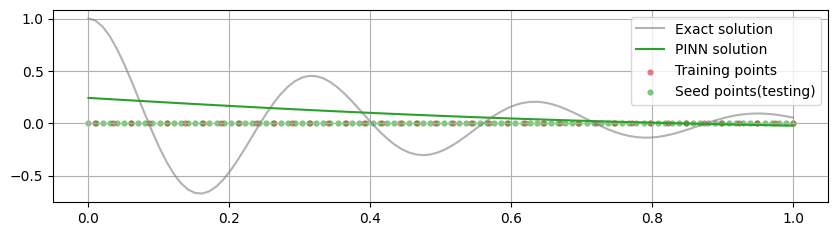

Saved the checkpoint corresponding to epoch: 1000
Training elapsed time (s): 2.102792739868164


In [25]:
epochs = 1001
start = time.time()
# Creation of the variables loss1_history, loss2_history and loss3_history for printing the evolution of the contribution of every loss term:
loss_ic1_history = []
loss_ic2_history = []
loss_differential_equation_history = []



for i in range(epochs):
    optimiser.zero_grad()

    # compute initial condition 1 loss:
    ic1_predicted= original_model(ic1_t_mu)
    
    residuals_ic1 = ic1_predicted - ic1_scope
    
    loss_ic1 = torch.mean((ic1_predicted - ic1_scope)**2)
    loss_ic1_history.append(loss_ic1.item())


    # compute initial condition 2 loss:
    du_dtdmu_initial = torch.autograd.grad(outputs = ic1_predicted, inputs = ic1_t_mu, grad_outputs= torch.ones_like(ic1_predicted), create_graph= True)[0]
    ic2_du_dt, ic2_du_dmu = du_dtdmu_initial[:, 0:1], du_dtdmu_initial[:,1:2]
    
    residuals_ic2 = ic2_du_dt- ic2_scope
    
    loss_ic2 = torch.mean((ic2_du_dt- ic2_scope)**2)
    loss_ic2_history.append(loss_ic2.item())

    # compute physic loss:
    physic_domain_predicted = original_model(physic_domain_t_mu)
    physic_domain_du_dtdmu = torch.autograd.grad(outputs = physic_domain_predicted, inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_predicted), create_graph= True)[0]
    physic_domain_d2u_d2t_d2mu = torch.autograd.grad(outputs = physic_domain_du_dtdmu[:,0:1], inputs = physic_domain_t_mu, grad_outputs= torch.ones_like(physic_domain_du_dtdmu[:,0:1]), create_graph= True)[0]
    
    residuals_differential_equation = physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted 
    
    loss_differential_equation = torch.mean( (physic_domain_d2u_d2t_d2mu[:,0:1] + physic_domain_t_mu[:,1:2] * physic_domain_du_dtdmu[:,0:1] + k * physic_domain_predicted )**2)
    loss_differential_equation_history.append(loss_differential_equation.item())
    
    loss = loss_ic1 + lambda1 * loss_ic2 + lambda2 * loss_differential_equation
    
    loss.backward()
    optimiser.step()
    
    
    if i%1000 == 0:
        print(f"Shape of ic1 residuals: {residuals_ic1.shape}")
        #print(residuals_ic1)
        print()
        print(f"Shape of ic2 residuals: {residuals_ic2.shape}")
        print(residuals_ic2)
        print(f"Shape of differential equation residuals: {residuals_differential_equation.shape}")
        print(residuals_differential_equation)

        
        print(f'Decomposition of the loss terms: \n loss({loss}) = loss1({loss_ic1}) + {lambda1} * loss2({loss_ic2}) + {lambda2} * loss3({loss_differential_equation})')
        
        test_predicted = original_model(test_in_t_constant_mu)
        
        plt.figure(figsize=(10,2.5))
        plt.plot(test_in_t_mu[0].detach().numpy(), 
                 u_exact, 
                 label="Exact solution", 
                 color="tab:grey", 
                 alpha=0.6
        )
        plt.plot(
                test_in_t_mu[0], 
                test_predicted[:,0].detach().numpy(), 
                label="PINN solution", 
                color="tab:green"
        )
        plt.scatter(
                    physic_in_t_mu[0].detach().numpy(), 
                    torch.zeros_like(physic_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        #plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), model: {original_model.__class__.__name__}, activation function: {original_model.activation()}, epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.grid()
        plt.legend()
        plt.show()
        torch.save({
                    "epoch": i,
                    "model_state_dict": original_model.state_dict(),
                    "optimiser_state_dict": optimiser.state_dict(),
                    "loss": loss,
                   },                    
                    f"lr{learning_rate}_epoch{i}.pth")
        print(f"Saved the checkpoint corresponding to epoch: {i}")
end = time.time()
execution_time = (end - start)
print(f"Training elapsed time (s): {execution_time}")
        

In [26]:
x = physic_domain_t_mu[:,0].detach()
y = physic_domain_t_mu[:,1].detach()
z = residuals_differential_equation.flatten().detach()

In [27]:
x.shape

torch.Size([1600])

In [28]:
z.flatten().shape

torch.Size([1600])

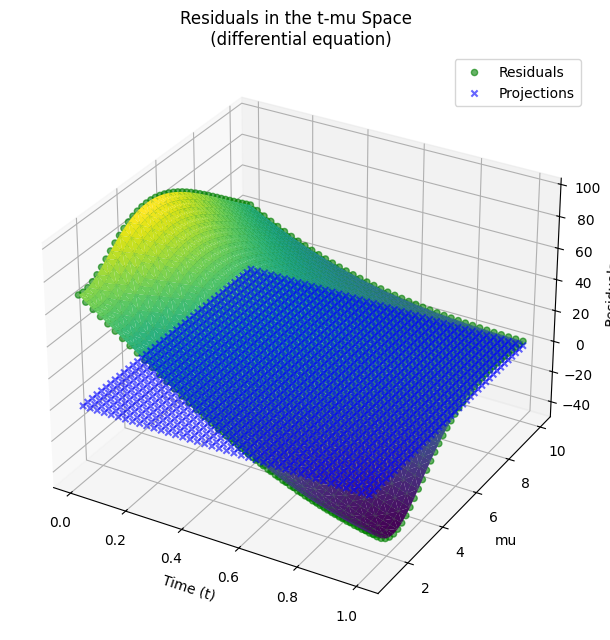

In [29]:
fig = plt.figure(figsize = (10,7.5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha=0.6, c='g', marker='o', label='Residuals')
ax.scatter(x, y, torch.zeros_like(z), alpha=0.6, c='b', marker='x', label='Projections')
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
#ax.plot_surface(physic_domain_t_mu[:,0].detach(), physic_domain_t_mu[:,1].detach(), residuals, alpha=0.2, color='g')
ax.set_xlabel('Time (t)')
ax.set_ylabel('mu')
ax.set_zlabel('Residuals')
plt.title('Residuals in the t-mu Space \n (differential equation)')
ax.legend()
plt.show()

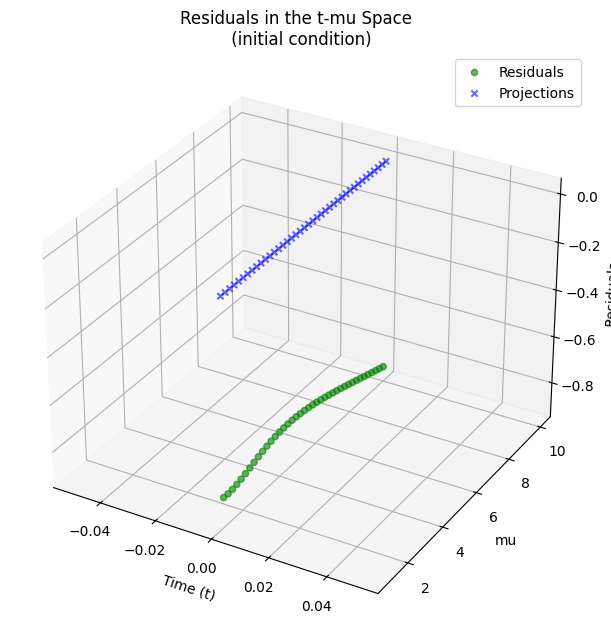

In [30]:
x_ic1_t_mu = ic1_t_mu[:,0].detach()
y_ic1_t_mu = ic1_t_mu[:,1].detach()
z_ic1_t_mu = residuals_ic1.flatten().detach()
fig = plt.figure(figsize = (10,7.5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ic1_t_mu, y_ic1_t_mu, z_ic1_t_mu, alpha=0.6, c='g', marker='o', label='Residuals')
ax.scatter(x_ic1_t_mu, y_ic1_t_mu, torch.zeros_like(z_ic1_t_mu), alpha=0.6, c='b', marker='x', label='Projections')
#ax.plot_trisurf(x_ic1_t_mu, y_ic1_t_mu, z_ic1_t_mu, cmap='viridis', edgecolor='none')
#ax.plot_surface(physic_domain_t_mu[:,0].detach(), physic_domain_t_mu[:,1].detach(), residuals, alpha=0.2, color='g')
ax.set_xlabel('Time (t)')
ax.set_ylabel('mu')
ax.set_zlabel('Residuals')
plt.title('Residuals in the t-mu Space \n (initial condition)')
ax.legend()
plt.show()    

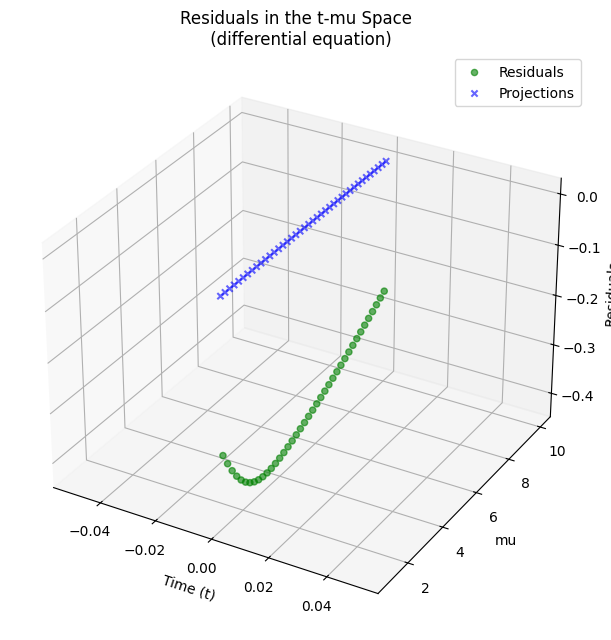

In [31]:
x_ic2_t_mu = ic1_t_mu[:,0].detach()
y_ic2_t_mu = ic1_t_mu[:,1].detach()
z_ic2_t_mu = residuals_ic2.flatten().detach()
fig = plt.figure(figsize = (10,7.5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_ic2_t_mu, y_ic2_t_mu, z_ic2_t_mu, alpha=0.6, c='g', marker='o', label='Residuals')
ax.scatter(x_ic2_t_mu, y_ic2_t_mu, torch.zeros_like(z_ic2_t_mu), alpha=0.6, c='b', marker='x', label='Projections')
#ax.plot_trisurf(x_ic1_t_mu, y_ic1_t_mu, z_ic1_t_mu, cmap='viridis', edgecolor='none')
#ax.plot_surface(physic_domain_t_mu[:,0].detach(), physic_domain_t_mu[:,1].detach(), residuals, alpha=0.2, color='g')
ax.set_xlabel('Time (t)')
ax.set_ylabel('mu')
ax.set_zlabel('Residuals')
plt.title('Residuals in the t-mu Space \n (differential equation)')
ax.legend()
plt.show()

In [32]:
max_values, max_indices = torch.max(z_ic2_t_mu, dim = 0)

In [33]:
print(max_values)

tensor(-0.2610)


In [34]:
print(max_indices)

tensor(39)


## Test Loss to avoid overfitting

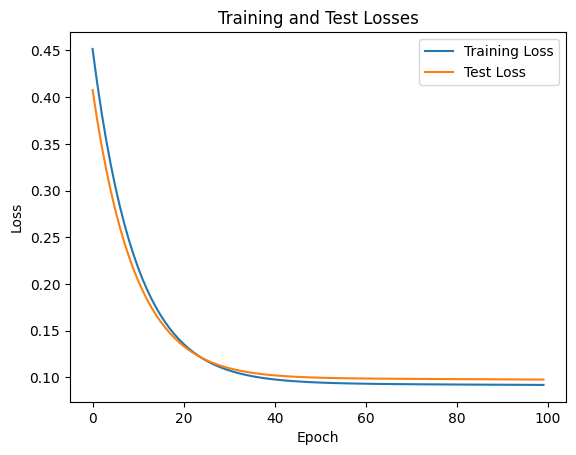

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the fully connected neural network
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Generate some random data for demonstration
X = torch.rand(1000, 5)  # 1000 samples, 5 features
y = torch.rand(1000, 1)  # Regression task, single output

# Define the train-test split ratio
train_ratio = 0.8
train_size = int(train_ratio * len(X))
test_size = len(X) - train_size

# Split data into training and testing sets
X_train, X_test = torch.split(X, [train_size, test_size])
y_train, y_test = torch.split(y, [train_size, test_size])

# Define hyperparameters
input_size = X.shape[1]
hidden_size = 10
output_size = 1
learning_rate = 0.01
num_epochs = 100

# Initialize the model
model = FullyConnectedNN(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Lists to store losses for plotting
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Store training loss
    train_losses.append(loss.item())

    # Evaluate on test set to check for overfitting
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Plotting the losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()


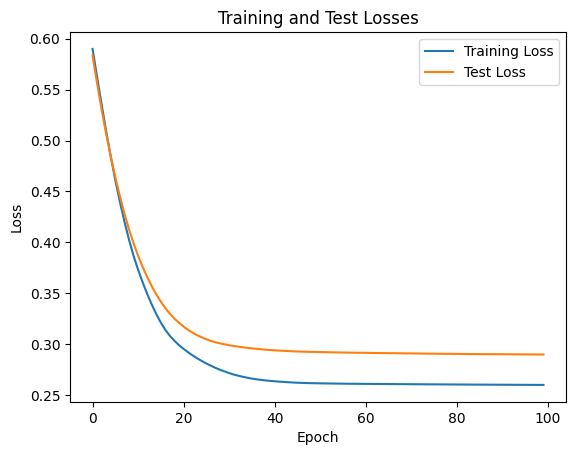

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the custom loss function
class CustomLoss(nn.Module):
    def __init__(self):
        super(CustomLoss, self).__init__()

    def forward(self, predicted, target):
        # Custom loss function example (absolute error)
        loss = torch.mean(torch.abs(predicted - target))
        return loss

# Define the fully connected neural network
class FullyConnectedNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FullyConnectedNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Generate some random data for demonstration
X = torch.rand(1000, 5)  # 1000 samples, 5 features
y = torch.rand(1000, 1)  # Regression task, single output

# Define the train-test split ratio
train_ratio = 0.8
train_size = int(train_ratio * len(X))
test_size = len(X) - train_size

# Split data into training and testing sets
X_train, X_test = torch.split(X, [train_size, test_size])
y_train, y_test = torch.split(y, [train_size, test_size])

# Define hyperparameters
input_size = X.shape[1]
hidden_size = 10
output_size = 1
learning_rate = 0.01
num_epochs = 100

# Initialize the model
model = FullyConnectedNN(input_size, hidden_size, output_size)

# Define custom loss function and optimizer
custom_criterion = CustomLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Lists to store losses for plotting
train_losses = []
test_losses = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs = model(X_train)
    loss = custom_criterion(outputs, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Store training loss
    train_losses.append(loss.item())

    # Evaluate on test set to check for overfitting
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        test_loss = custom_criterion(test_outputs, y_test)
        test_losses.append(test_loss.item())

# Plotting the losses
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Losses')
plt.legend()
plt.show()


In [37]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = torch.sin(self.fc1(x))
        out = torch.sin(self.fc2(out))
        out = self.fc3(out)
        return out

class DampedHarmonicOscillatorPINN:
    def __init__(self, input_size=2, hidden_size=50, output_size=1, num_epochs=10000, lr=0.001):
        self.model = NeuralNet(input_size, hidden_size, output_size)
        self.num_epochs = num_epochs
        self.lr = lr
        self.training_losses = []
        self.test_losses = []

    def loss_fn(self, pde_loss, boundary_loss):
        return pde_loss.mean() + boundary_loss.mean()

    def damped_harmonic_oscillator(self, x, t, u):
        gamma = 0.1  # damping coefficient
        k = 1.0      # spring constant
        m = 1.0      # mass
        return -gamma * u - (k/m) * x

    # def compute_pde_loss(self, x_pde, t_pde):
    #     x_pde.requires_grad = True
    #     t_pde.requires_grad = True

    #     u_pred = self.model(torch.cat((x_pde, t_pde), dim=1))
    #     x_grad = torch.autograd.grad(u_pred.sum(), x_pde, create_graph=True)[0]
    #     t_grad = torch.autograd.grad(u_pred.sum(), t_pde, create_graph=True)[0]

    #     u_t = t_grad[:, 0]
    #     u_xx = torch.autograd.grad(x_grad[:, 0], x_pde, create_graph=True)[0][:, 0]

    #     pde_loss = u_t - self.damped_harmonic_oscillator(x_pde, t_pde, u_pred) - u_xx
        
    #     return pde_loss
    def compute_pde_loss(self, x_pde, t_pde):
        x_pde.requires_grad = True
        t_pde.requires_grad = True
    
        u_pred = self.model(torch.cat((x_pde, t_pde), dim=1))
        x_grad = torch.autograd.grad(u_pred.sum(), x_pde, create_graph=True)[0]
        t_grad = torch.autograd.grad(u_pred.sum(), t_pde, create_graph=True)[0]
    
        u_t = t_grad[:, 0]
        
        # Compute second derivative
        u_xx = torch.zeros_like(x_grad[:, 0])
        for i in range(x_pde.shape[0]):
            u_xx[i] = torch.autograd.grad(x_grad[i].sum(), x_pde[i], create_graph=True)[0][0]
    
        pde_loss = u_t - self.damped_harmonic_oscillator(x_pde, t_pde, u_pred) - u_xx
        
        return pde_loss


    def compute_boundary_loss(self, x_lb, x_ub, t_lb, t_ub):
        u_lb = self.model(torch.cat((x_lb, t_lb), dim=1))
        u_ub = self.model(torch.cat((x_ub, t_ub), dim=1))

        boundary_loss = (u_lb - 0)**2 + (u_ub - 0)**2  # Natural boundary condition
        
        return boundary_loss

    def train(self, x_train, t_train, x_test, t_test):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        for epoch in range(self.num_epochs):
            optimizer.zero_grad()

            pde_loss_train = self.compute_pde_loss(x_train, t_train)
            boundary_loss_train = self.compute_boundary_loss(x_train[0:2], x_train[2:4], t_train[0:2], t_train[2:4])

            loss_train = self.loss_fn(pde_loss_train, boundary_loss_train)
            
            loss_train.backward()
            optimizer.step()

            self.training_losses.append(loss_train.item())

            if epoch % 100 == 0:
                print(f'Training - Epoch [{epoch+1}/{self.num_epochs}], Total Loss: {loss_train.item()}')

            # Compute test loss
            pde_loss_test = self.compute_pde_loss(x_test, t_test)
            boundary_loss_test = self.compute_boundary_loss(x_test[0:2], x_test[2:4], t_test[0:2], t_test[2:4])

            loss_test = self.loss_fn(pde_loss_test, boundary_loss_test)

            self.test_losses.append(loss_test.item())

            if epoch % 100 == 0:
                print(f'Test - Epoch [{epoch+1}/{self.num_epochs}], Total Loss: {loss_test.item()}')

    def plot_loss(self):
        plt.plot(self.training_losses, label='Training Loss')
        plt.plot(self.test_losses, label='Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Test Loss')
        plt.legend()
        plt.show()

# Training and test data
x_train = torch.tensor(np.random.uniform(-1, 1, (4000, 1)), dtype=torch.float32, requires_grad=True)
t_train = torch.tensor(np.random.uniform(0, 2, (4000, 1)), dtype=torch.float32, requires_grad=True)

x_test = torch.tensor(np.random.uniform(-1, 1, (1000, 1)), dtype=torch.float32, requires_grad=True)
t_test = torch.tensor(np.random.uniform(0, 2, (1000, 1)), dtype=torch.float32, requires_grad=True)

# Create and train the PINN
pinn = DampedHarmonicOscillatorPINN()
pinn.train(x_train, t_train, x_test, t_test)

# Plot the loss
pinn.plot_loss()


RuntimeError: One of the differentiated Tensors appears to not have been used in the graph. Set allow_unused=True if this is the desired behavior.

## Random

In [ ]:
import torch

low = 5  # Inclusive
high = 10  # Exclusive
size = (1,)  # Size of the output tensor. Use (n,) for n random integers.

random_integers = torch.randint(low, high, size)
print(random_integers)

In [ ]:
import random

# Define the range
a = 5  # Inclusive
b = 10 # Inclusive

# Generate a random integer within the range [a, b]
random_integer = random.randint(a, b)

print(random_integer)


In [ ]:
import torch

def random_tensor_in_range(num_elements, low, high):
    rand_tensor = (torch.rand(num_elements) * (high - low)) + low
    return rand_tensor

# Example usage
num_elements = 10
low = 0.0
high = 100.0

random_tensor = random_tensor_in_range(num_elements, low, high)
print(random_tensor)


In [ ]:
import torch

def random_linspace_sorted(low, high, steps):
    rand_numbers = torch.rand(steps)
    linspace_tensor = rand_numbers * (high - low) + low
    sorted_tensor = torch.sort(linspace_tensor).values
    return sorted_tensor

# Example usage
low = 0
high = 100
steps = 10

random_linspace_sorted_tensor = random_linspace_sorted(low, high, steps)
print(random_linspace_sorted_tensor)


In [ ]:
import torch
import matplotlib.pyplot as plt

# Generate and sort random numbers (previous example's logic)
a = 1
b = 100
n = 40
mean = (a + b) / 2
std = (b - a) / 6

random_points = torch.randn(n) * std + mean
random_points = torch.clamp(random_points, min=a, max=b)
random_points[-1] = b
sorted_random_points, _ = torch.sort(random_points)

# Plotting
plt.bar(range(n), sorted_random_points.numpy(), color='blue')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sorted Random Numbers')
plt.xticks(range(n))
plt.ylim(a, b)

# Display the plot
plt.show()


In [ ]:
import torch

a = 1  # start of the range
b = 10 # end of the range
n = 5  # number of random points

# Generate n random floating-point numbers in the range [a, b]
random_floats = torch.rand(n) * (b - a) + a
print(random_floats)


In [ ]:
import torch

a = 1.0  # start of the range, conceptually excluded
b = 10.0 # end of the range, conceptually excluded
n = 5  # number of random points

# Generate n random floating-point numbers in the range (a, b)
random_floats = torch.sort(torch.rand(n) * (b - a) + a)

print(random_floats)


In [ ]:
import torch

# Generate a tensor of random floating-point numbers within a specified range
a = 1.0  # Start of the range, conceptually excluded
b = 10.0 # End of the range, conceptually excluded
n = 5    # Number of random points

random_floats = torch.rand(n) * (b - a) + a

# Sort the tensor of floating-point numbers
sorted_floats, sorted_indices = torch.sort(random_floats)

print("original values:", random_floats)
print("Sorted values:", sorted_floats)
print("Indices of sorted values:", sorted_indices)


In [ ]:
import torch
import matplotlib.pyplot as plt

# Generate a tensor of random floating-point numbers within a specified range
a = 1.0  # Start of the range, conceptually excluded
b = 10.0 # End of the range, conceptually excluded
n = 5    # Number of random points

random_floats = torch.rand(n) * (b - a) + a

# Sort the tensor of floating-point numbers
sorted_floats, sorted_indices = torch.sort(random_floats)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Create two subplots

# Original positions
axes[0].bar(range(n), random_floats.numpy(), color='skyblue', alpha=0.7)
axes[0].set_title('Original Positions')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')
axes[0].set_xticks(range(n))
axes[0].set_ylim([a, b])

# Sorted positions
axes[1].bar(range(n), sorted_floats.numpy(), color='salmon', alpha=0.7)
axes[1].set_title('Sorted Positions')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')
axes[1].set_xticks(range(n))
axes[1].set_ylim([a, b])

plt.tight_layout()
plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt

# Generate a tensor of random floating-point numbers within a specified range
a = 1.0  # Start of the range, conceptually excluded
b = 10.0 # End of the range, conceptually excluded
n = 5    # Number of random points

random_floats = torch.rand(n) * (b - a) + a

# Sort the tensor of floating-point numbers
sorted_floats, _ = torch.sort(random_floats)

# Plotting
plt.figure(figsize=(8, 2))
# Plot a line for the range [a, b]
plt.plot([a, b], [0, 0], 'k-', lw=2)  # 'k-' creates a black line, lw specifies line width

# Add markers for the sorted random values
for value in sorted_floats:
    plt.plot(value.item(), 0, 'rx', markersize=10)  # 'rx' creates red 'x' markers

plt.title('Sorted Random Values within the Range (a, b)')
plt.yticks([])  # Hide y-axis ticks
plt.xticks(sorted_floats.numpy())  # Show ticks only for the sorted values
plt.xlim(a - 0.1 * (b - a), b + 0.1 * (b - a))  # Extend x-axis limits slightly for visual clarity

plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt

# Generate a tensor of random floating-point numbers within a specified range
a = 1.0  # Start of the range, conceptually excluded
b = 10.0 # End of the range, conceptually excluded
n = 20    # Number of random points

random_floats = torch.rand(n) * (b - a) + a

# Sort the tensor of floating-point numbers
sorted_floats, _ = torch.sort(random_floats)

# Plotting
plt.figure(figsize=(20, 2))
# Plot a line for the range [a, b]
plt.plot([a, b], [0, 0], 'k-', lw=2)  # 'k-' creates a black line, lw specifies line width

# Add markers for the sorted random values in a vectorized way
plt.plot(sorted_floats, [0] * n, 'rx', markersize=10)  # 'rx' creates red 'x' markers

plt.title('Sorted Random Values within the Range (a, b)')
plt.yticks([])  # Hide y-axis ticks
plt.xticks(sorted_floats.numpy())  # Show ticks only for the sorted values
plt.xlim(a - 0.1 * (b - a), b + 0.1 * (b - a))  # Extend x-axis limits slightly for visual clarity

plt.show()


In [ ]:
torch.rand(10,1)

In [ ]:
# Example usage
num_elements = 1
low = 0
high = 100
rand_tensor = torch.randint(low, high, (num_elements,))
print(rand_tensor)

In [ ]:
import random

# Define the range
a = 30  # Inclusive
b = 100 # Inclusive
point_resolution = random.randint(a, b)
print(point_resolution)

### Generate domain physic loss sample points:
physic_in_t_mu = [torch.linspace(1e-2,1, point_resolution).requires_grad_(True), torch.linspace(1,10, point_resolution).requires_grad_(True)] # Mejora: se puede utilizar torch.rand
physic_domain_t_mu = torch.stack(torch.meshgrid(*physic_in_t_mu, indexing='ij'), -1).view(-1, 2).requires_grad_(True)

print(f" Point seed list for mesh grid domain points: \n \t {physic_in_t_mu}  \n Shape: {physic_in_t_mu[0].shape}")
print(f"Domain training points: \n \t: {physic_domain_t_mu}")
#print(f"Size of Domain training points: \n \t {physic_domain_t_mu.size()}")

## Test loss

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = torch.sin(self.fc1(x))
        out = torch.sin(self.fc2(out))
        out = self.fc3(out)
        return out

class DampedHarmonicOscillatorPINN:
    def __init__(self, input_size=2, hidden_size=50, output_size=1, num_epochs=10000, lr=0.001):
        self.model = NeuralNet(input_size, hidden_size, output_size)
        self.num_epochs = num_epochs
        self.lr = lr
        self.training_losses = []
        self.test_losses = []

    def loss_fn(self, pde_loss, boundary_loss):
        return pde_loss.mean() + boundary_loss.mean()

    def damped_harmonic_oscillator(self, x, t, u):
        gamma = 0.1  # damping coefficient
        k = 1.0      # spring constant
        m = 1.0      # mass
        return -gamma * u - (k/m) * x

    def compute_pde_loss(self, x_pde, t_pde):
        x_pde.requires_grad = True
        t_pde.requires_grad = True

        u_pred = self.model(torch.cat((x_pde, t_pde), dim=1))
        x_grad = torch.autograd.grad(u_pred.sum(), x_pde, create_graph=True)[0]
        t_grad = torch.autograd.grad(u_pred.sum(), t_pde, create_graph=True)[0]

        u_t = t_grad[:, 0]
    
        # Compute second derivative
        u_xx = torch.zeros_like(x_grad[:, 0])
        for i in range(x_pde.shape[0]):
            u_xx[i] = torch.autograd.grad(x_grad[i].sum(), x_pde[i], create_graph=True)[0][0]

        pde_loss = u_t - self.damped_harmonic_oscillator(x_pde, t_pde, u_pred) - u_xx
        
        return pde_loss

    def compute_boundary_loss(self, x_lb, x_ub, t_lb, t_ub):
        u_lb = self.model(torch.cat((x_lb, t_lb), dim=1))
        u_ub = self.model(torch.cat((x_ub, t_ub), dim=1))

        boundary_loss = (u_lb - 0)**2 + (u_ub - 0)**2  # Natural boundary condition
        
        return boundary_loss

    def train(self, x_train, t_train, x_test, t_test):
        optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

        for epoch in range(self.num_epochs):
            optimizer.zero_grad()

            pde_loss_train = self.compute_pde_loss(x_train, t_train)
            boundary_loss_train = self.compute_boundary_loss(x_train[0:2], x_train[2:4], t_train[0:2], t_train[2:4])

            loss_train = self.loss_fn(pde_loss_train, boundary_loss_train)
            
            loss_train.backward()
            optimizer.step()

            self.training_losses.append(loss_train.item())

            if epoch % 100 == 0:
                print(f'Training - Epoch [{epoch+1}/{self.num_epochs}], Total Loss: {loss_train.item()}')

            # Compute test loss
            pde_loss_test = self.compute_pde_loss(x_test, t_test)
            boundary_loss_test = self.compute_boundary_loss(x_test[0:2], x_test[2:4], t_test[0:2], t_test[2:4])

            loss_test = self.loss_fn(pde_loss_test, boundary_loss_test)

            self.test_losses.append(loss_test.item())

            if epoch % 100 == 0:
                print(f'Test - Epoch [{epoch+1}/{self.num_epochs}], Total Loss: {loss_test.item()}')

    def plot_loss(self):
        plt.plot(self.training_losses, label='Training Loss')
        plt.plot(self.test_losses, label='Test Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Test Loss')
        plt.legend()
        plt.show()

    def plot_residuals(self, x_train, t_train):
        self.model.eval()
        with torch.no_grad():
            u_pred = self.model(torch.cat((x_train, t_train), dim=1))

        x_train = x_train.detach().numpy()
        t_train = t_train.detach().numpy()
        u_exact = np.sin(x_train) * np.exp(-0.1 * t_train)  # Exact solution

        residuals = u_exact - u_pred.numpy()

        plt.scatter(x_train, t_train, c=residuals, cmap='coolwarm')
        plt.colorbar(label='Residuals')
        plt.xlabel('x_train')
        plt.ylabel('t_train')
        plt.title('Residuals of Training Points')
        plt.show()

# Training and test data
x_train = torch.linspace(-1, 1, 100).view(-1, 1)
t_train = torch.linspace(0, 2, 100).view(-1, 1)

x_test = torch.linspace(-1, 1, 50).view(-1, 1)
t_test = torch.linspace(0, 2, 50).view(-1, 1)

# Create and train the PINN
pinn = DampedHarmonicOscillatorPINN()
pinn.train(x_train, t_train, x_test, t_test)

# Plot the loss
pinn.plot_loss()

# Plot the residuals for training points
pinn.plot_residuals(x_train, t_train)


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

point_resolution = 10

# Generate domain physic loss sample points
physic_in_t_mu = [
    torch.linspace(1e-2, 1, point_resolution).requires_grad_(True),
    torch.linspace(1, 10, point_resolution).requires_grad_(True)
]

physic_domain_t_mu = torch.stack(torch.meshgrid(*physic_in_t_mu, indexing='ij'), -1).view(-1, 2).requires_grad_(True)

# Calculate z values
z = physic_domain_t_mu[:, 0] * physic_domain_t_mu[:, 1]

# Convert z to a NumPy array
z_numpy = z.detach().numpy().reshape(point_resolution, point_resolution)

# Extract x, y values for plotting
x = physic_domain_t_mu[:, 0].detach().numpy().reshape(point_resolution, point_resolution)
y = physic_domain_t_mu[:, 1].detach().numpy().reshape(point_resolution, point_resolution)

# Plotting
plt.figure()

# Contour plot
contour = plt.contourf(x, y, z_numpy, cmap='hot')  # Using 'hot' colormap for heatmap
plt.colorbar(contour)  # Add color bar for reference
# Plot sample points
plt.scatter(physic_domain_t_mu[:, 0].detach(), physic_domain_t_mu[:, 1].detach(), color='white', label='Sample Points', marker='+')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour Plot with Heat Colormap and Sample Points')
plt.legend()
plt.show()



In [ ]:
x.shape

In [ ]:
y.shape

In [ ]:
z.shape

In [ ]:
z_numpy.shape

In [ ]:
import matplotlib.pyplot as plt
import torch

# Assuming data_tensor is your PyTorch tensor with shape (N, 3)
# where each row is an (x, y, z) triplet
data_tensor = torch.tensor([
    [1.0, 2.0, 3.0],
    [2.0, 3.0, 2.5],
    [5.0, 4.0, 5]
    # Add more points as needed
])

# Extract x, y, and z values
x = data_tensor[:, 0].numpy()
y = data_tensor[:, 1].numpy()
z = data_tensor[:, 2].numpy()

# Using tricontour for irregularly spaced data
plt.figure(figsize=(8, 6))
plt.tricontour(x, y, z, levels=15, linewidths=0.5, colors='k')
plt.tricontourf(x, y, z, levels=15, cmap='viridis')  # Filled contour for visualization
plt.colorbar()
plt.title('Contour Plot for Irregularly Spaced Data')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.show()


## Plotting different number of scatter plots

In [ ]:
import torch
import matplotlib.pyplot as plt

def plot_tensors(*tensor_label_pairs, markers=None, colors=None):
    """
    Plot tensors as scatter plot.

    Parameters:
        *tensor_label_pairs: Variable number of tuples where each tuple contains a tensor and its label.
        markers (list): List of marker styles for each tensor. Default is None.
        colors (list): List of marker colors for each tensor. Default is None.
    """
    plt.figure()
    
    # Default markers and colors if not provided
    default_markers = ['o', 's', '^', 'D', 'x', '+', '*']
    default_colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
    
    for i, (tensor, label) in enumerate(tensor_label_pairs):
        # Determine marker and color for the current tensor
        marker = default_markers[i] if markers is None else markers[i % len(markers)]
        color = default_colors[i] if colors is None else colors[i % len(colors)]
        
        plt.scatter(tensor[:, 0], tensor[:, 1], marker=marker, color=color, label=label)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Scatter Plot')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
tensor1 = torch.randn(10, 2)  # Example tensor 1
tensor2 = torch.randn(15, 2)  # Example tensor 2
tensor3 = torch.randn(20, 2)  # Example tensor 3

# Providing labels, markers, and colors for each tensor
plot_tensors((tensor1, 'Tensor 1'), (tensor2, 'Tensor 2'), (tensor3, 'Tensor 3'), markers=['o', 's', '^'], colors=['blue', 'green', 'red'])


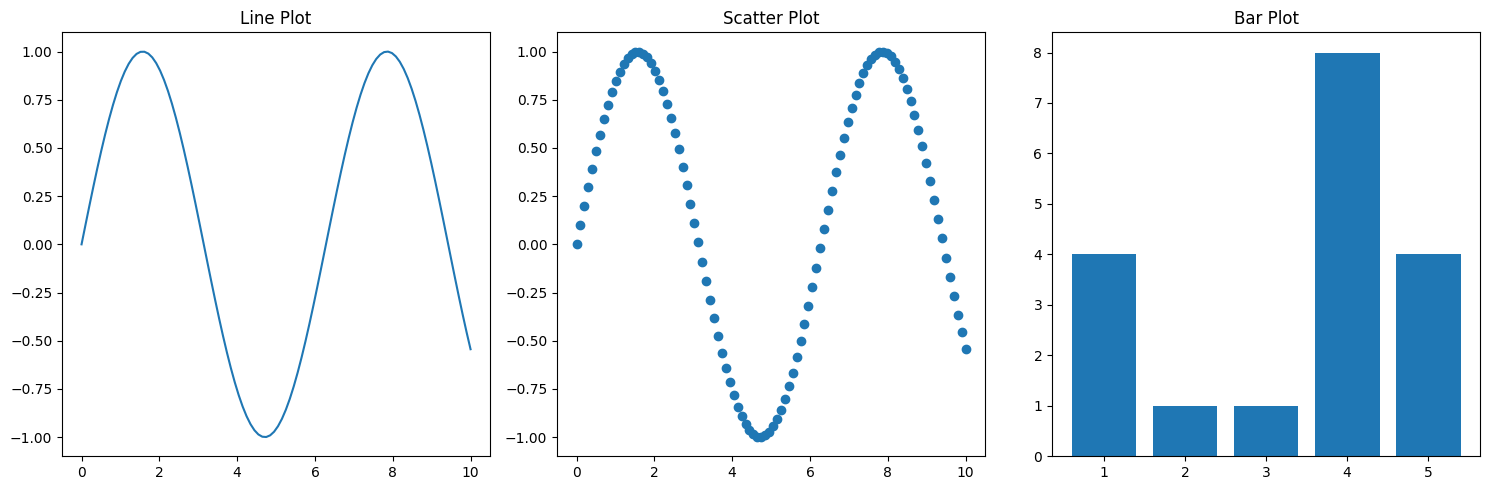

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Line plot
axs[0].plot(x, y)
axs[0].set_title('Line Plot')

# Scatter plot
axs[1].scatter(x, y)
axs[1].set_title('Scatter Plot')

# Bar plot
x_bar = np.arange(1, 6)
y_bar = np.random.randint(1, 10, size=5)
axs[2].bar(x_bar, y_bar)
axs[2].set_title('Bar Plot')

# Display the plots
plt.tight_layout()  # Adjust the layout to make room for the titles and labels
plt.show()


# VISUALIZATION FOR AS-I

In [31]:
### Import all what you need:
import torch
import torch.nn as nn
from torchsummary import summary # https://pypi.org/project/torch-summary/
import torchinfo 

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import time


# Pseudorandom number generator:
torch.manual_seed(123)

#Definition of the physical constants and hyperparameters:
mass = 1
d, w0 = 2, 20
mu, k = 2*d, w0**2            # Este mu NO se utiliza!!!!!
learning_rate =  1e-3         # learning rate
lambda1, lambda2 = 1e-3, 1e-4 # loss term hyperparameters
epochs = 20001

In [32]:
point_resolution = 25

### Generate domain physic loss sample points:

physic_in_t_mu = [torch.linspace(1e-2,1, point_resolution).requires_grad_(True), torch.linspace(1,10, point_resolution).requires_grad_(True)] # Mejora: se puede utilizar torch.rand
physic_domain_t_mu = torch.stack(torch.meshgrid(*physic_in_t_mu, indexing='ij'), -1).view(-1, 2).requires_grad_(True)

print(f" Point seed list for mesh grid domain points: \n \t {physic_in_t_mu}")
#print(f"Domain training points: \n \t: {physic_domain_t_mu}")
print(f"Size of Domain training points: \n \t {physic_domain_t_mu.size()}")

 Point seed list for mesh grid domain points: 
 	 [tensor([0.0100, 0.0513, 0.0925, 0.1338, 0.1750, 0.2163, 0.2575, 0.2988, 0.3400,
        0.3813, 0.4225, 0.4638, 0.5050, 0.5462, 0.5875, 0.6287, 0.6700, 0.7113,
        0.7525, 0.7937, 0.8350, 0.8762, 0.9175, 0.9588, 1.0000],
       requires_grad=True), tensor([ 1.0000,  1.3750,  1.7500,  2.1250,  2.5000,  2.8750,  3.2500,  3.6250,
         4.0000,  4.3750,  4.7500,  5.1250,  5.5000,  5.8750,  6.2500,  6.6250,
         7.0000,  7.3750,  7.7500,  8.1250,  8.5000,  8.8750,  9.2500,  9.6250,
        10.0000], requires_grad=True)]
Size of Domain training points: 
 	 torch.Size([625, 2])


In [33]:
#physic_domain_t_mu

In [34]:
physic_domain_t_mu.shape

torch.Size([625, 2])

In [35]:
physic_domain_t_mu[:,1].shape

torch.Size([625])

In [36]:
physic_domain_t_mu[:,0].shape

torch.Size([625])

In [37]:
residuals = torch.rand(physic_domain_t_mu[:,0].shape)
residuals.shape

torch.Size([625])

In [38]:
x = physic_domain_t_mu[:,0].detach()
y = physic_domain_t_mu[:,1].detach()
z = x*y

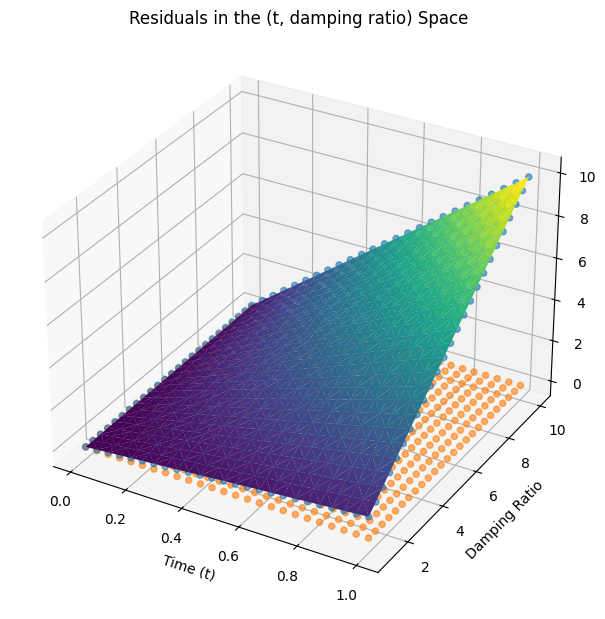

In [39]:
fig = plt.figure(figsize = (10,7.5))
ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x, y, residuals, alpha=0.6)
# ax.scatter(x, y, torch.zeros_like(residuals), alpha=0.6)
# # Plot the surface
# ax.plot_trisurf(x, y, residuals, cmap='viridis', edgecolor='none')

ax.scatter(x, y, z, alpha=0.6)
ax.scatter(x, y, torch.zeros_like(z), alpha=0.6)
# Plot the surface
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')


#ax.plot_surface(physic_domain_t_mu[:,0].detach(), physic_domain_t_mu[:,1].detach(), residuals, alpha=0.2, color='g')
ax.set_xlabel('Time (t)')
ax.set_ylabel('Damping Ratio')
ax.set_zlabel('Residuals')
plt.title('Residuals in the (t, damping ratio) Space')
plt.show()

In [42]:
z.shape

torch.Size([625])

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point_resolution = 50

# Generate domain physic loss sample points
physic_in_t_mu = [
    torch.linspace(1e-2, 1, point_resolution).requires_grad_(True),
    torch.linspace(1, 10, point_resolution).requires_grad_(True)
]

physic_domain_t_mu = torch.stack(torch.meshgrid(*physic_in_t_mu, indexing='ij'), -1).view(-1, 2).requires_grad_(True)

# Calculate z values
z = torch.sin(physic_domain_t_mu[:, 0]) + torch.cos(physic_domain_t_mu[:, 1]) #physic_domain_t_mu[:, 0] * physic_domain_t_mu[:, 1]

# Extract x, y, z values for plotting
x = physic_domain_t_mu[:, 0].detach()
y = physic_domain_t_mu[:, 1].detach()
z = z.detach()

# Plotting
fig = plt.figure(figsize= (15,10))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

plt.show()


In [ ]:
z.shape

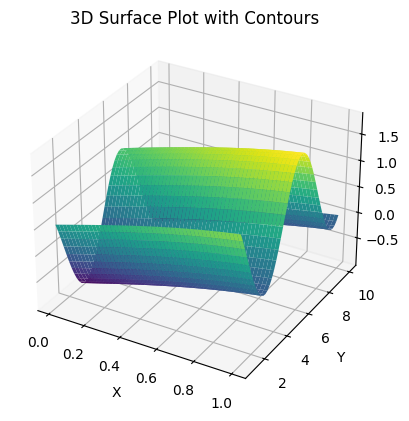

In [43]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

point_resolution = 50

# Generate domain physic loss sample points
physic_in_t_mu = [
    torch.linspace(1e-2, 1, point_resolution).requires_grad_(True),
    torch.linspace(1, 10, point_resolution).requires_grad_(True)
]

physic_domain_t_mu = torch.stack(torch.meshgrid(*physic_in_t_mu, indexing='ij'), -1).view(-1, 2).requires_grad_(True)

# Calculate z values
#z = physic_domain_t_mu[:, 0] * physic_domain_t_mu[:, 1]
z = torch.sin(physic_domain_t_mu[:, 0]) + torch.cos(physic_domain_t_mu[:, 1]) 
# Extract x, y, z values for plotting
x = physic_domain_t_mu[:, 0].detach().numpy().reshape(point_resolution, point_resolution)
y = physic_domain_t_mu[:, 1].detach().numpy().reshape(point_resolution, point_resolution)
z = z.detach().numpy().reshape(point_resolution, point_resolution)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

# Plot the contours
#ax.contour3D(x, y, z, 50, cmap='viridis')
#ax.contourf(x, y, z, 10, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot with Contours')

plt.show()


In [ ]:
z

In [ ]:
#Javascript Error: IPython is not defined%matplotlib notebook

In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the grid using two tensors (x and y)
x_0 = torch.linspace(-5, 5, 10)
y_0 = torch.linspace(0, 5, 5)
x, y = torch.meshgrid(x_0, y_0, indexing = "ij")

# Calculate z values using a function (example: z = sin(x) + cos(y))
z = torch.sin(x) + torch.cos(y)

# Plotting
fig = plt.figure(figsize = (20,5))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(x, y, z, cmap='viridis')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Surface Plot')

plt.show()


In [ ]:
x_0

In [ ]:
y_0

In [ ]:
x

In [ ]:
y

In [ ]:
z

In [ ]:
z.size(0)

In [ ]:
z[:,0]

In [ ]:
z[1,0]

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define 3D data points
x = torch.randn(100)
y = torch.randn(100)
z = torch.randn(100)

# Create a plane (for demonstration purposes, we assume a simple plane)
plane_normal = torch.tensor([0., 0., 1.])  # normal vector of the plane
point_on_plane = torch.tensor([0., 0., 0.])  # a point on the plane

# Project 3D data points onto the plane
# Projection of a point onto a plane: https://en.wikipedia.org/wiki/Vector_projection
projection = (x * plane_normal[0] + y * plane_normal[1] + z * plane_normal[2]) / (plane_normal[0]**2 + plane_normal[1]**2 + plane_normal[2]**2)
projection = projection.view(-1, 1) * plane_normal

# Calculate residuals
residuals = torch.stack([x, y, z], dim=1) - projection

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot 3D data points
ax.scatter(x, y, z, c='b', marker='o', label='Original Points')

# Plot the projection on the plane
ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], c='r', marker='x', label='Projection')

# Plot the residuals as a surface
xx, yy = torch.meshgrid(torch.linspace(-3, 3, 10), torch.linspace(-3, 3, 10), indexing = "ij")
zz = torch.zeros_like(xx)  # Z-values for the surface (residuals)
ax.plot_surface(xx, yy, zz, alpha=0.2, color='g')

# Plot the residuals as points
ax.scatter(residuals[:, 0], residuals[:, 1], residuals[:, 2], c='g', marker='o', label='Residuals')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


In [ ]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Use torch.meshgrid
t_values = torch.linspace(0, 10, 10)  # Time range
zeta_values = torch.linspace(0.1, 10, 10)  # Damping ratio range
T, Zeta = torch.meshgrid(t_values, zeta_values, indexing = "ij")
T_flat, Zeta_flat = T.flatten(), Zeta.flatten()

# Assume model and compute_loss_and_residuals are defined to handle PyTorch tensors

# Prepare (t, zeta) pairs for model input
t_zeta_pairs = torch.stack((T_flat, Zeta_flat), dim=1)

# Mock function call - replace with actual call to compute_loss_and_residuals
# assuming it returns a tensor of residuals
# For demonstration, generate random residuals
Residuals = torch.rand(T_flat.shape[0])  # Placeholder for actual residuals

# Visualization - Convert PyTorch tensors to numpy arrays for plotting
fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(T_flat, Zeta_flat, Residuals, alpha=0.6)
#ax.scatter(T_flat.numpy(), Zeta_flat.numpy(), Residuals.numpy(), alpha=0.6)

ax.set_xlabel('Time (t)')
ax.set_ylabel('Damping Ratio (zeta)')
ax.set_zlabel('Residuals')
plt.title('Residuals in the (t, zeta) Space')
plt.show()


In [ ]:
len(T_flat)

In [ ]:
print(sys.executable)

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample tensors
tensor1 = torch.randn(100, 2)  # 100 points in 2D
tensor2 = torch.randn(100, 2)  # 100 points in 2D
tensor3 = torch.randn(100, 3)  # 100 points in 3D

# Convert tensors to NumPy arrays
array1 = tensor1.numpy()
array2 = tensor2.numpy()
array3 = tensor3.numpy()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D representation of the other two tensors
ax.scatter(array3[:,0], array3[:,1], array3[:,2], c='r', marker='o')

# Plot the first two tensors in 2D
ax.scatter(array1[:,0], array1[:,1], c='b', marker='x')
ax.scatter(array2[:,0], array2[:,1], c='g', marker='^')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample tensors
tensor1 = torch.randn(10)  # Tensor 1
tensor2 = torch.randn(10)  # Tensor 2

# Function to calculate tensor 3 from tensor 1 and tensor 2
def calculate_tensor3(tensor1, tensor2):
    # Example function (replace this with your own function)
    return torch.stack((tensor1, tensor2, tensor1 * tensor2), dim=1)

tensor3 = calculate_tensor3(tensor1, tensor2)

# Convert tensors to NumPy arrays
array1 = tensor1.numpy()
array2 = tensor2.numpy()
array3 = tensor3.numpy()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot tensor 3 in 3D
ax.scatter(array3[:, 0], array3[:, 1], array3[:, 2], c='r', marker='o', label='Tensor 3')

# Plot the projection of tensor 1 onto the plane (tensor1, tensor2)
for i in range(len(array1)):
    ax.plot([array1[i], array1[i]], [array2[i], array2[i]], [0, array3[i, 2]], color='b', alpha=0.1)

# Plot the projection of tensor 2 onto the plane (tensor1, tensor2)
#for i in range(len(array2)):
#    ax.plot([array1[i], array1[i]], [array2[i], array2[i]], [0, array3[i, 2]], color='g', alpha=0.1)

ax.set_xlabel('Tensor 1')
ax.set_ylabel('Tensor 2')
ax.set_zlabel('Tensor 3')
ax.legend()

plt.show()


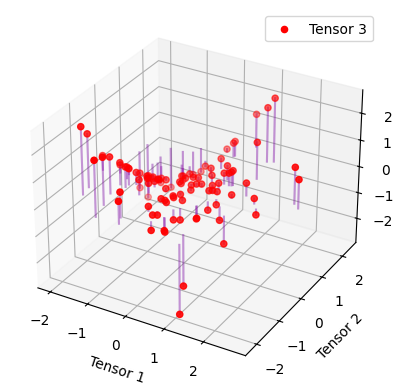

In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample tensors
tensor1 = torch.randn(100)  # Tensor 1
tensor2 = torch.randn(100)  # Tensor 2

# Function to calculate tensor 3 from tensor 1 and tensor 2
def calculate_tensor3(tensor1, tensor2):
    # Example function (replace this with your own function)
    return torch.stack((tensor1, tensor2, tensor1 * tensor2), dim=1)

tensor3 = calculate_tensor3(tensor1, tensor2)

# Convert tensors to NumPy arrays
array1 = tensor1.numpy()
array2 = tensor2.numpy()
array3 = tensor3.numpy()

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot tensor 3 in 3D
ax.scatter(array3[:, 0], array3[:, 1], array3[:, 2], c='r', marker='o', label='Tensor 3')

# Plot the projection of tensor 1 onto the plane (tensor1, tensor2)
for i in range(len(array1)):
    ax.plot([array1[i], array1[i]], [array2[i], array2[i]], [0, array3[i, 2]], color='b', alpha=0.1)

# Plot the projection of tensor 2 onto the plane (tensor1, tensor2)
for i in range(len(array2)):
    ax.plot([array1[i], array1[i]], [array2[i], array2[i]], [0, array3[i, 2]], color='g', alpha=0.1)

# Plot the projection of tensor 3 onto the plane (tensor1, tensor2)
for i in range(len(array3)):
    ax.plot([array3[i, 0], array1[i]], [array3[i, 1], array2[i]], [array3[i, 2], 0], color='m', alpha=0.3)

ax.set_xlabel('Tensor 1')
ax.set_ylabel('Tensor 2')
ax.set_zlabel('Tensor 3')
ax.legend()

plt.show()


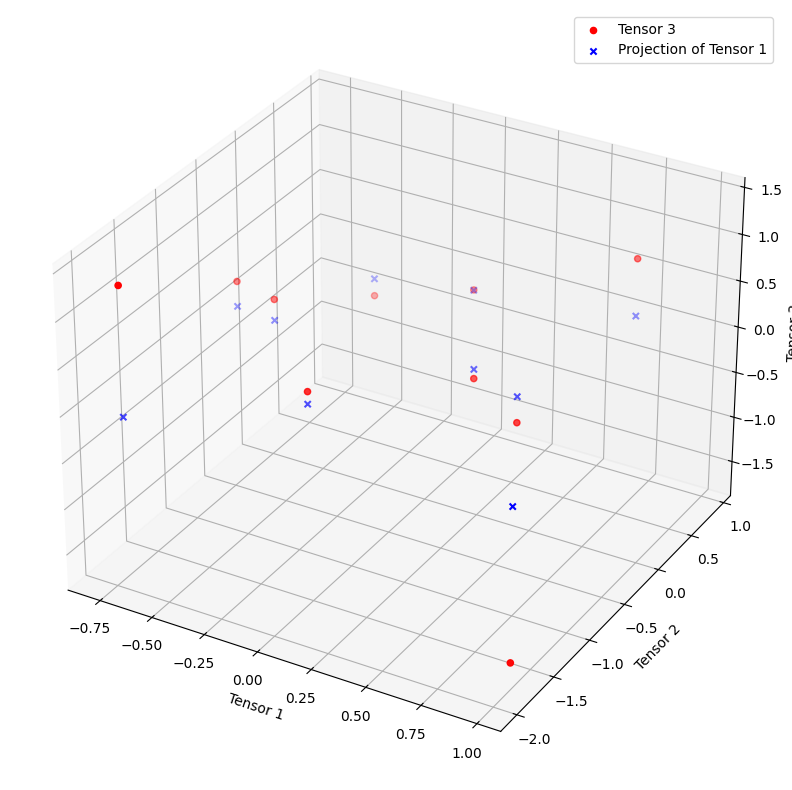

In [45]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample tensors
tensor1 = torch.randn(10)  # Tensor 1
tensor2 = torch.randn(10)  # Tensor 2

# Function to calculate tensor 3 from tensor 1 and tensor 2
def calculate_tensor3(tensor1, tensor2):
    # Example function (replace this with your own function)
    return torch.stack((tensor1, tensor2, tensor1 * tensor2), dim=1)

tensor3 = calculate_tensor3(tensor1, tensor2)

# Convert tensors to NumPy arrays
array1 = tensor1.numpy()
array2 = tensor2.numpy()
array3 = tensor3.numpy()

# Plotting
fig = plt.figure(figsize= (20,10))
ax = fig.add_subplot(111, projection='3d')

# Plot tensor 3 in 3D
ax.scatter(array3[:, 0], array3[:, 1], array3[:, 2], c='r', marker='o', label='Tensor 3')

# Plot the projection of tensor 1 onto the plane (tensor1, tensor2)
ax.scatter(array1, array2, np.zeros_like(array1), c='b', marker='x', label='Projection of Tensor 1')

# Plot the projection of tensor 2 onto the plane (tensor1, tensor2)
#ax.scatter(array1, array2, np.zeros_like(array1), c='g', marker='^', label='Projection of Tensor 2')

ax.set_xlabel('Tensor 1')
ax.set_ylabel('Tensor 2')
ax.set_zlabel('Tensor 3')
ax.legend()

plt.show()


In [ ]:
tensor3.shape

In [ ]:
tensor3

In [ ]:
tensor1

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define 3D data points
x = torch.randn(100)
y = torch.randn(100)
z = torch.randn(100)

# Create a plane (for demonstration purposes, we assume a simple plane)
plane_normal = torch.tensor([0., 0., 1.])  # normal vector of the plane
point_on_plane = torch.tensor([0., 0., 0.])  # a point on the plane

# Project 3D data points onto the plane
# Projection of a point onto a plane: https://en.wikipedia.org/wiki/Vector_projection
projection = (x * plane_normal[0] + y * plane_normal[1] + z * plane_normal[2]) / (plane_normal[0]**2 + plane_normal[1]**2 + plane_normal[2]**2)
projection = projection.view(-1, 1) * plane_normal

# Plotting
fig = plt.figure(figsize = (20,10))
ax = fig.add_subplot(111, projection='3d')

# Plot 3D data points
ax.scatter(x, y, z, c='b', marker='o', label='Original Points')

# Plot the projection on the plane
ax.scatter(projection[:, 0], projection[:, 1], projection[:, 2], c='r', marker='x', label='Projection')

# Plot the plane
xx, yy = np.meshgrid(np.linspace(-3, 3, 10), np.linspace(-3, 3, 10))
zz = (-plane_normal[0] * xx - plane_normal[1] * yy - point_on_plane[2]) / plane_normal[2]
ax.plot_surface(xx, yy, zz, alpha=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


## Test with tensors

In [2]:
import torch

In [5]:
t = torch.zeros(size=(1,0))

In [9]:
t

tensor([], size=(1, 0))

In [10]:
t.numel()

0

In [6]:
t.nelement()   # returns zero, empty in this sense

0

In [7]:
len(t.size())  # returns two, not empty in this sense!!

2

In [8]:
len(t)         # returns one, not empty in this sense!!

1

In [12]:
t1 = torch.zeros(size=(0,1))
len(t1)         # returns zero for this one!

0

In [13]:
t1

tensor([], size=(0, 1))

# FROM BEN MOSELEY

In [20]:
torch.manual_seed(123)

## DEVICE

In [15]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

## Test from Ben Moseley

In [24]:
t_initial = torch.tensor(0.).view(-1,1).requires_grad_(True).to(device)
t_initial

tensor([[0.]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [25]:
t_initial.size()

torch.Size([1, 1])

In [26]:
t_initial.numel()

1

In [27]:
t_initial.item()

0.0

In [28]:
t_initial[0]

tensor([0.], device='cuda:0', grad_fn=<SelectBackward0>)

In [53]:
t_initial_squeeze = t_initial.squeeze()
t_initial_squeeze

tensor(0., device='cuda:0', grad_fn=<SqueezeBackward0>)

In [54]:
t_initial_squeeze.item()

0.0

In [56]:
type(t_initial_squeeze.item())

float

In [51]:
t_initial_squeeze.size()

torch.Size([])

In [52]:
t_initial_squeeze.nelement()

1

In [72]:
# Define training points over the entire domain, for the physics loss
t_physics = torch.linspace(0,1,30).view(-1,1).requires_grad_(True).to(device)
t_physics

tensor([[0.0000],
        [0.0345],
        [0.0690],
        [0.1034],
        [0.1379],
        [0.1724],
        [0.2069],
        [0.2414],
        [0.2759],
        [0.3103],
        [0.3448],
        [0.3793],
        [0.4138],
        [0.4483],
        [0.4828],
        [0.5172],
        [0.5517],
        [0.5862],
        [0.6207],
        [0.6552],
        [0.6897],
        [0.7241],
        [0.7586],
        [0.7931],
        [0.8276],
        [0.8621],
        [0.8966],
        [0.9310],
        [0.9655],
        [1.0000]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [32]:
t_physics.numel()

30

In [33]:
t_physics.size()

torch.Size([30, 1])

In [73]:
t_physics.squeeze().size()

torch.Size([30])

In [34]:
t_physics.item()

RuntimeError: a Tensor with 30 elements cannot be converted to Scalar

In [95]:
t_physics_without_view = torch.linspace(0,1,30).requires_grad_(True).to(device)
t_physics_without_view

tensor([0.0000, 0.0345, 0.0690, 0.1034, 0.1379, 0.1724, 0.2069, 0.2414, 0.2759,
        0.3103, 0.3448, 0.3793, 0.4138, 0.4483, 0.4828, 0.5172, 0.5517, 0.5862,
        0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966,
        0.9310, 0.9655, 1.0000], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [84]:
t_physics_without_view.size()

30

In [40]:
t_physics_list = t_physics.tolist()
t_physics_list

[[0.0],
 [0.03448275849223137],
 [0.06896551698446274],
 [0.10344827175140381],
 [0.13793103396892548],
 [0.17241379618644714],
 [0.20689654350280762],
 [0.24137930572032928],
 [0.27586206793785095],
 [0.3103448152542114],
 [0.3448275923728943],
 [0.37931033968925476],
 [0.41379308700561523],
 [0.4482758641242981],
 [0.48275861144065857],
 [0.517241358757019],
 [0.5517241358757019],
 [0.5862069129943848],
 [0.6206896305084229],
 [0.6551724076271057],
 [0.6896551847457886],
 [0.7241379022598267],
 [0.7586206793785095],
 [0.7931034564971924],
 [0.8275862336158752],
 [0.8620689511299133],
 [0.8965517282485962],
 [0.931034505367279],
 [0.9655172228813171],
 [1.0]]

In [37]:
type(t_physics_list)

list

In [38]:
len(t_physics_list)

30

In [39]:
t_physics_list.size()

AttributeError: 'list' object has no attribute 'size'

In [41]:
type(t_physics_list[0])

list

In [48]:
len(t_physics)

30

In [58]:
a = torch.randn(2, 2)
a

tensor([[-1.1969,  0.2093],
        [-0.9724, -0.7550]])

In [61]:
a_flatten = a.flatten()
a_flatten

tensor([-1.1969,  0.2093, -0.9724, -0.7550])

In [62]:
a_flatten.size()

torch.Size([4])

In [65]:
X = torch.tensor([[1,2,3,4],
              [5,6,7,8],
              [9,10,11,12]], dtype = torch.float32)
X

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [66]:
X.size()

torch.Size([3, 4])

In [69]:
X.flatten()

tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [70]:
X.squeeze() # squeeze no tiene sentido pq no hay ninguna dimension con 1

tensor([[ 1.,  2.,  3.,  4.],
        [ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.]])

In [98]:
t_physics[0]

tensor([0.], device='cuda:0', grad_fn=<SelectBackward0>)

In [102]:
t = torch.rand(3,2).requires_grad_(True)
t

tensor([[0.9156, 0.4340],
        [0.0772, 0.3565],
        [0.1479, 0.5331]], requires_grad=True)

In [103]:
t.size()

torch.Size([3, 2])

In [109]:
t.squeeze(dim = 1)

tensor([[0.9156, 0.4340],
        [0.0772, 0.3565],
        [0.1479, 0.5331]], grad_fn=<SqueezeBackward1>)

In [112]:
x = torch.zeros(1,2,1,2)
x

tensor([[[[0., 0.]],

         [[0., 0.]]]])

In [111]:
x.size()

torch.Size([2, 1, 2, 1, 2])

In [288]:
# https://stackoverflow.com/questions/61598771/pytorch-squeeze-and-unsqueeze
test = torch.tensor([[1,2],[3,4]], dtype = float).requires_grad_(True)
test

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64, requires_grad=True)

In [219]:
test.size()

torch.Size([2, 2])

In [220]:
test.squeeze(dim = 1)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64, grad_fn=<SqueezeBackward1>)

In [290]:
test_0 = test.unsqueeze(dim = 0)
test_0

tensor([[[1., 2.],
         [3., 4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [222]:
test_1 = test.unsqueeze(dim = 1)
test_1

tensor([[[1., 2.]],

        [[3., 4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [234]:
test_1[0].size()

torch.Size([1, 2])

In [223]:
test_2 = test.unsqueeze(dim = 2)
test_2

tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [224]:
test_3 = test.unsqueeze(dim = 3)

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got 3)

In [235]:
test_minus1 = test.unsqueeze(dim = -1)
test_minus1

tensor([[[1.],
         [2.]],

        [[3.],
         [4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [286]:
test_minus2 = test.unsqueeze(dim = -2)
test_minus2

3

In [237]:
test_minus3 = test.unsqueeze(dim = -3)
test_minus3

tensor([[[1., 2.],
         [3., 4.]]], dtype=torch.float64, grad_fn=<UnsqueezeBackward0>)

In [238]:
test_minus4 = test.unsqueeze(dim = -4)
test_minus4

IndexError: Dimension out of range (expected to be in range of [-3, 2], but got -4)

### More tests

In [202]:
tensor = torch.tensor([[1, 2, 3]])
tensor

tensor([[1, 2, 3]])

In [210]:
tensor.size()

torch.Size([1, 3])

In [193]:
new_tensor = tensor.unsqueeze(0)
new_tensor

tensor([[1, 2, 3]])

In [206]:
new = torch.tensor([[4,5,6]])
new

tensor([[4, 5, 6]])

In [217]:
torch.cat((tensor, new, new), dim = 0)

tensor([[1, 2, 3],
        [4, 5, 6],
        [4, 5, 6]])

In [191]:
torch.cat((new_tensor, new.unsqueeze(0)),dim = 1 )

tensor([[1, 2, 3, 4, 5, 6]])

In [196]:
f = torch.rand(2, 6, 4, 4)  # 2 images 6 channels, 4x4 pixels
f

tensor([[[[0.9950, 0.8413, 0.6599, 0.0103],
          [0.4049, 0.9120, 0.2212, 0.2430],
          [0.5446, 0.2318, 0.4691, 0.6447],
          [0.8539, 0.5704, 0.6984, 0.9086]],

         [[0.7512, 0.0135, 0.1066, 0.0439],
          [0.3235, 0.9967, 0.0176, 0.5642],
          [0.0583, 0.2467, 0.9792, 0.9671],
          [0.2165, 0.5073, 0.2813, 0.3542]],

         [[0.3945, 0.6523, 0.8893, 0.3985],
          [0.1685, 0.0803, 0.3062, 0.2810],
          [0.0130, 0.3146, 0.2945, 0.9927],
          [0.7152, 0.1541, 0.2111, 0.6706]],

         [[0.8069, 0.4668, 0.4996, 0.7229],
          [0.3289, 0.0073, 0.6841, 0.9670],
          [0.2815, 0.9219, 0.4205, 0.8534],
          [0.7671, 0.8932, 0.0828, 0.7444]],

         [[0.8024, 0.5709, 0.3982, 0.1936],
          [0.6919, 0.5349, 0.2997, 0.7639],
          [0.6354, 0.9895, 0.8558, 0.7738],
          [0.6275, 0.8133, 0.4907, 0.3223]],

         [[0.2288, 0.3530, 0.6361, 0.5468],
          [0.7007, 0.7460, 0.7873, 0.4070],
          [0.6171, 0.8

In [197]:
f.unsqueeze(0)

tensor([[[[[0.9950, 0.8413, 0.6599, 0.0103],
           [0.4049, 0.9120, 0.2212, 0.2430],
           [0.5446, 0.2318, 0.4691, 0.6447],
           [0.8539, 0.5704, 0.6984, 0.9086]],

          [[0.7512, 0.0135, 0.1066, 0.0439],
           [0.3235, 0.9967, 0.0176, 0.5642],
           [0.0583, 0.2467, 0.9792, 0.9671],
           [0.2165, 0.5073, 0.2813, 0.3542]],

          [[0.3945, 0.6523, 0.8893, 0.3985],
           [0.1685, 0.0803, 0.3062, 0.2810],
           [0.0130, 0.3146, 0.2945, 0.9927],
           [0.7152, 0.1541, 0.2111, 0.6706]],

          [[0.8069, 0.4668, 0.4996, 0.7229],
           [0.3289, 0.0073, 0.6841, 0.9670],
           [0.2815, 0.9219, 0.4205, 0.8534],
           [0.7671, 0.8932, 0.0828, 0.7444]],

          [[0.8024, 0.5709, 0.3982, 0.1936],
           [0.6919, 0.5349, 0.2997, 0.7639],
           [0.6354, 0.9895, 0.8558, 0.7738],
           [0.6275, 0.8133, 0.4907, 0.3223]],

          [[0.2288, 0.3530, 0.6361, 0.5468],
           [0.7007, 0.7460, 0.7873, 0.4070],


#### Example: https://saturncloud.io/blog/what-does-unsqueeze-do-in-pytorch/

In [320]:
# 1D -> 2D
tensor_1D = torch.Tensor([1, 2, 3])
tensor_1D

tensor([1., 2., 3.])

In [244]:
tensor_1D.size()

torch.Size([3])

In [260]:
tensor_1D[0]

tensor(1.)

In [271]:
tensor_1D.dim()

1

In [296]:
tensor_2D_d0 = tensor.unsqueeze(dim = 0) # added a new dimension adding [ ] externally when dim = 0, generating a 2D tensor
tensor_2D_d0                             # 2D tensor: single row, 3 columns

tensor([[1., 2., 3.]])

In [343]:
tensor_2D_d0.size()

torch.Size([1, 3])

In [300]:
tensor_2D_d1 = tensor.unsqueeze(dim = 1) # added a new dimension adding [ ] INternally when dim = 1, generating a 2D tensor
tensor_2D_d1                            # 2D tensor: 3 rows, 1 column

tensor([[1.],
        [2.],
        [3.]])

In [302]:
tensor_2D_d1.size()

torch.Size([3, 1])

In [303]:
tensor_2D_d1.dim()

2

In [306]:
torch.cat((tensor_2D_d0, tensor_2D_d0), dim = 0)

tensor([[1., 2., 3.],
        [1., 2., 3.]])

In [313]:
torch.cat((tensor_2D_d1, tensor_2D_d1), dim = 0)

tensor([[1.],
        [2.],
        [3.],
        [1.],
        [2.],
        [3.]])

In [321]:
# 2D -> 1D
image = torch.zeros((8, 8)) # create a 8x8 image
image

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [319]:
image.dim()

2

In [341]:
image.size()

torch.Size([8, 8])

In [355]:
image.unsqueeze(dim = 0).size()

torch.Size([1, 8, 8])

In [365]:
image.unsqueeze(dim = 0).unsqueeze(dim = 0).size()

torch.Size([1, 1, 8, 8])

#### Tests of Tensors:

In [301]:
x = torch.rand(4,4)

In [302]:
x

tensor([[0.2266, 0.3803, 0.5491, 0.2714],
        [0.2391, 0.3194, 0.8111, 0.7507],
        [0.3306, 0.5374, 0.2845, 0.8459],
        [0.2232, 0.2083, 0.8169, 0.1084]])

In [359]:
print(x.requires_grad)

False


In [303]:
torch.numel(x)

16

In [304]:
x.size()

torch.Size([4, 4])

In [305]:
y = x.view(16)
y

tensor([0.2266, 0.3803, 0.5491, 0.2714, 0.2391, 0.3194, 0.8111, 0.7507, 0.3306,
        0.5374, 0.2845, 0.8459, 0.2232, 0.2083, 0.8169, 0.1084])

In [306]:
y.size()

torch.Size([16])

In [307]:
z = x.view(-1, 8)
z

tensor([[0.2266, 0.3803, 0.5491, 0.2714, 0.2391, 0.3194, 0.8111, 0.7507],
        [0.3306, 0.5374, 0.2845, 0.8459, 0.2232, 0.2083, 0.8169, 0.1084]])

In [308]:
z.size()

torch.Size([2, 8])

In [309]:
w = z.view(-1, 1)

In [310]:
w.size()

torch.Size([16, 1])

In [312]:
type(t_boundary)

torch.Tensor

In [313]:
t_boundary.size()

torch.Size([1, 1])

In [314]:
torch.numel(t_boundary)

1

In [315]:
t_boundary_1 = torch.tensor(0.).requires_grad_(True)
t_boundary_1.size()

torch.Size([])

In [316]:
type(t_boundary_1)

torch.Tensor

In [317]:
t_boundary_1

tensor(0., requires_grad=True)

In [361]:
print(t_physics.data)

tensor([[0.0000],
        [0.0345],
        [0.0690],
        [0.1034],
        [0.1379],
        [0.1724],
        [0.2069],
        [0.2414],
        [0.2759],
        [0.3103],
        [0.3448],
        [0.3793],
        [0.4138],
        [0.4483],
        [0.4828],
        [0.5172],
        [0.5517],
        [0.5862],
        [0.6207],
        [0.6552],
        [0.6897],
        [0.7241],
        [0.7586],
        [0.7931],
        [0.8276],
        [0.8621],
        [0.8966],
        [0.9310],
        [0.9655],
        [1.0000]])


In [365]:
t_physics.requires_grad

True

In [366]:
x = torch.tensor(3.0, requires_grad = True)
print("creating a tensor x: ", x)

creating a tensor x:  tensor(3., requires_grad=True)


In [367]:
y = 3 * x ** 2
print("Result of the equation is: ", y)
y.backward()
print("Dervative of the equation at x = 3 is: ", x.grad)

Result of the equation is:  tensor(27., grad_fn=<MulBackward0>)
Dervative of the equation at x = 3 is:  tensor(18.)


In [368]:
print('data attribute of the tensor:',x.data)
print('grad attribute of the tensor::',x.grad)
print('grad_fn attribute of the tensor::',x.grad_fn)
print("is_leaf attribute of the tensor::",x.is_leaf)
print("requires_grad attribute of the tensor::",x.requires_grad)

data attribute of the tensor: tensor(3.)
grad attribute of the tensor:: tensor(18.)
grad_fn attribute of the tensor:: None
is_leaf attribute of the tensor:: True
requires_grad attribute of the tensor:: True


In [372]:
print('data attribute of the tensor:',y.data)
print('grad attribute of the tensor:',y.grad)
print('grad_fn attribute of the tensor:',y.grad_fn)
print("is_leaf attribute of the tensor:",y.is_leaf)
print("requires_grad attribute of the tensor:",y.requires_grad)

data attribute of the tensor: tensor(27.)
grad attribute of the tensor: None
grad_fn attribute of the tensor: <MulBackward0 object at 0x7fc5bae72590>
is_leaf attribute of the tensor: False
requires_grad attribute of the tensor: True


/tmp/ipykernel_82/546295165.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1682343967769/work/build/aten/src/ATen/core/TensorBody.h:486.)
  print('grad attribute of the tensor:',y.grad)


In [363]:
t_physics.grad

tensor([[-281.6199],
        [ 287.8589],
        [  16.8344],
        [-256.9503],
        [-393.8383],
        [  91.7973],
        [ 280.4128],
        [-233.8141],
        [-164.0754],
        [ -47.4722],
        [  63.8647],
        [ 228.3219],
        [-104.8897],
        [-253.5235],
        [ 162.1633],
        [  40.2926],
        [ -79.4037],
        [ -71.8829],
        [ -25.3013],
        [  48.3945],
        [ 267.7218],
        [-136.8341],
        [-203.7547],
        [ 122.0204],
        [  76.6104],
        [-107.3224],
        [ -75.6846],
        [  27.9414],
        [  15.5472],
        [ 118.9486]])

In [319]:
t_physics

tensor([[0.0000],
        [0.0345],
        [0.0690],
        [0.1034],
        [0.1379],
        [0.1724],
        [0.2069],
        [0.2414],
        [0.2759],
        [0.3103],
        [0.3448],
        [0.3793],
        [0.4138],
        [0.4483],
        [0.4828],
        [0.5172],
        [0.5517],
        [0.5862],
        [0.6207],
        [0.6552],
        [0.6897],
        [0.7241],
        [0.7586],
        [0.7931],
        [0.8276],
        [0.8621],
        [0.8966],
        [0.9310],
        [0.9655],
        [1.0000]], requires_grad=True)

In [320]:
t_physics_1 = torch.linspace(0,1,30).requires_grad_(True)
t_physics_1.size()

torch.Size([30])

In [321]:
torch.numel(t_physics)

30

In [323]:
type(t_test)

torch.Tensor

In [324]:
#t_test

In [325]:
t_test.size()

torch.Size([300, 1])

In [326]:
t_test.shape

torch.Size([300, 1])

In [327]:
torch.numel(t_test)

300

#### Tests:

In [379]:
print(dict(pinn.named_parameters()))

{'fc_in.weight': Parameter containing:
tensor([[ 0.6727],
        [ 0.8020],
        [-0.2100],
        [ 0.7619],
        [-0.7832],
        [ 0.0865],
        [-0.5631],
        [-0.2332],
        [-0.2561],
        [ 0.0748],
        [ 0.9101],
        [ 0.4951],
        [-0.0042],
        [ 0.7098],
        [-0.5125],
        [ 0.5154],
        [-0.0927],
        [-0.1740],
        [ 0.1171],
        [-0.7661],
        [ 0.1156],
        [ 0.3362],
        [ 0.8549],
        [-0.3113],
        [ 0.3600],
        [ 0.9995],
        [-0.4290],
        [ 0.9506],
        [-0.4965],
        [ 0.4408],
        [ 0.3918],
        [ 0.2793]], device='cuda:0', requires_grad=True), 'fc_in.bias': Parameter containing:
tensor([ 0.7908, -0.4042,  0.2628,  0.0056, -0.7521, -0.2428, -0.6678,  0.4422,
         0.0899,  0.0980, -0.3034,  0.0048, -0.3110,  0.2873,  0.9712,  0.1515,
        -0.4429, -0.6108,  0.0764, -0.7418, -0.7517, -0.6509, -0.3396,  0.0740,
         0.6886,  0.3873,  0.7661, -0.

In [380]:
dict(pinn.named_parameters())

{'fc_in.weight': Parameter containing:
 tensor([[ 0.6727],
         [ 0.8020],
         [-0.2100],
         [ 0.7619],
         [-0.7832],
         [ 0.0865],
         [-0.5631],
         [-0.2332],
         [-0.2561],
         [ 0.0748],
         [ 0.9101],
         [ 0.4951],
         [-0.0042],
         [ 0.7098],
         [-0.5125],
         [ 0.5154],
         [-0.0927],
         [-0.1740],
         [ 0.1171],
         [-0.7661],
         [ 0.1156],
         [ 0.3362],
         [ 0.8549],
         [-0.3113],
         [ 0.3600],
         [ 0.9995],
         [-0.4290],
         [ 0.9506],
         [-0.4965],
         [ 0.4408],
         [ 0.3918],
         [ 0.2793]], device='cuda:0', requires_grad=True),
 'fc_in.bias': Parameter containing:
 tensor([ 0.7908, -0.4042,  0.2628,  0.0056, -0.7521, -0.2428, -0.6678,  0.4422,
          0.0899,  0.0980, -0.3034,  0.0048, -0.3110,  0.2873,  0.9712,  0.1515,
         -0.4429, -0.6108,  0.0764, -0.7418, -0.7517, -0.6509, -0.3396,  0.0740,
  

In [381]:
pinn.named_parameters()

<generator object Module.named_parameters at 0x7f74aca17760>

In [382]:
type(pinn.named_parameters())

generator

In [383]:
pinn.state_dict()["fc_out.weight"].size() # ["fc_in.weight"] ["fc_in.bias"], ["fc_out.weight"], ["fc_out.bias"]

torch.Size([1, 32])

In [384]:
pinn.state_dict()

OrderedDict([('fc_in.weight',
              tensor([[ 0.6727],
                      [ 0.8020],
                      [-0.2100],
                      [ 0.7619],
                      [-0.7832],
                      [ 0.0865],
                      [-0.5631],
                      [-0.2332],
                      [-0.2561],
                      [ 0.0748],
                      [ 0.9101],
                      [ 0.4951],
                      [-0.0042],
                      [ 0.7098],
                      [-0.5125],
                      [ 0.5154],
                      [-0.0927],
                      [-0.1740],
                      [ 0.1171],
                      [-0.7661],
                      [ 0.1156],
                      [ 0.3362],
                      [ 0.8549],
                      [-0.3113],
                      [ 0.3600],
                      [ 0.9995],
                      [-0.4290],
                      [ 0.9506],
                      [-0.4965],
             

In [385]:
len(pinn.state_dict())

4

In [386]:
print(pinn)

FCN(
  (fc_in): Linear(in_features=1, out_features=32, bias=True)
  (tangh): Tanh()
  (fc_out): Linear(in_features=32, out_features=1, bias=True)
)


In [387]:
pinn._modules

OrderedDict([('fc_in', Linear(in_features=1, out_features=32, bias=True)),
             ('tangh', Tanh()),
             ('fc_out', Linear(in_features=32, out_features=1, bias=True))])

In [388]:
summary(pinn, depth = 3, verbose = 2)

Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            64
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
Total params: 97
Trainable params: 97
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            64
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
Total params: 97
Trainable params: 97
Non-trainable params: 0

In [389]:
torchinfo.summary(pinn, verbose = 2)

Layer (type:depth-idx)                   Param #
FCN                                      --
├─Linear: 1-1                            64
│    └─weight                            ├─32
│    └─bias                              └─32
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
│    └─weight                            ├─32
│    └─bias                              └─1
Total params: 97
Trainable params: 97
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
FCN                                      --
├─Linear: 1-1                            64
│    └─weight                            ├─32
│    └─bias                              └─32
├─Tanh: 1-2                              --
├─Linear: 1-3                            33
│    └─weight                            ├─32
│    └─bias                              └─1
Total params: 97
Trainable params: 97
Non-trainable params: 0

#### Tests pinn.parameters():

In [391]:
pinn.parameters()

<generator object Module.parameters at 0x7f74ac9000b0>

In [423]:
#list(pinn.parameters())

In [422]:
#list(pinn.parameters())[0]

In [394]:
list(pinn.parameters())[0][0]

tensor([0.6727], device='cuda:0', grad_fn=<SelectBackward0>)

In [395]:
list(pinn.parameters())

[Parameter containing:
 tensor([[ 0.6727],
         [ 0.8020],
         [-0.2100],
         [ 0.7619],
         [-0.7832],
         [ 0.0865],
         [-0.5631],
         [-0.2332],
         [-0.2561],
         [ 0.0748],
         [ 0.9101],
         [ 0.4951],
         [-0.0042],
         [ 0.7098],
         [-0.5125],
         [ 0.5154],
         [-0.0927],
         [-0.1740],
         [ 0.1171],
         [-0.7661],
         [ 0.1156],
         [ 0.3362],
         [ 0.8549],
         [-0.3113],
         [ 0.3600],
         [ 0.9995],
         [-0.4290],
         [ 0.9506],
         [-0.4965],
         [ 0.4408],
         [ 0.3918],
         [ 0.2793]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.7908, -0.4042,  0.2628,  0.0056, -0.7521, -0.2428, -0.6678,  0.4422,
          0.0899,  0.0980, -0.3034,  0.0048, -0.3110,  0.2873,  0.9712,  0.1515,
         -0.4429, -0.6108,  0.0764, -0.7418, -0.7517, -0.6509, -0.3396,  0.0740,
          0.6886,  0.3873,  0.76

In [396]:
type(optimiser)

torch.optim.adam.Adam

# Jason Brownlee

Mini-batch
https://machinelearningmastery.com/mini-batch-gradient-descent-and-dataloader-in-pytorch/

In [366]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
torch.manual_seed(42)

# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.y = -5 * X
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

In [381]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
X.shape[0]

100

In [ ]:
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
torch.manual_seed(42)

# Creating a function f(X) with a slope of -5
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X
# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

w = torch.tensor(-10.0, requires_grad = True)
b = torch.tensor(-20.0, requires_grad = True)

# defining the function for forward pass for prediction
def forward(x):
    return w * x + b

# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

# Creating our dataset class
class Build_Data(Dataset):
    # Constructor
    def __init__(self):
        self.x = torch.arange(-5, 5, 0.1).view(-1, 1)
        self.y = -5 * X
        self.len = self.x.shape[0]
    # Getting the data
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    # Getting length of the data
    def __len__(self):
        return self.len

# Creating DataLoader object
dataset = Build_Data()
train_loader = DataLoader(dataset=dataset, batch_size=1)

step_size = 0.1
loss_SGD = []
n_iter = 20

for i in range (n_iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = forward(X)
    loss_SGD.append(criterion(y_pred, Y).tolist())
    for x, y in train_loader:
        # making a prediction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()

In [373]:
# Creating DataLoader object
dataset = Build_Data()
train_loader = DataLoader(dataset=dataset, batch_size=1)
train_loader_10 = DataLoader(dataset=dataset, batch_size=10)

step_size = 0.1
loss_SGD = []
n_iter = 2
 
for i in range (n_iter):
    # calculating loss as in the beginning of an epoch and storing it
    y_pred = forward(X)
    loss_SGD.append(criterion(y_pred, Y).tolist())
    for x, y in train_loader_10:
        # making a prediction in forward pass
        y_hat = forward(x)
        # calculating the loss between original and predicted data points
        loss = criterion(y_hat, y)
        # backward pass for computing the gradients of the loss w.r.t to learnable parameters
        loss.backward()
        # updating the parameters after each iteration
        w.data = w.data - step_size * w.grad.data
        b.data = b.data - step_size * b.grad.data
        # zeroing gradients after each iteration
        w.grad.data.zero_()
        b.grad.data.zero_()
        print(y)
        print("next one")
        #print(y)
    print("next iteration")

tensor([[25.0000],
        [24.5000],
        [24.0000],
        [23.5000],
        [23.0000],
        [22.5000],
        [22.0000],
        [21.5000],
        [21.0000],
        [20.5000]])
next one
tensor([[20.0000],
        [19.5000],
        [19.0000],
        [18.5000],
        [18.0000],
        [17.5000],
        [17.0000],
        [16.5000],
        [16.0000],
        [15.5000]])
next one
tensor([[15.0000],
        [14.5000],
        [14.0000],
        [13.5000],
        [13.0000],
        [12.5000],
        [12.0000],
        [11.5000],
        [11.0000],
        [10.5000]])
next one
tensor([[10.0000],
        [ 9.5000],
        [ 9.0000],
        [ 8.5000],
        [ 8.0000],
        [ 7.5000],
        [ 7.0000],
        [ 6.5000],
        [ 6.0000],
        [ 5.5000]])
next one
tensor([[5.0000],
        [4.5000],
        [4.0000],
        [3.5000],
        [3.0000],
        [2.5000],
        [2.0000],
        [1.5000],
        [1.0000],
        [0.5000]])
next one
tensor([[ 

In [385]:
x = torch.tensor([1, 2, 3])
x.size()

torch.Size([3])

In [397]:
x_1 = torch.tensor([[1], [2], [3]])
x_1.size()
x_1

tensor([[1],
        [2],
        [3]])

In [406]:
torch.unsqueeze(x_1.expand(-1, 4), dim=-1)

tensor([[[1],
         [1],
         [1],
         [1]],

        [[2],
         [2],
         [2],
         [2]],

        [[3],
         [3],
         [3],
         [3]]])

In [591]:
x = torch.randn(10, 2)
x[0]

2

In [587]:
x

tensor([[-0.4330,  0.9634],
        [ 1.2769,  1.0020],
        [-0.4084,  0.1136],
        [ 1.7447,  0.5347],
        [ 0.0370,  0.4221],
        [ 0.2748, -0.2607],
        [ 1.1394,  1.0076],
        [-0.8242,  0.6155],
        [-0.7871, -0.8824],
        [ 1.8951,  0.3365]])

In [828]:
torch.permute(torch.tensor([1,2,3]), dims = (1,2,3))

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 1 is not equal to len(dims) = 3

In [836]:
t_physics.size()[0]

30

In [840]:
# Define training points over the entire domain, for the physics loss
mu_1 = torch.linspace(1,10, t_physics.size(0)).view(-1, 1).requires_grad_(True).to(device)
mu_1#.size()

tensor([[ 1.0000],
        [ 1.3103],
        [ 1.6207],
        [ 1.9310],
        [ 2.2414],
        [ 2.5517],
        [ 2.8621],
        [ 3.1724],
        [ 3.4828],
        [ 3.7931],
        [ 4.1034],
        [ 4.4138],
        [ 4.7241],
        [ 5.0345],
        [ 5.3448],
        [ 5.6552],
        [ 5.9655],
        [ 6.2759],
        [ 6.5862],
        [ 6.8966],
        [ 7.2069],
        [ 7.5172],
        [ 7.8276],
        [ 8.1379],
        [ 8.4483],
        [ 8.7586],
        [ 9.0690],
        [ 9.3793],
        [ 9.6897],
        [10.0000]], device='cuda:0', grad_fn=<ToCopyBackward0>)

In [864]:
# Define training points over the entire domain, for the physics loss
mu_2 = torch.linspace(1,10, 10).view(1, -1).requires_grad_(True).to(device)
mu_2#.size()

tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]], device='cuda:0',
       grad_fn=<ToCopyBackward0>)

In [921]:
mu_2_repeat = mu_2.repeat(t_physics.size(0),1)
#torch.squeeze(mu_2_repeat[:,0], dim = -1)
#mu_2_repeat.size()
tensors = []
for i in range(0,10):
    tensors.append(torch.cat((t_physics, torch.unsqueeze(mu_2_repeat[:,i], dim = 1)), 1))
    #tensors = mu_2_repeat_1_column = mu_2_repeat[:,0].clone()
#torch.cat( (t_physics, torch.unsqueeze(mu_2_repeat_1_column, dim = 1), 1)
tensors[0]

tensor([[0.0000, 1.0000],
        [0.0345, 1.0000],
        [0.0690, 1.0000],
        [0.1034, 1.0000],
        [0.1379, 1.0000],
        [0.1724, 1.0000],
        [0.2069, 1.0000],
        [0.2414, 1.0000],
        [0.2759, 1.0000],
        [0.3103, 1.0000],
        [0.3448, 1.0000],
        [0.3793, 1.0000],
        [0.4138, 1.0000],
        [0.4483, 1.0000],
        [0.4828, 1.0000],
        [0.5172, 1.0000],
        [0.5517, 1.0000],
        [0.5862, 1.0000],
        [0.6207, 1.0000],
        [0.6552, 1.0000],
        [0.6897, 1.0000],
        [0.7241, 1.0000],
        [0.7586, 1.0000],
        [0.7931, 1.0000],
        [0.8276, 1.0000],
        [0.8621, 1.0000],
        [0.8966, 1.0000],
        [0.9310, 1.0000],
        [0.9655, 1.0000],
        [1.0000, 1.0000]], device='cuda:0', grad_fn=<CatBackward0>)

In [942]:
mus = torch.linspace(start = 0.25, end = 10, steps = 5)

In [943]:
for count, mu_value in enumerate(mus):
    tensor_i = (torch.ones_like(t_physics).requires_grad_(True).to(device))*mu_value
tensor_i

tensor([[10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.],
        [10.]], device='cuda:0', grad_fn=<MulBackward0>)

In [539]:
t_physics_mu_1 = torch.cat((t_physics, mu_1), 1).to(device)
t_physics_mu_1

tensor([[ 0.0000,  1.0000],
        [ 0.0345,  1.3103],
        [ 0.0690,  1.6207],
        [ 0.1034,  1.9310],
        [ 0.1379,  2.2414],
        [ 0.1724,  2.5517],
        [ 0.2069,  2.8621],
        [ 0.2414,  3.1724],
        [ 0.2759,  3.4828],
        [ 0.3103,  3.7931],
        [ 0.3448,  4.1034],
        [ 0.3793,  4.4138],
        [ 0.4138,  4.7241],
        [ 0.4483,  5.0345],
        [ 0.4828,  5.3448],
        [ 0.5172,  5.6552],
        [ 0.5517,  5.9655],
        [ 0.5862,  6.2759],
        [ 0.6207,  6.5862],
        [ 0.6552,  6.8966],
        [ 0.6897,  7.2069],
        [ 0.7241,  7.5172],
        [ 0.7586,  7.8276],
        [ 0.7931,  8.1379],
        [ 0.8276,  8.4483],
        [ 0.8621,  8.7586],
        [ 0.8966,  9.0690],
        [ 0.9310,  9.3793],
        [ 0.9655,  9.6897],
        [ 1.0000, 10.0000]], device='cuda:0', grad_fn=<CatBackward0>)

In [540]:
t_physics_mu_1[:,1]

tensor([ 1.0000,  1.3103,  1.6207,  1.9310,  2.2414,  2.5517,  2.8621,  3.1724,
         3.4828,  3.7931,  4.1034,  4.4138,  4.7241,  5.0345,  5.3448,  5.6552,
         5.9655,  6.2759,  6.5862,  6.8966,  7.2069,  7.5172,  7.8276,  8.1379,
         8.4483,  8.7586,  9.0690,  9.3793,  9.6897, 10.0000], device='cuda:0',
       grad_fn=<SelectBackward0>)

In [541]:
t_physics_mu_1.requires_grad

True

In [418]:
test = torch.tensor([1,2,3]).view(-1,1)
test

tensor([[1],
        [2],
        [3]])

In [419]:
test1=  torch.tensor([4,5,6]).view(-1, 1)
test1

tensor([[4],
        [5],
        [6]])

In [421]:
torch.cat((test,test1), dim = 0)

tensor([[1],
        [2],
        [3],
        [4],
        [5],
        [6]])

CONTIGUOUS versus NON-CONTIGUOUS https://discuss.pytorch.org/t/contigious-vs-non-contigious-tensor/30107

In [407]:
x = torch.arange(12).view(4, 3)

In [408]:
x

tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])

In [409]:
x.stride()

(3, 1)

In [410]:
type(x)

torch.Tensor

In [411]:
x.size()

torch.Size([4, 3])

In [413]:
y = x.t()
y

tensor([[ 0,  3,  6,  9],
        [ 1,  4,  7, 10],
        [ 2,  5,  8, 11]])

In [414]:
y.size()

torch.Size([3, 4])

In [415]:
y.stride()

(1, 3)

In [416]:
y.is_contiguous()

False

#### Stack

In [2]:
import torch

In [3]:
x = torch.tensor([1.,3.,6.,10.]) 
y = torch.tensor([2.,7.,9.,13.]) 

In [4]:
t = torch.stack([x,y], dim = 0) 
print(t) 

tensor([[ 1.,  3.,  6., 10.],
        [ 2.,  7.,  9., 13.]])


In [5]:
t1 = torch.stack((x,y), dim = 0) 
print(t) 

tensor([[ 1.,  3.,  6., 10.],
        [ 2.,  7.,  9., 13.]])


In [6]:
t==t1

tensor([[True, True, True, True],
        [True, True, True, True]])

## Plotting

In [10]:
import matplotlib.pyplot as plt

In [11]:
#plt.figure()
#plt.imshow(test_in_t_constant_mu[:,0:1],test_in_t_constant_mu[:,1:2],test_predicted.detach())
#plt.show

NameError: name 'test_in_t_constant_mu' is not defined

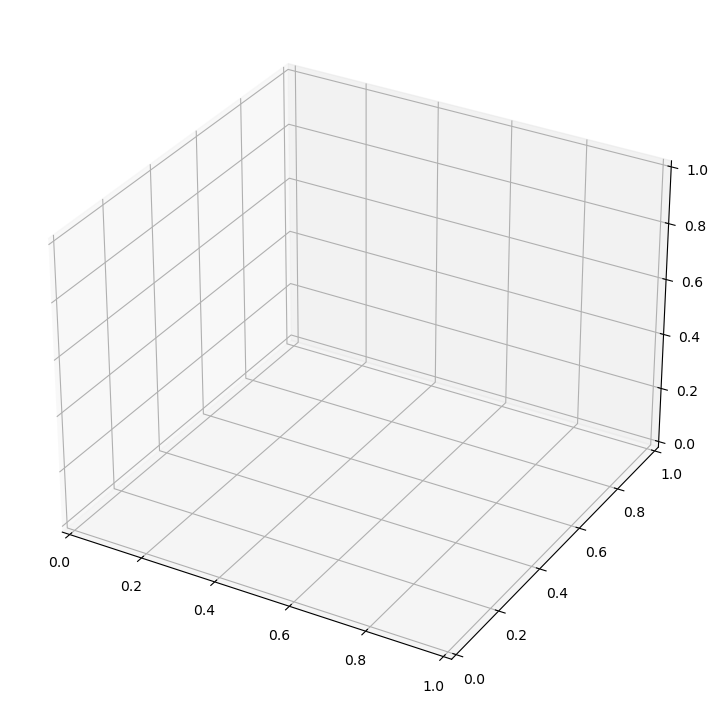

In [12]:
# Creating 3D figure:
fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 

# Creating color map 
my_cmap = plt.get_cmap('hot') 

# Creating plot 
surf = ax.plot_surface(test_in_t_constant_mu[:,0:1].detach().numpy(), test_in_t_constant_mu[:,1:2].detach().numpy(), test_predicted.detach().numpy(), cmap = my_cmap, edgecolor ='none') 

fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 5) 

ax.set_title('Surface plot based on Dataset') 
plt.xlabel("x")
plt.ylabel("t")
#plt.zlabel("u")

# show plot 
plt.show() 

## Initialization weights

In [33]:
import torch
import torch.nn as nn
class LeNet300(nn.Module):
    def __init__(self):
        super(LeNet300, self).__init__()
        
        # Define layers-
        self.fc1 = nn.Linear(in_features = 2, out_features = 8)
        self.fc2 = nn.Linear(in_features = 8, out_features = 8)
        self.output = nn.Linear(in_features = 8, out_features = 1)
        
        self.weights_initialization()
    
    
    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        return self.output(out)
    
    
    def weights_initialization(self):
        '''
        When we define all the modules such as the layers in '__init__()'
        method above, these are all stored in 'self.modules()'.
        We go through each module one by one. This is the entire network,
        basically.
        '''
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.constant_(m.bias, 0)

In [34]:
mask_model = LeNet300()
mask_model

LeNet300(
  (fc1): Linear(in_features=2, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (output): Linear(in_features=8, out_features=1, bias=True)
)

In [41]:
for layer in mask_model.state_dict():
    print(layer)
    #print(torch.ones_like(mask_model.state_dict()[layer].data))
    mask_model.state_dict()[layer].data.fill_(1)

fc1.weight
fc1.bias
fc2.weight
fc2.bias
output.weight
output.bias


In [42]:
mask_model.state_dict()['fc1.weight']

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [35]:
with torch.no_grad():
    for layer in mask_model.state_dict():
        print(layer)
        #print(torch.ones_like(mask_model.state_dict()[layer].data))
        mask_model.state_dict()[layer].data.fill_(1)

fc1.weight
fc1.bias
fc2.weight
fc2.bias
output.weight
output.bias


In [40]:
mask_model.state_dict()['fc1.weight']

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])

In [38]:
mask_model.state_dict()['fc1.bias'].size()

torch.Size([8])

In [26]:
torch.manual_seed(123)

In [28]:
pt_tensor_empty_ex = torch.Tensor(2, 4, 6)
print(pt_tensor_empty_ex)

tensor([[[ 5.7704e-37,  3.0676e-41,  5.2959e-37,  3.0676e-41,  1.1210e-43,
           0.0000e+00],
         [ 1.1210e-43,  0.0000e+00,  6.7856e+16,  3.0680e-41,  1.1771e-43,
           6.8664e-44],
         [ 7.0065e-44,  8.1275e-44,  7.4269e-44,  6.8664e-44,  8.1275e-44,
           7.2868e-44],
         [ 7.2868e-44,  6.4460e-44,  7.4269e-44,  7.8473e-44,  7.9874e-44,
           1.2612e-43]],

        [[ 2.2421e-43,  0.0000e+00,  2.4803e-43,  0.0000e+00,  5.2959e-37,
           3.0676e-41],
         [ 5.7704e-37,  3.0676e-41, -6.4320e+37,  3.0674e-41,  2.0000e+00,
           0.0000e+00],
         [ 1.7937e-43,  0.0000e+00,  1.8077e-43,  0.0000e+00,  5.7281e-37,
           3.0676e-41],
         [ 4.3404e-37,  3.0676e-41,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00]]])


In [30]:
pt_tensor_filled_ex = pt_tensor_empty_ex.fill(12345)
print(pt_tensor_filled_ex)

AttributeError: 'Tensor' object has no attribute 'fill'

In [31]:
print(pt_tensor_empty_ex)

tensor([[[12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.]],

        [[12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.],
         [12345., 12345., 12345., 12345., 12345., 12345.]]])


## TUPLE *:

In [44]:
mu_range = (1,10)
solo_test = (*mu_range, 20)
solo_test

(1, 10, 20)

In [46]:
torch.linspace(*solo_test)

tensor([ 1.0000,  1.4737,  1.9474,  2.4211,  2.8947,  3.3684,  3.8421,  4.3158,
         4.7895,  5.2632,  5.7368,  6.2105,  6.6842,  7.1579,  7.6316,  8.1053,
         8.5789,  9.0526,  9.5263, 10.0000])

# Francesco Zuppichini (https://github.com/FrancescoSaverioZuppichini/Pytorch-how-and-when-to-use-Module-Sequential-ModuleList-and-ModuleDict):

In [3]:
import torch
import torch.nn as nn

def conv_block(in_f, out_f, activation='relu', *args, **kwargs):
    activations = nn.ModuleDict([
                ['lrelu', nn.LeakyReLU()],
                ['relu', nn.ReLU()]
    ])
    
    return nn.Sequential(
        nn.Conv2d(in_f, out_f, *args, **kwargs),
        nn.BatchNorm2d(out_f),
        activations[activation]
    )

def dec_block(in_f, out_f):
    return nn.Sequential(
        nn.Linear(in_f, out_f),
        nn.Sigmoid()
    )

class MyEncoder(nn.Module):
    def __init__(self, enc_sizes, *args, **kwargs):
        super().__init__()
        self.conv_blocks = nn.Sequential(*[conv_block(in_f, out_f, kernel_size=3, padding=1, *args, **kwargs) 
                       for in_f, out_f in zip(enc_sizes, enc_sizes[1:])])
        
        def forward(self, x):
            return self.conv_blocks(x)
        
class MyDecoder(nn.Module):
    def __init__(self, dec_sizes, n_classes):
        super().__init__()
        self.dec_blocks = nn.Sequential(*[dec_block(in_f, out_f) 
                       for in_f, out_f in zip(dec_sizes, dec_sizes[1:])])
        self.last = nn.Linear(dec_sizes[-1], n_classes)

    def forward(self, x):
        return self.dec_blocks()
    
    
class MyCNNClassifier(nn.Module):
    def __init__(self, in_c, enc_sizes, dec_sizes,  n_classes, activation='relu', initialization = "Xavier_uniform"):
        super().__init__()

        initialization_type = nn.ModuleDict([
                                        ["Xavier_uniform", nn.init.xavier_uniform_],
                                        ["Xavier_normal", nn.init.xavier_normal_],
                                        ])
        
        self.enc_sizes = [in_c, *enc_sizes]
        self.dec_sizes = [32 * 28 * 28, *dec_sizes]
        self.initialization = initialization
        initialization_type.get(initialization, None)
        print(initialization_type.get(initialization, None))
        
        self.encoder = MyEncoder(self.enc_sizes, activation=activation)
        
        self.decoder = MyDecoder(dec_sizes, n_classes)

        self.weights_and_bias_initialization()        
        
    def forward(self, x):
        x = self.encoder(x)
        
        x = x.flatten(1) # flat
        
        x = self.decoder(x)
        
        return x
    
    def weights_and_bias_initialization(self):
        for module_with_layers in self.modules():
            if isinstance(module_with_layers, nn.Linear):
                self.initialization(module_with_layers.weight)
                #nn.init.xavier_uniform_(module_with_layers.bias)


In [48]:
model = MyCNNClassifier(1, [32,64], [1024, 512], 10, activation='lrelu')
print(model)

MyCNNClassifier(
  (encoder): MyEncoder(
    (conv_blocks): Sequential(
      (0): Sequential(
        (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
      (1): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.01)
      )
    )
  )
  (decoder): MyDecoder(
    (dec_blocks): Sequential(
      (0): Sequential(
        (0): Linear(in_features=1024, out_features=512, bias=True)
        (1): Sigmoid()
      )
    )
    (last): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [51]:
class FCN_init(nn.Module):
    "Defines a fully-connected network"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS, activation = "Tanh", initialization = "Xavier_normal"):
        super().__init__()
        activation_functions = nn.ModuleDict([
                                            ["Tanh", nn.Tanh()],
                                            ["ReLU", nn.ReLU()],
                                            ["LeakyReLU", nn.LeakyReLU()],
                                            ["Sigmoid", nn.Sigmoid()],
                                            ["Softmax", nn.Softmax()],
                                            ])
        initialization_type = nn.ModuleDict([
                                          ["Xavier_normal", nn.init.xavier_normal_()],
                                          ])
        #activation = nn.Tanh
        self.initialization = initialization
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation_functions[activation]])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation_functions[activation]]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
        initialization.get(initialization, None)
        print(initialization_type.get(initialization, None))
        
        self.weights_and_bias_initialization()
                
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

    def weights_and_bias_initialization(self):
        for module_with_layers in self.modules():
            if isinstance(module_with_layers, nn.Linear):
                self.initialization(module_with_layers.weight)
                #nn.init.xavier_uniform_(module_with_layers.weight)
                #nn.init.xavier_uniform_(module_with_layers.bias)
                #nn.init.constant_(module_with_layers.bias, 0)


In [52]:
model_test = FCN_init(2, 1, 8, 4, activation="Tanh", initialization="Xavier")

TypeError: xavier_normal_() missing 1 required positional argument: 'tensor'

In [56]:
class FCN(nn.Module):   # inherent from nn.Module
    "Defines a standard fully-connected network in PyTorch"
    # Initialization of the neural network layers in __init__:
    def __init__(self, input_dim, hidden_dim, output_dim, activation = "Tanh", initialization = "Xavier_normal"):
        super().__init__()       

        # HERE THE DEFINITION OF ACTIVATION FUNCTIONS:
        activation_functions = nn.ModuleDict([
                                            ["Tanh", nn.Tanh()],
                                            ["ReLU", nn.ReLU()],
                                            ["LeakyReLU", nn.LeakyReLU()],
                                            ["Sigmoid", nn.Sigmoid()],
                                            ["Softmax", nn.Softmax()],
                                            ])
        # HERE THE DEFINITION OF INITIALIZATION OPTION:
        initialization_type = nn.ModuleDict([
                                          ["Xavier_normal", nn.init.xavier_normal_()],
                                          ])
        self.initialization = initialization
        
        initialization.get(initialization, None)

        # INPUT Linear function: 
        self.fc_in = nn.Linear(input_dim, hidden_dim)
        
        # INPUT Non-linearity (activation function): 
        self.tangh = nn.Tanh()
        
        # OUTPUT Linear function: 
        self.fc_out = nn.Linear(hidden_dim, output_dim)

        
    def forward(self, input):
        # INPUT Linear function:
        hidden = self.fc_in(input)

        # HIDDEN Non-linearity
        hidden = self.tangh(hidden)

        # OUTPUT Linear function
        output = self.fc_out(hidden)
        
        return output

    def weights_and_bias_initialization(self):
        for module_with_layers in self.modules():
            if isinstance(module_with_layers, nn.Linear):
                self.initialization(module_with_layers.weight)
                #nn.init.xavier_uniform_(module_with_layers.weight)
                #nn.init.xavier_uniform_(module_with_layers.bias)
                #nn.init.constant_(module_with_layers.bias, 0)

In [57]:
model_test = FCN(2, 8, 1, activation="Tanh", initialization="Xavier_normal")

TypeError: xavier_normal_() missing 1 required positional argument: 'tensor'

In [62]:
def weights_and_bias_initialization(model_instance):
        for module_with_layers in model_instance.modules():
            if isinstance(module_with_layers, nn.Linear):
                nn.init.xavier_uniform_(module_with_layers.weight)
                nn.init.xavier_uniform_(module_with_layers.bias)

In [63]:
class FCN_2(nn.Module):   # inherent from nn.Module
    "Defines a standard fully-connected network in PyTorch"
    # Initialization of the neural network layers in __init__:
    def __init__(self, input_dim, hidden_dim, output_dim, activation = "Tanh"):
        super().__init__()       

        # HERE THE DEFINITION OF ACTIVATION FUNCTIONS:
        activation_functions = nn.ModuleDict([
                                            ["Tanh", nn.Tanh()],
                                            ["ReLU", nn.ReLU()],
                                            ["LeakyReLU", nn.LeakyReLU()],
                                            ["Sigmoid", nn.Sigmoid()],
                                            ["Softmax", nn.Softmax()],
                                            ])
        # INPUT Linear function: 
        self.fc_in = nn.Linear(input_dim, hidden_dim)
        
        # INPUT Non-linearity (activation function): 
        self.tangh = nn.Tanh()
        
        # OUTPUT Linear function: 
        self.fc_out = nn.Linear(hidden_dim, output_dim)

        
    def forward(self, input):
        # INPUT Linear function:
        hidden = self.fc_in(input)

        # HIDDEN Non-linearity
        hidden = self.tangh(hidden)

        # OUTPUT Linear function
        output = self.fc_out(hidden)
        
        return output

In [65]:
model = FCN_2(2, 8, 1, activation="Tanh")
with torch.no_grad():
    weights_and_bias_initialization(model)

ValueError: Fan in and fan out can not be computed for tensor with fewer than 2 dimensions

## restos de pasar a GPU 1D oscillator:

In [55]:
pinn_gpu = FCN_init(2,1,64,4, activation= "Tanh")
pinn_gpu.to(device)

FCN_init(
  (fcs): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
  )
  (fch): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
  )
  (fce): Linear(in_features=64, out_features=1, bias=True)
)

In [55]:
pinn_gpu = FCN_init(2,1,64,4, activation= "Tanh")
pinn_gpu.to(device)

FCN_init(
  (fcs): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
  )
  (fch): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
  )
  (fce): Linear(in_features=64, out_features=1, bias=True)
)

In [66]:
torch.manual_seed(123)

# define a neural network to train
#pinn_gpu = FCN(1,1,32,3) # N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYER
pinn_gpu = FCN_init(2,1,64,4, activation= "Tanh")

pinn_gpu.to(device)

# Define boundary points, for the boundary loss
t_boundary_gpu = torch.tensor(0.).view(-1,1).requires_grad_(True).to(device)
# Define training points over the entire domain, for the physics loss
t_physics_gpu = torch.linspace(0,1,30).view(-1,1).requires_grad_(True).to(device)
# Define temporal points for the test
t_test_gpu = torch.linspace(0,1,300).view(-1,1).to(device)

#Definition of the physical constants and hyperparameters:
d, w0 = 2, 20
mu, k = 2*d, w0**2
learning_rate_gpu =  1e-3         # learning rate
lambda1_gpu, lambda2_gpu = 1e-4, 1e-4 # loss term hyperparameters
epochs_gpu = 20000

# Calculation of the exact solution:
u_exact_gpu = exact_solution(d, w0, t_test_gpu)

# Definition of the optimizer:
optimiser_gpu = torch.optim.Adam(pinn_gpu.parameters(), lr= learning_rate_gpu)

# Creation of the variables loss1_history, loss2_history and loss3_history for printing the evolution of the contribution of every loss term:
loss1_history_gpu = []
loss2_history_gpu = []
loss3_history_gpu = []

# Starting training:
start_gpu = time.time()
for i in range(1, epochs_gpu+1):    
    #clears old gradients from the last step (otherwise you’d just accumulate the gradients from all loss.backward() calls).
    optimiser_gpu.zero_grad() 

    # compute boundary loss
    u_boundary_gpu = pinn_gpu(t_boundary_gpu)
    loss1_gpu = (torch.squeeze(u_boundary_gpu) - 1)**2
    loss1_history_gpu.append(loss1_gpu.item())

    dudt_gpu = torch.autograd.grad(u_boundary_gpu, t_boundary_gpu, torch.ones_like(u_boundary_gpu), create_graph=True)[0]
    loss2_gpu = (torch.squeeze(dudt_gpu) - 0)**2
    loss2_history_gpu.append(loss2_gpu.item())

    # compute physics loss
    u_physics_gpu = pinn_gpu(t_physics_gpu)
    dudt_gpu = torch.autograd.grad(u_physics_gpu, t_physics_gpu, torch.ones_like(u_physics_gpu), create_graph=True)[0]
    d2udt2_gpu = torch.autograd.grad(dudt_gpu, t_physics_gpu, torch.ones_like(dudt_gpu), create_graph=True)[0]
    loss3_gpu = torch.mean((d2udt2_gpu + mu*dudt_gpu + k*u_physics_gpu)**2)
    loss3_history_gpu.append(loss3_gpu.item())

    # backpropagate joint loss, take optimiser step
    loss_gpu = loss1_gpu + lambda1_gpu*loss2_gpu + lambda2_gpu*loss3_gpu
    loss_gpu.backward() 
    optimiser_gpu.step()    
    
    # plot the result as training progresses
    if i % 1000 == 0: 
        #print(u_physics.abs().mean().item(), dudt.abs().mean().item(), d2udt2.abs().mean().item())
        print(f'Decomposition of the loss terms: \n loss({loss_gpu}) = loss1({loss1_gpu}) + {lambda1_gpu} * loss2({loss2_gpu}) + {lambda2_gpu} * loss3({loss3_gpu})')
        u_test_gpu = pinn_gpu(t_test_gpu).detach().cpu()
        plt.figure(figsize=(10,2.5))
        plt.scatter(t_physics_gpu.detach().cpu()[:,0], 
                    torch.zeros_like(t_physics_gpu).cpu()[:,0], s=20, lw=0, color="tab:green", alpha=0.6)
        plt.scatter(t_boundary_gpu.detach().cpu()[:,0], 
                    torch.zeros_like(t_boundary_gpu).cpu()[:,0], s=20, lw=0, color="tab:red", alpha=0.6)
        plt.plot(t_test_gpu.cpu()[:,0], u_exact_gpu.cpu()[:,0], label="Exact solution", color="tab:grey", alpha=0.6)
        plt.plot(t_test_gpu.cpu()[:,0], u_test_gpu.cpu()[:,0], label="PINN solution", color="tab:green")
        plt.scatter(
                   t_physics_gpu.detach().cpu()[:,0].detach().numpy(), 
                    torch.zeros_like(t_physics_gpu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.xlabel("t")
        plt.ylabel("displacements")
        plt.title(f"Training step {i}")
        plt.legend()
        plt.grid()
        plt.show()
        torch.save({
                    "epoch": i,
                    "model_state_dict": pinn_gpu.state_dict(),
                    "optimizer_state_dict": optimiser_gpu.state_dict(),
                    "loss": loss_gpu,
                   },                    
                    f"{learning_rate_gpu}_{i}.pth")
        print(f"Saved the checkpoint corresponding to epoch: {i}")
end_gpu = time.time()
execution_time_gpu = (end_gpu - start_gpu)
print(f"Training elapsed time using 1 GPU (s): {execution_time_gpu}")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x1 and 2x64)

### Load the checkpoint:

In [49]:
pinn_gpu = FCN(1,1,32,3) # N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYER
pinn_gpu.to(device)
optimiser_gpu = torch.optim.Adam(pinn_gpu.parameters(), lr= learning_rate_gpu)

In [50]:
checkpoint = torch.load(f"{learning_rate_gpu}_{i}.pth")
pinn_gpu.load_state_dict(checkpoint["model_state_dict"])
optimiser_gpu.load_state_dict(checkpoint["optimizer_state_dict"])
epochs_gpu = checkpoint["epoch"]
loss_gpu = checkpoint["loss"]

In [51]:
checkpoint["epoch"]

2000

### Continue training:

In [ ]:
# pinn_gpu.train() TESTTTTTT

In [ ]:
epochs_delta = 2000 + epochs_gpu

In [ ]:
for i in range(epochs_gpu, epochs_delta+1):    
    #clears old gradients from the last step (otherwise you’d just accumulate the gradients from all loss.backward() calls).
    optimiser_gpu.zero_grad() 

    # compute boundary loss
    u_boundary_gpu = pinn_gpu(t_boundary_gpu)
    loss1_gpu = (torch.squeeze(u_boundary_gpu) - 1)**2
    loss1_history_gpu.append(loss1_gpu.item())

    dudt_gpu = torch.autograd.grad(u_boundary_gpu, t_boundary_gpu, torch.ones_like(u_boundary_gpu), create_graph=True)[0]
    loss2_gpu = (torch.squeeze(dudt_gpu) - 0)**2
    loss2_history_gpu.append(loss2_gpu.item())

    # compute physics loss
    u_physics_gpu = pinn_gpu(t_physics_gpu)
    dudt_gpu = torch.autograd.grad(u_physics_gpu, t_physics_gpu, torch.ones_like(u_physics_gpu), create_graph=True)[0]
    d2udt2_gpu = torch.autograd.grad(dudt_gpu, t_physics_gpu, torch.ones_like(dudt_gpu), create_graph=True)[0]
    loss3_gpu = torch.mean((d2udt2_gpu + mu*dudt_gpu + k*u_physics_gpu)**2)
    loss3_history_gpu.append(loss3_gpu.item())

    # backpropagate joint loss, take optimiser step
    loss_gpu = loss1_gpu + lambda1_gpu*loss2_gpu + lambda2_gpu*loss3_gpu
    loss_gpu.backward() 
    optimiser_gpu.step()    
    
    # plot the result as training progresses
    if i % 1000 == 0: 
        #print(u_physics.abs().mean().item(), dudt.abs().mean().item(), d2udt2.abs().mean().item())
        print(f'Decomposition of the loss terms: \n loss({loss_gpu}) = loss1({loss1_gpu}) + {lambda1_gpu} * loss2({loss2_gpu}) + {lambda2_gpu} * loss3({loss3_gpu})')
        u_test_gpu = pinn_gpu(t_test_gpu).detach().cpu()
        plt.figure(figsize=(10,2.5))
        plt.scatter(t_physics_gpu.detach().cpu()[:,0], 
                    torch.zeros_like(t_physics_gpu).cpu()[:,0], s=20, lw=0, color="tab:green", alpha=0.6)
        plt.scatter(t_boundary_gpu.detach().cpu()[:,0], 
                    torch.zeros_like(t_boundary_gpu).cpu()[:,0], s=20, lw=0, color="tab:red", alpha=0.6)
        plt.plot(t_test_gpu.cpu()[:,0], u_exact_gpu.cpu()[:,0], label="Exact solution", color="tab:grey", alpha=0.6)
        plt.plot(t_test_gpu.cpu()[:,0], u_test_gpu.cpu()[:,0], label="PINN solution", color="tab:green")
        plt.xlabel("t")
        plt.ylabel("displacements")
        plt.title(f"Training step {i}")
        plt.legend()
        plt.show()
        torch.save({
                    "epoch": i,
                    "model_state_dict": pinn_gpu.state_dict(),
                    "optimizer_state_dict": optimiser_gpu.state_dict(),
                    "loss": loss_gpu,
                   },                    
                    f"{learning_rate_gpu}_{i}.pth")
        print(f"Saved the checkpoint corresponding to epoch: {i}")

In [ ]:
pinn_gpu.state_dict()

De PINN_1D_oscillator_Luis

In [ ]:
torch.manual_seed(123)

# define a neural network to train
#pinn_gpu = FCN(1,1,32,3) # N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYER
pinn_gpu = FCN_init(2,1,64,4, activation= "Tanh")

pinn_gpu.to(device)

# Define boundary points, for the boundary loss
t_boundary_gpu = torch.tensor(0.).view(-1,1).requires_grad_(True).to(device)
# Define training points over the entire domain, for the physics loss
t_physics_gpu = torch.linspace(0,1,30).view(-1,1).requires_grad_(True).to(device)
# Define temporal points for the test
t_test_gpu = torch.linspace(0,1,300).view(-1,1).to(device)

#Definition of the physical constants and hyperparameters:
d, w0 = 2, 20
mu, k = 2*d, w0**2
learning_rate_gpu =  1e-3         # learning rate
lambda1_gpu, lambda2_gpu = 1e-4, 1e-4 # loss term hyperparameters
epochs_gpu = 20000

# Calculation of the exact solution:
u_exact_gpu = exact_solution(d, w0, t_test_gpu)

# Definition of the optimizer:
optimiser_gpu = torch.optim.Adam(pinn_gpu.parameters(), lr= learning_rate_gpu)

# Creation of the variables loss1_history, loss2_history and loss3_history for printing the evolution of the contribution of every loss term:
loss1_history_gpu = []
loss2_history_gpu = []
loss3_history_gpu = []

# Starting training:
start_gpu = time.time()
for i in range(1, epochs_gpu+1):    
    #clears old gradients from the last step (otherwise you’d just accumulate the gradients from all loss.backward() calls).
    optimiser_gpu.zero_grad() 

    # compute boundary loss
    u_boundary_gpu = pinn_gpu(t_boundary_gpu)
    loss1_gpu = (torch.squeeze(u_boundary_gpu) - 1)**2
    loss1_history_gpu.append(loss1_gpu.item())

    dudt_gpu = torch.autograd.grad(u_boundary_gpu, t_boundary_gpu, torch.ones_like(u_boundary_gpu), create_graph=True)[0]
    loss2_gpu = (torch.squeeze(dudt_gpu) - 0)**2
    loss2_history_gpu.append(loss2_gpu.item())

    # compute physics loss
    u_physics_gpu = pinn_gpu(t_physics_gpu)
    dudt_gpu = torch.autograd.grad(u_physics_gpu, t_physics_gpu, torch.ones_like(u_physics_gpu), create_graph=True)[0]
    d2udt2_gpu = torch.autograd.grad(dudt_gpu, t_physics_gpu, torch.ones_like(dudt_gpu), create_graph=True)[0]
    loss3_gpu = torch.mean((d2udt2_gpu + mu*dudt_gpu + k*u_physics_gpu)**2)
    loss3_history_gpu.append(loss3_gpu.item())

    # backpropagate joint loss, take optimiser step
    loss_gpu = loss1_gpu + lambda1_gpu*loss2_gpu + lambda2_gpu*loss3_gpu
    loss_gpu.backward() 
    optimiser_gpu.step()    
    
    # plot the result as training progresses
    if i % 1000 == 0: 
        #print(u_physics.abs().mean().item(), dudt.abs().mean().item(), d2udt2.abs().mean().item())
        print(f'Decomposition of the loss terms: \n loss({loss_gpu}) = loss1({loss1_gpu}) + {lambda1_gpu} * loss2({loss2_gpu}) + {lambda2_gpu} * loss3({loss3_gpu})')
        u_test_gpu = pinn_gpu(t_test_gpu).detach().cpu()
        plt.figure(figsize=(10,2.5))
        plt.scatter(t_physics_gpu.detach().cpu()[:,0], 
                    torch.zeros_like(t_physics_gpu).cpu()[:,0], s=20, lw=0, color="tab:green", alpha=0.6)
        plt.scatter(t_boundary_gpu.detach().cpu()[:,0], 
                    torch.zeros_like(t_boundary_gpu).cpu()[:,0], s=20, lw=0, color="tab:red", alpha=0.6)
        plt.plot(t_test_gpu.cpu()[:,0], u_exact_gpu.cpu()[:,0], label="Exact solution", color="tab:grey", alpha=0.6)
        plt.plot(t_test_gpu.cpu()[:,0], u_test_gpu.cpu()[:,0], label="PINN solution", color="tab:green")
        plt.scatter(
                   t_physics_gpu.detach().cpu()[:,0].detach().numpy(), 
                    torch.zeros_like(t_physics_gpu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:red",
                    alpha=0.6,
                    label= "Training points"
        )
        plt.scatter(
                    test_in_t_mu[0], 
                    torch.zeros_like(test_in_t_mu[0]), 
                    s=20, 
                    lw=0, 
                    color="tab:green",
                    alpha=0.6,
                    label= "Seed points(testing)"
        )
        plt.title(f"Exact and predicted solution \n u(t=(0,1), $\mu$ = {test_mu}), epoch = {i} \n (learning rate: {learning_rate}, lambda1: {lambda1}, lambda2: {lambda2})")
        plt.xlabel("t")
        plt.ylabel("displacements")
        plt.title(f"Training step {i}")
        plt.legend()
        plt.grid()
        plt.show()
        torch.save({
                    "epoch": i,
                    "model_state_dict": pinn_gpu.state_dict(),
                    "optimizer_state_dict": optimiser_gpu.state_dict(),
                    "loss": loss_gpu,
                   },                    
                    f"{learning_rate_gpu}_{i}.pth")
        print(f"Saved the checkpoint corresponding to epoch: {i}")
end_gpu = time.time()
execution_time_gpu = (end_gpu - start_gpu)
print(f"Training elapsed time using 1 GPU (s): {execution_time_gpu}")


# Plot contour (level) curves in 3D

This is like a contour plot in 2D except that the ``f(x, y)=c`` curve is
plotted on the plane ``z=c``.


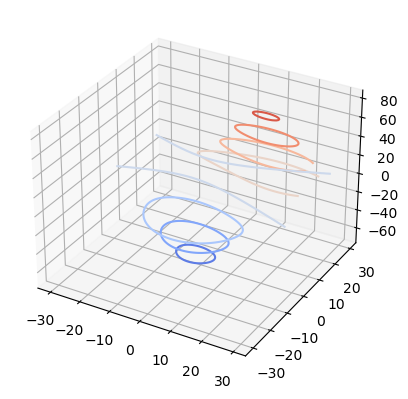

In [1]:
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
#%matplotlib widget

ax = plt.figure().add_subplot(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

ax.contour(X, Y, Z, cmap=cm.coolwarm)  # Plot contour curves

plt.show()

# From Tests_chatgpt.ipynb

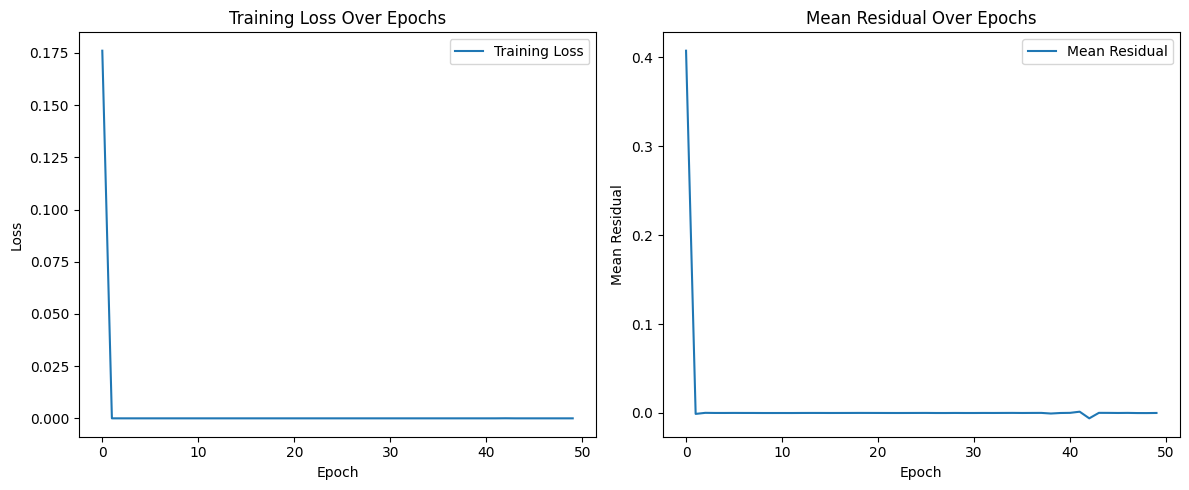

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network architecture
class DampedOscillatorPINN(nn.Module):
    def __init__(self):
        super(DampedOscillatorPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, t):
        return self.net(t)

# Modified function to compute both loss and residuals
def compute_loss_and_residuals(model, t, omega_0, zeta):
    t.requires_grad = True
    x = model(t)
    dx_dt = torch.autograd.grad(x, t, torch.ones_like(x), create_graph=True)[0]
    d2x_dt2 = torch.autograd.grad(dx_dt, t, torch.ones_like(dx_dt), create_graph=True)[0]
    residuals = d2x_dt2 + 2*zeta*omega_0*dx_dt + omega_0**2*x
    loss = torch.mean(residuals**2)
    return loss, residuals

# Model, optimizer, and training loop setup
model = DampedOscillatorPINN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
omega_0 = 1.0  # Natural frequency
zeta = 0.1    # Damping ratio

# Initialization
losses = []
epoch_residuals = []

# Adjusted training loop
for epoch in range(5000):
    t = torch.rand(100, 1) * 10  # Generate random time points
    loss, residuals = compute_loss_and_residuals(model, t, omega_0, zeta)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:  # Adjust based on your preference for data collection frequency
        losses.append(loss.item())
        epoch_residuals.append(residuals.mean().item())  # Example: storing mean residual

# After training, plot the collected data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch_residuals, label='Mean Residual')
plt.xlabel('Epoch')
plt.ylabel('Mean Residual')
plt.title('Mean Residual Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


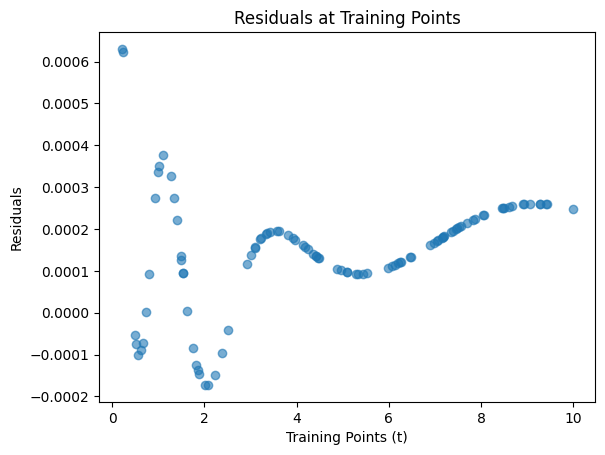

In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network architecture
class DampedOscillatorPINN(nn.Module):
    def __init__(self):
        super(DampedOscillatorPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 50),
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, t):
        return self.net(t)

# Modified function to compute both loss and residuals
def compute_loss_and_residuals(model, t, omega_0, zeta):
    t.requires_grad = True
    x = model(t)
    dx_dt = torch.autograd.grad(x, t, torch.ones_like(x), create_graph=True)[0]
    d2x_dt2 = torch.autograd.grad(dx_dt, t, torch.ones_like(dx_dt), create_graph=True)[0]
    residuals = d2x_dt2 + 2*zeta*omega_0*dx_dt + omega_0**2*x
    loss = torch.mean(residuals**2)
    return loss, residuals

# Model, optimizer, and training loop setup
model = DampedOscillatorPINN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
omega_0 = 1.0  # Natural frequency
zeta = 0.1    # Damping ratio


# Initialization for residuals collection
all_residuals = []
selected_epoch = 5000  # Example: Collecting residuals at the last epoch

for epoch in range(selected_epoch):
    t = torch.rand(100, 1) * 10  # Generate random time points within the domain
    optimizer.zero_grad()
    loss, residuals = compute_loss_and_residuals(model, t, omega_0, zeta)
    loss.backward()
    optimizer.step()
    
    if epoch == selected_epoch - 1:  # Collect residuals at the specified epoch
        all_residuals.append(residuals.detach().numpy())

# After training, plot the collected residuals for the specified epoch
# Assuming `t` still holds the training points used in the last epoch
plt.scatter(t.detach().numpy(), all_residuals[0], alpha=0.6)
plt.xlabel('Training Points (t)')
plt.ylabel('Residuals')
plt.title('Residuals at Training Points')
plt.show()



In [ ]:
all_residuals[0]

In [ ]:
# Assuming the rest of the model setup is as before

# Initialization for residuals collection
all_residuals = []
selected_epoch = 5000  # Example: Collecting residuals at the last epoch

for epoch in range(selected_epoch):
    t = torch.rand(100, 1) * 10  # Generate random time points within the domain
    optimizer.zero_grad()
    loss, residuals = compute_loss_and_residuals(model, t, omega_0, zeta)
    loss.backward()
    optimizer.step()
    
    if epoch == selected_epoch - 1:  # Collect residuals at the specified epoch
        all_residuals.append(residuals.detach().numpy())

# After training, plot the collected residuals for the specified epoch
# Assuming `t` still holds the training points used in the last epoch
plt.scatter(t.detach().numpy(), all_residuals[0], alpha=0.6)
plt.xlabel('Training Points (t)')
plt.ylabel('Residuals')
plt.title('Residuals at Training Points')
plt.show()


## t and zeta as inputs to our model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the neural network architecture
class DampedOscillatorPINN(nn.Module):
    def __init__(self):
        super(DampedOscillatorPINN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 50),  # Adjusted to accept 2-dimensional input
            nn.Tanh(),
            nn.Linear(50, 50),
            nn.Tanh(),
            nn.Linear(50, 1)
        )

    def forward(self, t, zeta):
        # Concatenate t and zeta to form a 2D input
        input = torch.cat((t, zeta), dim=1)
        return self.net(input)

def compute_loss_and_residuals(model, t, zeta, omega_0):
    t.requires_grad = True
    x = model(t, zeta)  # Assuming the model is adapted to accept zeta as well
    dx_dt = torch.autograd.grad(x, t, torch.ones_like(x), create_graph=True)[0]
    d2x_dt2 = torch.autograd.grad(dx_dt, t, torch.ones_like(dx_dt), create_graph=True)[0]
    
    # Use the zeta values in the differential equation
    residuals = d2x_dt2 + 2 * zeta * omega_0 * dx_dt + omega_0**2 * x
    
    # Compute the loss as the mean squared residuals
    loss = torch.mean(residuals**2)
    return loss, residuals



# Example: Generate a grid of t and zeta values
t_values = np.linspace(0, 10, 100)  # Time range
zeta_values = np.linspace(0.1, 10, 100)  # Damping ratio range
T, Zeta = np.meshgrid(t_values, zeta_values)
T_flat = T.flatten()
Zeta_flat = Zeta.flatten()
# Parameters
omega_0 = 1.0  # Natural frequency

all_residuals = []
# Model, Optimizer, and Training
model = DampedOscillatorPINN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

selected_epoch = 5000  # Example: Collecting residuals at the last epoch

for epoch in range(selected_epoch):
    t = torch.rand(100, 1) * 10  # Generate random time points within the domain
    optimizer.zero_grad()
    loss, residuals = compute_loss_and_residuals(model, t, zeta, omega_0)
    loss.backward()
    optimizer.step()
    
    if epoch == selected_epoch - 1:  # Collect residuals at the specified epoch
        all_residuals.append(residuals.detach().numpy())




# Assuming compute_loss_and_residuals is modified to accept zeta values
# Compute residuals for each (t, zeta) pair (this is a placeholder for actual computation)
# For demonstration, let's assume we obtain residuals like this:
# Residuals = np.random.rand(T_flat.shape[0])  # Placeholder for actual residuals computation

# Visualization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(T_flat, Zeta_flat, all_residuals, alpha=0.6)
ax.set_xlabel('Time (t)')
ax.set_ylabel('Damping Ratio (zeta)')
ax.set_zlabel('Residuals')
plt.title('Residuals in the (t, zeta) Space')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Define the neural network architecture
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = torch.sin(self.fc1(x))
        out = torch.sin(self.fc2(out))
        out = self.fc3(out)
        return out

# Define the function for solving the damped harmonic oscillator equation
def damped_harmonic_oscillator(x, t, u):
    gamma = 0.1  # damping coefficient
    k = 1.0      # spring constant
    m = 1.0      # mass
    return -gamma * u - (k/m) * x

# Define the loss function
def loss_fn(pde_loss, boundary_loss):
    return pde_loss.mean() + boundary_loss.mean()

# Function to compute the PDE loss
def compute_pde_loss(model, x_pde, t_pde):
    x_pde.requires_grad = True
    t_pde.requires_grad = True

    u_pred = model(torch.cat((x_pde, t_pde), dim=1))
    x_grad = torch.autograd.grad(u_pred.sum(), x_pde, create_graph=True)[0]
    t_grad = torch.autograd.grad(u_pred.sum(), t_pde, create_graph=True)[0]

    u_t = t_grad[:, 0]
    u_xx = torch.autograd.grad(x_grad[:, 0], x_pde, create_graph=True)[0][:, 0]

    pde_loss = u_t - damped_harmonic_oscillator(x_pde, t_pde, u_pred) - u_xx
    
    return pde_loss

# Function to compute the boundary loss
def compute_boundary_loss(model, x_lb, x_ub, t_lb, t_ub):
    u_lb = model(torch.cat((x_lb, t_lb), dim=1))
    u_ub = model(torch.cat((x_ub, t_ub), dim=1))

    boundary_loss = (u_lb - 0)**2 + (u_ub - 0)**2  # Natural boundary condition
    
    return boundary_loss


# Training function
def train(model, x_pde, t_pde, x_lb, x_ub, t_lb, t_ub, num_epochs=10000, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []

    for epoch in range(num_epochs):
        optimizer.zero_grad()

        pde_loss = compute_pde_loss(model, x_pde, t_pde)
        boundary_loss = compute_boundary_loss(model, x_lb, x_ub, t_lb, t_ub)

        loss = loss_fn(pde_loss, boundary_loss)
        
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if epoch % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Total Loss: {loss.item()}')

    return losses

# Training data
x_pde = torch.tensor(np.random.uniform(-1, 1, (1000, 1)), dtype=torch.float32, requires_grad=True)
t_pde = torch.tensor(np.random.uniform(0, 2, (1000, 1)), dtype=torch.float32, requires_grad=True)

x_lb = torch.tensor([[-1.0], [1.0]], dtype=torch.float32, requires_grad=True)
x_ub = torch.tensor([[-1.0], [1.0]], dtype=torch.float32, requires_grad=True)
t_lb = torch.tensor([[0.0], [0.0]], dtype=torch.float32, requires_grad=True)
t_ub = torch.tensor([[2.0], [2.0]], dtype=torch.float32, requires_grad=True)

# Model, Loss, and Training
model = NeuralNet(input_size=2, hidden_size=50, output_size=1)
losses = train(model, x_pde, t_pde, x_lb, x_ub, t_lb, t_ub)

# Plot the loss
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Assuming you have the weights and biases for the original network
# Replace these with your actual values
original_weights = {
    'hidden_layer1': torch.randn(8, 2),
    'hidden_layer2': torch.randn(8, 8),
    'output_layer': torch.randn(1, 8),
}

original_biases = {
    'hidden_layer1': torch.randn(8),
    'hidden_layer2': torch.randn(8),
    'output_layer': torch.randn(1),
}

# Define the architecture of the new network
new_input_size = 2
new_hidden_layers = [8, 8]
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights and biases from the original model
new_model.input_layer.weight.data = torch.transpose(original_weights['hidden_layer1'], 0, 1)
new_model.input_layer.bias.data = original_biases['hidden_layer1']

for i, layer in enumerate(new_model.hidden_layers):
    layer.weight.data = torch.transpose(original_weights[f'hidden_layer{i+2}'], 0, 1)
    layer.bias.data = original_biases[f'hidden_layer{i+2}']

new_model.output_layer.weight.data = torch.transpose(original_weights['output_layer'], 0, 1)
new_model.output_layer.bias.data = original_biases['output_layer']

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_weights.items():
    new_weight = getattr(new_model, layer_name).weight.data
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_biases.items():
    new_bias = getattr(new_model, layer_name).bias.data
    visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_weights(ax, weights, title):
    im = ax.imshow(weights, cmap='coolwarm', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
layer_sizes = [2, 4, 8, 4, 1]

# Initialize random weights
np.random.seed(42)
weights = [np.random.randn(layer_sizes[i], layer_sizes[i+1]) for i in range(len(layer_sizes)-1)]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(layer_sizes)-1, figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='horizontal')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights from the model
state_dict = model.state_dict()

# Extract weights from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()

In [ ]:
weights

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='black', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights from the model
state_dict = model.state_dict()

# Extract weights from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Weights Layer {i+1}')

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='horizontal')

# Show the plots
plt.show()


In [ ]:
type(weights)

In [ ]:
weights.shape

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}')

    # Show the colorbars
    #fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])  # Note the extra square brackets

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title, labels):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers and labels to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}\n{labels[i, j]}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create labels to indicate weights or biases
labels = np.array([['Weight' if 'weight' in key else 'Bias' for key in state_dict.keys()]])

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}', labels)

    # Show the colorbars
    fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()


In [ ]:
state_dict

In [ ]:
labels

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

# Define the architecture of the original network
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1

# Create the original model with Xavier initialization
class OriginalModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(OriginalModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        init.xavier_uniform_(self.input_layer.weight.data, gain=nn.init.calculate_gain('relu'))
        init.zeros_(self.input_layer.bias.data)
        
        # Hidden layers with Xavier initialization
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        for layer in self.hidden_layers:
            init.xavier_uniform_(layer.weight.data, gain=nn.init.calculate_gain('relu'))
            init.zeros_(layer.bias.data)
        
        # Output layer with Xavier initialization
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)
        init.xavier_uniform_(self.output_layer.weight.data, gain=nn.init.calculate_gain('linear'))
        init.zeros_(self.output_layer.bias.data)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the original model
original_model = OriginalModel(original_input_size, original_hidden_layers, original_output_size)

# Define the architecture of the new network with increased neurons
new_input_size = 2
new_hidden_layers = [16, 16]  # Increase the number of neurons
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights from the original model using He initialization
def initialize_weights_he(model):
    for layer in model.modules():
        if isinstance(layer, nn.Linear):
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

# Initialize weights of the new model using He initialization
initialize_weights_he(new_model)

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_model.state_dict().items():
    new_weight = new_model.state_dict()[layer_name]
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_model.state_dict().items():
    if 'bias' in layer_name:
        new_bias = new_model.state_dict()[layer_name]
        visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')


# ADAPTIVE SCHEME II

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the original model
class OriginalModel(nn.Module):
    def __init__(self):
        super(OriginalModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x

# Train and save the original model
original_model = OriginalModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(original_model.parameters(), lr=0.01)

# Dummy data for training
input_data = torch.rand((100, 2))
target_data = torch.rand((100, 1))

original_weights = []  # List to store original model weights

for epoch in range(100):
    optimizer.zero_grad()
    output = original_model(input_data)
    loss = criterion(output, target_data)
    loss.backward()
    optimizer.step()

    # Store the weights for visualization
    original_weights.append(original_model.fc1.weight.data.numpy().flatten())

# Save the weights and biases
torch.save(original_model.state_dict(), 'original_model.pth')

# Define the new model with an additional hidden layer
class NewModel(nn.Module):
    def __init__(self):
        super(NewModel, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 4)
        self.new_layer = nn.Linear(4, 4)  # Additional hidden layer
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.new_layer(x))
        x = self.output(x)
        return x

# Initialize the new model with the weights and biases of the original model
new_model = NewModel()
new_model.load_state_dict(torch.load('original_model.pth'))

# Check the weights of the new model
new_weights = []
for epoch in range(10):  # Only for visualization, you can further train as needed
    # Store the weights for visualization
    new_weights.append(new_model.fc1.weight.data.numpy().flatten())

# Plotting the weights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(original_weights)
plt.title('Original Model Weights')
plt.xlabel('Epoch')
plt.ylabel('Weight Values')

plt.subplot(1, 2, 2)
plt.plot(new_weights)
plt.title('New Model Weights (Initialized from Original)')
plt.xlabel('Epoch')
plt.ylabel('Weight Values')

plt.tight_layout()
plt.show()


# Initialization and activation function

In [ ]:
import torch.nn as nn
import torch.nn.init as init

class FCN(nn.Module):
    def __init__(self, input_size, output_size, hidden_sizes, activation='relu', initialization='xavier'):
        super(FCN, self).__init__()

        # Define input and output layers
        self.input_layer = nn.Linear(input_size, hidden_sizes[0])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

        # Define hidden layers
        self.hidden_layers = nn.ModuleList([
            nn.Linear(in_size, out_size) for in_size, out_size in zip(hidden_sizes[:-1], hidden_sizes[1:])
        ])

        # Define ModuleDict for activation functions
        self.activations = nn.ModuleDict({
            'relu': nn.ReLU(),
            'tanh': nn.Tanh(),
        })

        # Initialize layers
        self.init_weights(initialization)

        # Set activation function
        if activation not in self.activations:
            raise ValueError("Unsupported activation function")
        self.activation = self.activations[activation]

    def forward(self, x):
        x = self.input_layer(x)

        for hidden_layer in self.hidden_layers:
            x = self.activation(hidden_layer(x))

        x = self.output_layer(x)
        return x

    def init_weights(self, initialization):
        # Initialize input layer
        if initialization == 'xavier':
            init.xavier_uniform_(self.input_layer.weight)
        elif initialization == 'kaiming':
            init.kaiming_uniform_(self.input_layer.weight, nonlinearity='relu')
        elif initialization == 'zeros':
            init.zeros_(self.input_layer.weight)
        else:
            raise ValueError("Unsupported initialization type")

        # Initialize hidden layers
        for hidden_layer in self.hidden_layers:
            if initialization == 'xavier':
                init.xavier_uniform_(hidden_layer.weight)
            elif initialization == 'kaiming':
                init.kaiming_uniform_(hidden_layer.weight, nonlinearity='relu')
            elif initialization == 'zeros':
                init.zeros_(hidden_layer.weight)
            else:
                raise ValueError("Unsupported initialization type")

        # Initialize output layer
        if initialization == 'xavier':
            init.xavier_uniform_(self.output_layer.weight)
        elif initialization == 'kaiming':
            init.kaiming_uniform_(self.output_layer.weight, nonlinearity='relu')
        elif initialization == 'zeros':
            init.zeros_(self.output_layer.weight)
        else:
            raise ValueError("Unsupported initialization type")

# Example usage:
input_size = 10
output_size = 5
hidden_sizes = [20, 30, 15, 10, 25]  # You can specify any number of neurons in each hidden layer

# Create an instance of FCN with ReLU activation and Xavier initialization
model = FCN(input_size, output_size, hidden_sizes, activation='relu', initialization='xavier')

# Check the model architecture
print(model)


## Visualization of the weights and biases

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Extract weights and biases from state_dict
weights = [state_dict[key].numpy() for key in state_dict.keys()]

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights), figsize=(15, 5))

# Plot the weights and biases for each layer using a for-loop
for i, ax in enumerate(axes):
    im = plot_weights(ax, weights[i], f'Layer {i+1}')

    # Show the colorbars
    #fig.colorbar(im, ax=ax, orientation='vertical')

# Show the plots
plt.show()

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)

    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Filter out keys containing "bias"
weights_dict = {key: value for key, value in state_dict.items() if 'bias' not in key}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_dict), figsize=(15, 5))

# Plot the weights for each layer using a for-loop
for i, (key, weights) in enumerate(weights_dict.items()):
    im = plot_weights(axes[i], weights.numpy(), f'{key}')

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Combine both dictionaries for weights and biases into a single dictionary
weights_biases_dict = {key: value for key, value in state_dict.items()}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_biases_dict), figsize=(15, 5))

# Plot the weights and biases for each layer
for i, (key, data) in enumerate(weights_biases_dict.items()):
    if 'bias' in key:
        im = plot_weights(axes[i], data.numpy().reshape(-1, 1), f'{key} (Biases)')
    elif 'weight' in key:
        im = plot_weights(axes[i], data.numpy(), f'{key} (Weights)')
# Add a colorbar for all the plots
divider = make_axes_locatable(axes[-3])
cax = divider.append_axes("bottom", size="5%", pad=0.5)
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Value')
# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def plot_weights(ax, weights, title):
    if len(weights.shape) == 1:
        # If the weights are 1D (possibly biases), reshape them to (1, len(weights))
        weights = weights.reshape(1, -1)
    im = ax.imshow(weights, cmap='viridis', interpolation='none')

    # Add numbers to the cells
    for i in range(weights.shape[0]):
        for j in range(weights.shape[1]):
            ax.text(j, i, f'{weights[i, j]:.2f}', color='white', ha='center', va='center')

    ax.set_title(title)
    return im

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Load weights and biases from the model
state_dict = model.state_dict()

# Combine both dictionaries for weights and biases into a single dictionary
weights_biases_dict = {key: value for key, value in state_dict.items()}

# Create a figure for visualization
fig, axes = plt.subplots(1, len(weights_biases_dict), figsize=(15, 5))

# Plot the weights and biases for each layer
max_intensity = 0  # Track the maximum intensity across all plots
for i, (key, data) in enumerate(weights_biases_dict.items()):
    if 'bias' in key:
        im = plot_weights(axes[i], data.numpy().reshape(-1, 1), f'{key} (Biases)')
    elif 'weight' in key:
        im = plot_weights(axes[i], data.numpy(), f'{key} (Weights)')
    
    max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

# Add a colorbar below all the plots
divider = make_axes_locatable(axes[-1])
cax = divider.append_axes("bottom", size="10%", pad=0.5)
cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
cbar.set_label('Value')

# Normalize the color bar based on the maximum intensity across all plots
cbar.set_clim(-max_intensity, max_intensity)

# Show the plots
plt.show()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, hidden_layers, activation='Tanh', initialization='He'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        self.fcs = nn.Sequential(
            nn.Linear(N_INPUT, hidden_layers[0]),
            self.activation
        )

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_layers[i + 1]),
                self.activation
            ) for i in range(len(hidden_layers) - 1)
        ])

        self.fce = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)


    def forward(self, x):
        x = self.fcs(x)
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fce(x)
        return x
    
    def initialize_parameters(self, initialization):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols -1) // num_cols
        #fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))
        fig, axes = plt.subplots(num_rows,
                                 ncols, 
                                 figsize=(5*num_plots, 5)
                                )

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

    def visualize_difference(self, original, new, layer_name):
        plt.figure(figsize=(10, 4))

        # Plot weights
        plt.subplot(1, 2, 1)
        plt.title(f'{layer_name} Weights')
        plt.imshow(original, cmap='viridis')
        plt.colorbar(label='Weight Values')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.subplot(1, 2, 2)
        plt.title(f'Difference in {layer_name} Weights')
        plt.imshow(new - original, cmap='coolwarm')
        plt.colorbar(label='Weight Difference')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.tight_layout()
        plt.show()

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1
original_model = FCN(original_input_size, original_output_size, original_hidden_layers, activation='Tanh', initialization='He')
original_model.plot_weights()



In [ ]:
# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[row, col].set_title(key)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_aspect('auto')  # Set aspect ratio to auto
# Plot data in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.plot(x, y)
        ax.set_title(f"Subplot {i+1}")
    else:
        ax.axis('off')  # Hide extra subplots
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
state_dict = original_model.state_dict()
weights_biases_dict = {key: value for key, value in state_dict.items()}
type(weights_biases_dict['fcs.0.weight'].numpy())

In [ ]:
# Create a figure for visualization
num_plots = len(weights_biases_dict)
#fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))
fig, axes = plt.subplots(nrows = (num_plots +1)//2,
                                 ncols = 2, 
                                 figsize=(5*num_plots, 5)
                                )

In [ ]:

# Step 2: Visualize the weights and biases of the original model
for layer_name, param in original_model.named_parameters():
    original_weight = param.detach().numpy()
    original_model.visualize_difference(original_weight, original_weight, layer_name)

# Step 3: Create the extended model with 16 neurons in hidden layers and ReLU activation
extended_hidden_layers = [16, 16]
extended_model = FCN(original_input_size, original_output_size, extended_hidden_layers, activation='ReLU', initialization='He')

# Step 4: Visualize the weights and biases of the extended model
for layer_name, param in extended_model.named_parameters():
    extended_weight = param.detach().numpy()
    extended_model.visualize_difference(extended_weight, extended_weight, layer_name)

# Step 5: Overwrite the weights and biases of the extended model with the original model
for original_param, extended_param in zip(original_model.parameters(), extended_model.parameters()):
    extended_param.data.copy_(original_param.data)

# Step 6: Visualize the weights and biases of the extended model after overwriting
for layer_name, param in extended_model.named_parameters():
    extended_weight = param.detach().numpy()
    extended_model.visualize_difference(original_weight, extended_weight, layer_name)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        
        num_plots = len(state_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        max_intensity = 0  
        for i, (key, data) in enumerate(state_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            title = f'{key} (Biases)' if 'bias' in key else f'{key} (Weights)'
            
            if len(data.shape) == 1:
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            max_intensity = max(max_intensity, np.max(np.abs(data.numpy()))) 

        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="5%", pad=0.5)
        cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        cbar.set_label('Value')
        cbar.set_clim(-max_intensity, max_intensity)

        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots
fig, axs = plt.subplots(1, num_subplots, figsize=(10, 5))

# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    axs[idx].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[idx].set_title(key)
    axs[idx].axis('off')  # Turn off axis
    axs[idx].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10),
    'tensor3': np.random.rand(10, 10),
    'tensor4': np.random.rand(10, 10),
    'tensor5': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots with 3 rows and 2 columns
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))

# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    row = idx // num_cols
    col = idx % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
    axs[row, col].set_title(key)
    axs[row, col].axis('off')  # Turn off axis
    axs[row, col].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(10, 10),
    'tensor2': np.random.rand(10, 10),
    'tensor3': np.random.rand(10, 10),
    'tensor4': np.random.rand(10, 10),
    'tensor5': np.random.rand(10, 10)
}

# Determine the number of subplots needed
num_subplots = len(tensor_dict)

# Create subplots with 3 rows and 2 columns
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
type(axs)
# Plot each tensor using Matplotlib
for idx, (key, tensor) in enumerate(tensor_dict.items()):
    if idx < num_rows * num_cols:
        row = idx // num_cols
        col = idx % num_cols
        axs[row, col].imshow(tensor, cmap='gray')  # Adjust colormap as needed
        axs[row, col].set_title(key)
        axs[row, col].axis('off')  # Turn off axis
        axs[row, col].set_aspect('auto')  # Set aspect ratio to auto

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
axs

In [ ]:
axs[0][0]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

# Create odd number of subplots
num_subplots = 5
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot data in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.plot(x, y)
        ax.set_title(f"Subplot {i+1}")
    else:
        ax.axis('off')  # Hide extra subplots

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
data = np.random.rand(28, 28, 5)  # Example image data, assuming grayscale images of size 28x28

# Create odd number of subplots
num_subplots = 5
num_cols = 3
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot images in each subplot
for i, ax in enumerate(axs.flat):
    if i < num_subplots:
        ax.imshow(data[:, :, i], cmap='gray')  # Assuming grayscale images
        ax.set_title(f"Subplot {i+1}")
        ax.axis('off')
    else:
        ax.axis('off')  # Hide extra subplots

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(28, 28),
    'tensor2': np.random.rand(28, 28),
    'tensor3': np.random.rand(28, 28),
    'tensor4': np.random.rand(28, 28),
    'tensor5': np.random.rand(28, 28)
}

# Create odd number of subplots
num_subplots = len(tensor_dict)
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 8))

# Plot images in each subplot
for i, (key, tensor) in enumerate(tensor_dict.items()):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].imshow(tensor, cmap='gray')  # Assuming grayscale tensors
    axs[row, col].set_title(key)
    axs[row, col].axis('off')

# Hide extra subplots
for i in range(num_subplots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example dictionary with tensors as values
tensor_dict = {
    'tensor1': np.random.rand(2, 1),
    'tensor2': np.random.rand(1, 4),
    'tensor3': np.random.rand(4, 4),
    'tensor4': np.random.rand(1, 4),
    'tensor5': np.random.rand(1, 1)
}

# Create odd number of subplots
num_subplots = len(tensor_dict)
num_cols = 2
num_rows = (num_subplots + num_cols - 1) // num_cols  # Calculate number of rows needed

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Plot images and add values in each subplot
for i, (key, tensor) in enumerate(tensor_dict.items()):
    row = i // num_cols
    col = i % num_cols
    ax = axs[row, col]
    print("*"*50)
    print(i)
    print(key)
    print(tensor)
    print("*"*10)
    print(f"tensor shape: {tensor.shape}")
    print(tensor.ndim)
    print("Now tensor")
    ax.imshow(tensor, cmap='viridis', interpolation='none')  # Assuming grayscale tensors
    print("printed")
    print("*"*50)
    ax.set_title(key)
    ax.axis('off')

    # Add values in the middle of the cell
    for y in range(tensor.shape[0]):
        for x in range(tensor.shape[1]):
            value = tensor[y, x]
            ax.text(x, y, f'{value:.2f}', fontsize = 8, color='red', ha='center', va='center')

# Hide extra subplots
for i in range(num_subplots, num_rows * num_cols):
    axs.flatten()[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
type(tensor_dict)
print(tensor_dict["tensor1"].shape)

In [ ]:
len(tensor_dict)

In [ ]:
type(tensor_dict["tensor1"])

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 1)
        max_val = round(all_values.max(), 1)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize=(10, 10))
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}')
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}')
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))  
           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        #cbar.set_label('Colorbar Label') Label for the Colorbar
        
        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)
# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        #max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            #max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        #divider = make_axes_locatable(ax)
        #cax = divider.append_axes("bottom", size="5%", pad=0.5)
        #cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        #cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def plot_weights(self):
        state_dict = self.state_dict()
        weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Create a figure for visualization
        num_plots = len(weights_biases_dict)
        fig, axes = plt.subplots(1, num_plots, figsize=(5*num_plots, 5))

        # Plot the weights and biases for each layer
        max_intensity = 0  # Track the maximum intensity across all plots
        for i, (key, data) in enumerate(weights_biases_dict.items()):
            ax = axes[i] if num_plots > 1 else axes
            if 'bias' in key:
                title = f'{key} (Biases)'
            elif 'weight' in key:
                title = f'{key} (Weights)'
                
            if len(data.shape) == 1:
                # If the data is 1D (possibly biases), reshape them to (1, len(data))
                data = data.reshape(1, -1)
                
            im = ax.imshow(data.numpy(), cmap='viridis', interpolation='none')

            # Add numbers to the cells
            for i in range(data.shape[0]):
                for j in range(data.shape[1]):
                    ax.text(j, i, f'{data[i, j]:.2f}', color='white', ha='center', va='center')

            ax.set_title(title)
            max_intensity = max(max_intensity, np.max(np.abs(data.numpy())))  # Update max intensity

        # Add a colorbar below all the plots
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("bottom", size="5%", pad=0.5)
        cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
        cbar.set_label('Value')

        # Normalize the color bar based on the maximum intensity across all plots
        #cbar.set_clim(-max_intensity, max_intensity)

        # Show the plots
        plt.show()

# Define the neural network architecture
input_size = 2
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

# Instantiate the PyTorch model
model = SimpleNN(input_size, hidden_size1, hidden_size2, output_size)

# Call the plot_weights method
model.plot_weights()


In [ ]:
    def visualize_difference(self, original, new, layer_name):
        plt.figure(figsize=(10, 4))

        # Plot weights
        plt.subplot(1, 2, 1)
        plt.title(f'{layer_name} Weights')
        plt.imshow(original, cmap='viridis')
        plt.colorbar(label='Weight Values')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.subplot(1, 2, 2)
        plt.title(f'Difference in {layer_name} Weights')
        plt.imshow(new - original, cmap='coolwarm')
        plt.colorbar(label='Weight Difference')
        plt.xlabel('Neurons in Previous Layer')
        plt.ylabel('Neurons in Current Layer')

        plt.tight_layout()
        plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

# Function to visualize the weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Function to create a model with specified initialization
def create_model(input_size, hidden_layers, output_size, initialization='he'):
    model = nn.Sequential()
    
    # Add input layer
    model.add_module('input_layer', nn.Linear(input_size, hidden_layers[0]))
    if initialization == 'he':
        init.kaiming_uniform_(model.input_layer.weight.data, mode='fan_in', nonlinearity='relu')
        init.zeros_(model.input_layer.bias.data)

    # Add hidden layers
    for i in range(len(hidden_layers) - 1):
        layer = nn.Linear(hidden_layers[i], hidden_layers[i + 1])
        model.add_module(f'hidden_layer{i + 1}', layer)
        if initialization == 'he':
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

    # Add output layer
    model.add_module('output_layer', nn.Linear(hidden_layers[-1], output_size))
    if initialization == 'he':
        init.kaiming_uniform_(model.output_layer.weight.data, mode='fan_in', nonlinearity='linear')
        init.zeros_(model.output_layer.bias.data)

    return model

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1
original_model = create_model(original_input_size, original_hidden_layers, original_output_size, initialization='he')

# Step 2: Visualize the weights and biases of the original model
for layer_name, original_weight in original_model.named_parameters():
    visualize_difference(original_weight.detach().numpy(), original_weight.detach().numpy(), layer_name)

# Step 3: Create the extended model with 16 neurons in hidden layers
extended_input_size = 2
extended_hidden_layers = [16, 16]
extended_output_size = 1
extended_model = create_model(extended_input_size, extended_hidden_layers, extended_output_size, initialization='he')

# Step 4: Visualize the weights and biases of the extended model
for layer_name, extended_weight in extended_model.named_parameters():
    visualize_difference(extended_weight.detach().numpy(), extended_weight.detach().numpy(), layer_name)

# Step 5: Overwrite the weights and biases of the extended model with the original model
for original_param, extended_param in zip(original_model.parameters(), extended_model.parameters()):
    extended_param.data.copy_(original_param.data)

# Step 6: Visualize the weights and biases of the extended model after overwriting
for layer_name, extended_weight in extended_model.named_parameters():
    visualize_difference(original_weight.detach().numpy(), extended_weight.detach().numpy(), layer_name)


In [ ]:
import torch
import torch.nn as nn

# Define a simple fully connected neural network
class MyFCNet(nn.Module):
    def __init__(self):
        super(MyFCNet, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # Example: input size=10, output size=5
        self.fc2 = nn.Linear(4, 1)   # Example: input size=5, output size=2

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Create an instance of the network
model = MyFCNet()

# Get the state_dict of the model
state_dict = model.state_dict()

# Extract weights and biases from the state_dict
for key, value in state_dict.items():
    if 'weight' in key:
        print(f"Layer: {key}, Shape: {value.shape}")
        print("Weights:")
        print(value)
    elif 'bias' in key:
        print(f"Layer: {key}, Shape: {value.shape}")
        print("Biases:")
        print(value)

In [ ]:
import torch

# Example tensor with shape (4,)
tensor = torch.tensor([1, 2, 3, 4])

# Transform the tensor to shape (4, 1)
tensor_reshaped = tensor.unsqueeze(0)

print("Original tensor shape:", tensor.shape)
print("Transformed tensor shape:", tensor_reshaped.shape)

In [ ]:
import torch
import torch.nn as nn

# Define a simple model using nn.Sequential
model = nn.Sequential(
    nn.Linear(10, 5),
    nn.ReLU(),
    nn.Linear(5, 1)
)

# Print the model architecture
print(model)

# Initialize some input data
input_data = torch.randn(3, 10)

# Forward pass through the model
output = model(input_data)

# Print the output
print("Output shape:", output.shape)

In [ ]:
# Inspect the model parameters
for name, param in model.named_parameters():
    print(name, param.shape)

In [ ]:
model.state_dict()

In [ ]:
import torch
import torch.nn as nn

class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()

        self.input_layer = nn.Sequential(
            nn.Linear(input_size, hidden_sizes[0]),
            nn.ReLU()
        )

        self.hidden_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_sizes[i], hidden_size),
                nn.ReLU()
            ) for i, hidden_size in enumerate(hidden_sizes[1:])
        ])

        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

# Example usage
input_size = 2
hidden_sizes = [4, 8, 8, 4]
output_size = 1

model = SimpleModel(input_size, hidden_sizes, output_size)
print(model)


In [ ]:
model.state_dict()

In [ ]:
import torch

# Example weight matrix (2x3) and bias vector (2,)
W = torch.randn(2, 3)
x = torch.randn(3)
b = torch.randn(2)

In [ ]:
W

In [ ]:
x

In [ ]:
b

In [ ]:
# Perform matrix multiplication
result = torch.matmul(W, x)
result

In [ ]:
# Add bias vector element-wise to each row of the result
result_with_bias = result + b



In [ ]:
print("Result with bias:", result_with_bias)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt

In [ ]:
# Define the architecture of the original network
original_input_size = 2
original_hidden_layers = [8, 8]
original_output_size = 1

In [ ]:
# Create the original model with Xavier initialization
class OriginalModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(OriginalModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        init.xavier_uniform_(self.input_layer.weight.data, gain=nn.init.calculate_gain('relu'))
        init.zeros_(self.input_layer.bias.data)
        
        # Hidden layers with Xavier initialization
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        for layer in self.hidden_layers:
            init.xavier_uniform_(layer.weight.data, gain=nn.init.calculate_gain('relu'))
            init.zeros_(layer.bias.data)
        
        # Output layer with Xavier initialization
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)
        init.xavier_uniform_(self.output_layer.weight.data, gain=nn.init.calculate_gain('linear'))
        init.zeros_(self.output_layer.bias.data)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

In [ ]:






# Create an instance of the original model
original_model = OriginalModel(original_input_size, original_hidden_layers, original_output_size)

# Define the architecture of the new network with increased neurons
new_input_size = 2
new_hidden_layers = [16, 16]  # Increase the number of neurons
new_output_size = 1

# Create a new model with the same architecture as the original one
class NewModel(nn.Module):
    def __init__(self, input_size, hidden_layers, output_size):
        super(NewModel, self).__init__()
        
        # Input layer
        self.input_layer = nn.Linear(input_size, hidden_layers[0])
        
        # Hidden layers with weights and biases from the original model
        self.hidden_layers = nn.ModuleList([
            nn.Linear(hidden_layers[i], hidden_layers[i+1]) for i in range(len(hidden_layers)-1)
        ])
        
        # Output layer
        self.output_layer = nn.Linear(hidden_layers[-1], output_size)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Create an instance of the new model
new_model = NewModel(new_input_size, new_hidden_layers, new_output_size)

# Set the weights from the original model using He initialization
def initialize_weights_he(model):
    for layer in model.modules():
        if isinstance(layer, nn.Linear):
            init.kaiming_uniform_(layer.weight.data, mode='fan_in', nonlinearity='relu')
            init.zeros_(layer.bias.data)

# Initialize weights of the new model using He initialization
initialize_weights_he(new_model)

# Visualize the differences in weights and biases
def visualize_difference(original, new, layer_name):
    plt.figure(figsize=(10, 4))
    
    # Plot weights
    plt.subplot(1, 2, 1)
    plt.title(f'{layer_name} Weights')
    plt.imshow(original, cmap='viridis')
    plt.colorbar(label='Weight Values')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.subplot(1, 2, 2)
    plt.title(f'Difference in {layer_name} Weights')
    plt.imshow(new - original, cmap='coolwarm')
    plt.colorbar(label='Weight Difference')
    plt.xlabel('Neurons in Previous Layer')
    plt.ylabel('Neurons in Current Layer')

    plt.tight_layout()
    plt.show()

# Visualize differences for each layer
for layer_name, original_weight in original_model.state_dict().items():
    new_weight = new_model.state_dict()[layer_name]
    visualize_difference(original_weight, new_weight, layer_name)

# Visualize differences for biases
for layer_name, original_bias in original_model.state_dict().items():
    if 'bias' in layer_name:
        new_bias = new_model.state_dict()[layer_name]
        visualize_difference(original_bias.unsqueeze(0), new_bias.unsqueeze(0), layer_name + ' Bias')


In [ ]:
import torch

def find_max_min_values(state_dict):
    max_value = float('-inf')
    min_value = float('inf')

    for key, tensor in state_dict.items():
        if isinstance(tensor, torch.Tensor):
            if tensor.dim() == 0:
                tensor_max = tensor.item()
                tensor_min = tensor.item()
            else:
                tensor_max = torch.max(tensor).item()
                tensor_min = torch.min(tensor).item()
            max_value = max(max_value, tensor_max)
            min_value = min(min_value, tensor_min)

    return max_value, min_value

# Example usage
model = YourModel()  # Instantiate your model
state_dict = model.state_dict()

max_value, min_value = find_max_min_values(state_dict)
print("Max value:", max_value)
print("Min value:", min_value)


# AS II Old versions

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1,  activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        #self.fci = nn.Sequential(
        #    nn.Linear(N_INPUT, hidden_layers[0]),
        #    self.activation
        #)
        self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_layers[i + 1]),
                self.activation
            ) for i in range(len(hidden_layers) - 1)
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)


    def forward(self, x):
        x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x
    
    def initialize_parameters(self, initialization):
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self, figsize = (10,5)):
        self.figsize = figsize
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

# Step 1: Create the original model
original_input_size = 2
original_hidden_layers = [4,4]
original_output_size = 1
original_model = FCN(original_input_size, original_hidden_layers, original_output_size, activation='Tanh', initialization='Xavier')
original_model.plot_weights()



In [ ]:
original_model.state_dict()

## ASII: extended methods added

### BACKUP

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(hidden_layers[i], hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x
        
    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")

    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)
    
        self.original_model_path = original_model_path
        
        self.load_override_original_weights_biases()

    def load_override_original_weights_biases(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        original_state_dict = torch.load(self.original_model_path)['model_state_dict']
        
        # Update extended model state dictionary with original model's parameters
        self.load_state_dict(original_state_dict, strict=False)
        
        # Override weights and biases from original model
        for name, param in self.named_parameters():
            #print(f"name: {name}, param: {param}")
            if name in original_state_dict:
                param.data.copy_(original_state_dict[name].data)

    def extend_hidden_layers(self, num_hidden_layers):
        current_hidden_layers = len(self.fch)
        if current_hidden_layers > num_hidden_layers:
            raise ValueError("Cannot reduce the number of hidden layers.")

        for _ in range(num_hidden_layers - current_hidden_layers):
            new_layer = nn.Sequential(
                nn.Linear(self.hidden_layers[-1], self.hidden_layers[-1]),
                self.activation)

            self.fch.append(new_layer)

    def extend_neurons(self, num_neurons):
        if len(self.fch) == 0:
            raise ValueError("Cannot extend neurons with no hidden layers.")

        for layer in self.fch:
            current_neurons = layer[0].in_features
            if current_neurons < num_neurons:
                new_weights = torch.cat([layer[0].weight.data, torch.randn(num_neurons - current_neurons, current_neurons)], dim=0)
                new_biases = torch.cat([layer[0].bias.data, torch.zeros(num_neurons - current_neurons)], dim=0)
                layer[0].weight.data = new_weights
                layer[0].bias.data = new_biases
            elif current_neurons > num_neurons:
                layer[0].weight.data = layer[0].weight.data[:num_neurons, :]
                layer[0].bias.data = layer[0].bias.data[:num_neurons]

class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


### Updating the FCN_extended

In [ ]:
# BACKUP:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        # self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        # self.fch = nn.ModuleList([
        #     nn.Sequential(
        #         nn.Linear(hidden_layers[i], hidden_size),
        #         self.activation
        #     ) for i, hidden_size in enumerate(hidden_layers[1:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        # ])
        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_sizes[i-1], hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)
    
        self.original_model_path = original_model_path
        self.original_neurons =  self.fch[0]0].in_features # assuming that all hidden layers have the same number of neurons 
        print(f"Original_neurons in __init__: {self.original_neurons}")      
        self.extended_neurons = hidden_layers[-1] # assuming that all hidden layers have the same number of neurons 
        print(f"extended_neurons: {self.extended_neurons}")
        # Check if hidden layers need to be extended
        if len(hidden_layers) < len(self.fch): 
            raise ValueError("The number of hidden layers of the extended model must be larger as the original model")
        elif len(hidden_layers) > len(self.fch):
            #self.extend_hidden_layers(len(hidden_layers))
            self.load_override_original_weights_biases()
        else:
            self.extend_neurons() 
            
    def load_override_original_weights_biases(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        original_state_dict = torch.load(self.original_model_path)['model_state_dict']
        
        # Update extended model state dictionary with original model's parameters
        self.load_state_dict(original_state_dict, strict=False)
        
        # Override weights and biases from original model
        for name, param in self.named_parameters():
            if name in original_state_dict:
                param.data.copy_(original_state_dict[name].data)

    def extend_hidden_layers(self, num_hidden_layers):
        current_hidden_layers = len(self.fch)
        if current_hidden_layers > num_hidden_layers:
            raise ValueError("Cannot reduce the number of hidden layers.")

        for _ in range(num_hidden_layers - current_hidden_layers):
            new_layer = nn.Sequential(
                nn.Linear(self.hidden_layers[-1], self.hidden_layers[-1]),
                self.activation)

            self.fch.append(new_layer)

    def extend_neurons(self):
        if len(self.fch) == 0:
            raise ValueError("Cannot extend neurons with no hidden layers.")

        for layer in self.fch:
            original_neurons = layer[0].weight.size(0)
            print(f"Original_neurons: {original_neurons}")
            print(f"Original neurons in layer {layer[0]} extend_neurons: {original_neurons}")
            # if original_neurons < self.extended_neurons:
            #     # Extend weights using the provided initialization
            #     init_fn = getattr(init, self.initialization)      # getattr( use to access dynamically the attributes or methods of an object based on a string name )
            #     new_weights = init_fn(layer[0].weight.new_empty(self.extended_neurons - original_neurons, original_neurons))
            #     new_biases = init.constant_(layer[0].bias.new_empty(self.extended_neurons - original_neurons), 0)
            #     layer[0].weight.data = torch.cat([layer[0].weight.data, new_weights], dim=0)
            #     layer[0].bias.data = torch.cat([layer[0].bias.data, new_biases], dim=0)
            # else:
            #     raise ValueError("Maintaining or reducing the number of neurons is not allowed")
class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break





## New version

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        # self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        # self.fch = nn.ModuleList([
        #     nn.Sequential(
        #         nn.Linear(hidden_layers[i], hidden_size),
        #         self.activation
        #     ) for i, hidden_size in enumerate(hidden_layers[1:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        # ])
        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_size, hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)
    
        self.original_model_path = original_model_path
        self.original_state_dict = self.load_original_state_dict()
        self.original_state_dict_keys = list(self.original_state_dict.keys()) 
        self.original_hidden_layers_neurons = self.original_state_dict[self.original_state_dict_keys[-4]].size(0)
        self.original_hidden_layers_keys = [key for key in self.original_state_dict_keys if "fch" in key and "weight" in key]
        self.original_hidden_layers_num = len(set([key.split('.')[-1] for key in self.original_hidden_layers_keys]))

        self.extended_neurons = hidden_layers[-1] # assuming that all hidden layers have the same number of neurons
        #print(self.original_state_dict_keys)
        #print(self.original_hidden_layers_keys)
        #print(len(hidden_layers))
        #print(self.original_hidden_layers_num)
        # len(set([key.split('.')[1] for key in hidden_layers_keys]))
        
        # Check if hidden layers need to be extended
        if len(hidden_layers) < self.original_hidden_layers_num: 
            raise ValueError(f"The number of hidden layers of the extended model({len(hidden_layers)}) must be larger as from the original model({self.original_hidden_layers_num})")
        elif len(hidden_layers) > self.original_hidden_layers_num:
            self.extend_hidden_layers()
        else:
            self.extend_neurons() 
            
    def load_original_state_dict(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        return torch.load(self.original_model_path)['model_state_dict']

    def extend_hidden_layers(self):        
        # Update extended model state dictionary with original model's parameters
        self.load_state_dict(self.original_state_dict, strict=False)
        
        # Transfer weights and biases from original model to extended model
        for name, param in self.named_parameters():
            if name in self.original_state_dict:
                param.data.copy_(self.original_state_dict[name].data)

    def extend_hidden_layers_old(self, num_hidden_layers):
        current_hidden_layers = len(self.fch)
        if current_hidden_layers > num_hidden_layers:
            raise ValueError("Cannot reduce the number of hidden layers.")

        for _ in range(num_hidden_layers - current_hidden_layers):
            new_layer = nn.Sequential(
                nn.Linear(self.hidden_layers[-1], self.hidden_layers[-1]),
                self.activation)

            self.fch.append(new_layer)

    def extend_neurons(self):
        if len(self.fch) == 0:
            raise ValueError("Cannot extend neurons with no hidden layers.")

        for ((name, param)) in zip(self.named_parameters(), self.original_state_dict.items()):
            print(f"Current model - {name}: shape {param.shape}")
            print(f"Old model - {name}: shape {param.shape}")
        # for  ((),())layer_extended, layer_original in zip(self.fch, :
        #     #original_neurons = layer[0].weight.size(0)
        #     #print(f"Original_neurons: {original_neurons}")
        #     #print(f"Original neurons in layer {layer[0]} extend_neurons: {original_neurons}")
        #     if self.original_hidden_layers_neurons < self.extended_neurons:
        #         # self.initialize_parameters(self.initialization)
        #         # # Extend weights using the provided initialization
        #         # init_fn = getattr(init, self.initialization)      # getattr( use to access dynamically the attributes or methods of an object based on a string name )
        #         # new_weights = init_fn(layer[0].weight.new_empty(self.extended_neurons - self.original_neurons_hidden_layers, self.original_neurons_hidden_layers))
        #         # new_biases = init.constant_(layer[0].bias.new_empty(self.extended_neurons - self.original_neurons_hidden_layers), 0)
        #         # layer[0].weight.data = torch.cat([layer[0].weight.data, new_weights], dim=0)
        #         # layer[0].bias.data = torch.cat([layer[0].bias.data, new_biases], dim=0)
        #         # Initialize new weights for additional neurons
        #         #print(self.fch.keys())
        #         print(layer[0].weight)
        #         new_weights = torch.cat([layer[0].weight, layer[0].weight.data.new_empty(self.extended_neurons - self.original_hidden_layers_neurons, self.original_hidden_layers_neurons)], dim=0)

        #         #new_weights = torch.cat([layer[0].weight.data, layer[0].weight.data.new_empty(self.extended_neurons - self.original_hidden_layers_neurons, self.original_hidden_layers_neurons)], dim=0)
        #         #new_biases = torch.cat([layer[0].bias.data, layer[0].bias.data.new_empty(self.extended_neurons - self.original_hidden_layers_neurons)], dim=0)
        #         # Update the layer's weights and biases
        #         #layer[0].weight.data = new_weights
        #         #layer[0].bias.data = new_biases
        #     else:
        #         raise ValueError("Maintaining or reducing the number of neurons is not allowed")
class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


In [ ]:
import torch
original = torch.rand(1,4)
original.shape

In [ ]:
extended = torch.rand(1,8)
extended.shape

In [ ]:
original

In [ ]:
extended

In [ ]:
extended[0,:original.size(1)]

In [ ]:
extended[0,:original.size(1)].copy_(original)


In [ ]:
test = ["a", "b","c"]
test[:1]

In [ ]:
param.data[:old_param.size(0),:].copy_(old_param)

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import numpy as np

class FCN(nn.Module):
    def __init__(self, N_INPUT = 2, hidden_layers = [4], N_OUTPUT = 1, activation='Tanh', initialization='Xavier'):
        super().__init__()

        self.activation_functions = nn.ModuleDict([
            ["Tanh", nn.Tanh()],
            ["ReLU", nn.ReLU()],
            ["LeakyReLU", nn.LeakyReLU()],
            ["Sigmoid", nn.Sigmoid()],
            ["Softmax", nn.Softmax(dim=-1)],
        ])

        if activation not in self.activation_functions:
            raise ValueError("Unsupported activation function")

        self.activation = self.activation_functions[activation]

        # self.fci = nn.Linear(N_INPUT, hidden_layers[0])

        # self.fch = nn.ModuleList([
        #     nn.Sequential(
        #         nn.Linear(hidden_layers[i], hidden_size),
        #         self.activation
        #     ) for i, hidden_size in enumerate(hidden_layers[1:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        # ])
        self.fch = nn.ModuleList([
            nn.Sequential(
                nn.Linear(N_INPUT if i == 0 else hidden_size, hidden_size),
                self.activation
            ) for i, hidden_size in enumerate(hidden_layers[:])    # ) for i, hidden_size in enumerate(hidden_layers[1:])
        ])

        self.fco = nn.Linear(hidden_layers[-1], N_OUTPUT)

        self.initialize_parameters(initialization)

    def forward(self, x):
        #x = self.activation(self.fci(x))
        for layer in self.fch:
            x = self.activation(layer(x))
        x = self.fco(x)
        return x

    def initialize_parameters(self, initialization):
        
        for module in self.modules():
            if isinstance(module, nn.Linear):
                if initialization == 'Uniform':
                    init.uniform_(module.weight.data, -0.1, 0.1)
                    init.zeros_(module.bias.data)
                elif initialization == 'Normal':
                    init.normal_(module.weight.data, mean=0, std=0.01)
                    init.zeros_(module.bias.data)
                elif initialization == 'Xavier':
                    init.xavier_uniform_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'He':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='relu')
                    init.zeros_(module.bias.data)
                elif initialization == 'Orthogonal':
                    init.orthogonal_(module.weight.data)
                    init.zeros_(module.bias.data)
                elif initialization == 'Kaiming':
                    init.kaiming_uniform_(module.weight.data, mode='fan_in', nonlinearity='leaky_relu')
                    init.zeros_(module.bias.data)
                else:
                    raise ValueError("Unsupported initialization type")
    
    def plot_weights(self, figsize = (10,5)):
        
        self.figsize = figsize
        
        weights_biases_dict = self.state_dict()
        #weights_biases_dict = {key: value for key, value in state_dict.items()}
        
        # Definition of columns, rows and subplots
        num_subplots = len(weights_biases_dict)
        num_cols = 2
        num_rows = (num_subplots + num_cols - 1) // num_cols  
        
        # For colorbar (collect minimum and maximum values across all tensors)
        all_values = np.concatenate([tensor.flatten() for tensor in weights_biases_dict.values()])
        min_val = round(all_values.min(), 2)
        max_val = round(all_values.max(), 2)
        
        # Create subplots
        fig, axs = plt.subplots(num_rows, num_cols, figsize = self.figsize)
        
        # Plot images and add values in each subplot
        for i, (key, tensor) in enumerate(weights_biases_dict.items()):
            row = i // num_cols
            col = i % num_cols
            ax = axs[row, col]
            if 'weight' in key:
                im = ax.imshow(tensor, cmap='viridis',vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            elif 'bias' in key:
                im = ax.imshow(tensor.unsqueeze(0), cmap='viridis', vmin=min_val, vmax=max_val, interpolation='none')
                ax.set_title(f'{key}', fontsize = 8)
            #ax.axis('off')
            
            # If the data is 1D (possibly biases), reshape them to (1, len(data))
            if len(tensor.shape) == 1:
                tensor = tensor.reshape(1, -1)

            # Add xticks and yticks
            ax.set_xticks(np.arange(0, tensor.shape[1] , step=1))  
            ax.tick_params(axis='x', labelsize = 8)
            ax.set_yticks(np.arange(0, tensor.shape[0] , step=1))
            ax.tick_params(axis='y', labelsize = 8)

           
            # Add values in the middle of the cell
            for y in range(tensor.shape[0]):
                for x in range(tensor.shape[1]):
                    value = tensor[y, x]
                    ax.text(x, y, f'{value:.2f}', fontsize = 8, color='white', ha='center', va='center')
            
         # Hide extra subplots
        for i in range(num_subplots, num_rows * num_cols):
            axs.flatten()[i].axis('off')
            
        # Add a title to the figure
        plt.suptitle('Weights and Biases of the Neural Network')
        
        # Add a colorbar
            # Set custom ticks and intervals
        tick_interval = 0.2
        ticks = np.arange(min_val, max_val, step=tick_interval)

        cbar_ax = fig.add_axes([0.25, 0.05, 0.5, 0.01])  # [left, bottom, width, height]
        cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal', ticks = ticks)
        cbar.set_label('Range of Weights and Biases') 
        
        # Show the plots
        plt.show()

class FCN_extended(FCN):
    def __init__(self, N_INPUT, hidden_layers, N_OUTPUT, activation='Tanh', initialization='Xavier', original_model_path=None):
        super().__init__(N_INPUT, hidden_layers, N_OUTPUT, activation, initialization)

        self.initialize_parameters(initialization)
        
        self.original_model_path = original_model_path
        self.original_state_dict = self.load_original_state_dict()
        self.original_state_dict_keys = list(self.original_state_dict.keys()) 
        self.original_hidden_layers_neurons = self.original_state_dict[self.original_state_dict_keys[-4]].size(0)
        self.original_hidden_layers_keys = [key for key in self.original_state_dict_keys if "fch" in key and "weight" in key]
        self.original_hidden_layers_num = len(set([key.split('.')[-1] for key in self.original_hidden_layers_keys]))

        #self.extended_neurons = hidden_layers[-1] # assuming that all hidden layers have the same number of neurons

        self.copy_and_initialize_parameters()
        
        # # Check if hidden layers need to be extended
        # if len(hidden_layers) < self.original_hidden_layers_num: 
        #     raise ValueError(f"The number of hidden layers of the extended model({len(hidden_layers)}) must be larger as from the original model({self.original_hidden_layers_num})")
        # elif len(hidden_layers) > self.original_hidden_layers_num:
        #     self.extend_hidden_layers()
        # else:
        #     self.extend_neurons() 


    def copy_and_initialize_parameters(self):
        #current_model.initialize_parameters(initialization)  # Initialize current model first
        for name, param in self.named_parameters():
            print("next iteration")
            if name in self.original_state_dict:
                print(name)
                old_param = self.original_state_dict[name]
                if param.shape == old_param.shape:
                    print("same shape")
                    param.data.copy_(old_param)                    
                else:
                    if "weight" in name: 
                        if param.shape != old_param.shape:  # Mismatch in dimension 0: increasing neurons
                            # Copy matching portion of old weights
                            print(f"weight in name and different size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
                            param.data[:old_param.size(0), :old_param.size(1)].copy_(old_param)
                        elif param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
                            # Copy matching portion of old weights
                            print(f"weight in name and different size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
                            param.data[:old_param.size(0), :].copy_(old_param)                           
                        elif param.size(0) != old_param.size(0) and "fc0" in name:
                            print(f"weight in name BUT equal size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
                            param.data[0,:old_param.size(1)].copy_(old_param[0]) 
               
                    if "bias" in name: 
                        print("bias in name")
                        if param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
                            print(f"bias in name and different size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            # Copy matching portion of old weights

                            param.data[old_param.size(0):].copy_(old_param)
                        else:
                            print(f"bias in name BUT equal size(0)")
                            print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")

                            param.data.copy_(old_param)

            print("end iteration")

        
        
        
        
        
        
        
        
        
        
        
        # for name, param in self.named_parameters():
        #     print("next iteration")
        #     if name in self.original_state_dict:
        #         print(name)
        #         old_param = self.original_state_dict[name]
        #         if param.shape == old_param.shape:
        #             print("same shape")
        #             param.data.copy_(old_param)                    
        #         else:
        #             print("different shape")
        #             print(name)
        #             if "weight" in name: 
        #                 if param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
        #                     # Copy matching portion of old weights
        #                     print(f"weight in name and different size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
        #                     param.data[:old_param.size(0), :].copy_(old_param)
        #                 else:
        #                     print(f"weight in name BUT equal size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                            
        #                     param.data[0,:old_param.size(1)].copy_(old_param[0])
        #             if "bias" in name: 
        #                 print("bias in name")
        #                 if param.size(0) != old_param.size(0):  # Mismatch in dimension 0: increasing neurons
        #                     print(f"bias in name and different size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
        #                     # Copy matching portion of old weights

        #                     param.data[old_param.size(0):].copy_(old_param)
        #                 else:
        #                     print(f"bias in name BUT equal size(0)")
        #                     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")

        #                     param.data.copy_(old_param)

        #     print("end iteration")

                    
                    # if param.size(0) != old_param.size(0) and "weight" in name:  # Mismatch in dimension 0: increasing neurons
                    #     # Copy matching portion of old weights
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    #     param.data[:old_param.size(0), :].copy_(old_param)
                    # if param.size(0) != old_param.size(0) and "bias" in name:  # Mismatch in dimension 0: increasing neurons
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    #     # Copy matching portion of old weights
                    #     param.data[:old_param.size(0)].copy_(old_param)
                    #     # The rest of the weight tensor has been initialized by initialize_parameters
                    # if param.size(1) != old_param.size(1):
                    #     param.data[:, :old_param.size(1)].copy_(old_param)
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    # print("end iteration")                    
                    # if param.size(0) != old_param.size(0):# in "weight" in name:  # Mismatch in dimension 0: increasing neurons
                    #     # Copy matching portion of old weights
                    #     print(f"Name: {name}, extended:{param.shape}, original: {old_param.shape}")
                    #     param.data[:old_param.size(0):, :].copy_(old_param)
                    # # if param.size(0) != old_param.size(0) in "bias" in name:  # Mismatch in dimension 0: increasing neurons
                    # #     # Copy matching portion of old weights
                    # #     param.data[:old_param.size(0):, :].copy_(old_param)
                    #     # The rest of the weight tensor has been initialized by initialize_parameters
                    # if param.size(1) != old_param.size(1):
                    #     param.data[:, :old_param.size(1)].copy_(old_param)


            
            #: and 'weight' in name:  # Check for matching weight parameters
            # if name in self.original_state_dict and 'weight' in name:  # Check for matching weight parameters
            #     old_param_weights = self.original_state_dict[name]
            #     if param.size(0) != old_param_weights.size(0):  # Mismatch in dimension 0 for weights
            #         # Copy matching portion of old weights
            #         param.data[:old_param_weights.size(0)].copy_(old_param_weights)
            #         # The rest of the weight tensor has been initialized by initialize_parameters
            #     else:
            #         # Direct copy if sizes match
            #         print(param.shape)
            #         param.data.copy_(old_param_weights)
            # elif name in self.original_state_dict and 'bias' in name:  # Directly copy biases if present
            #     old_param_biases = self.original_state_dict[name]
            #     if param.size(0) != old_param_biases.size(0):  # Mismatch in dimension 1 for biases
            #         # Copy matching portion of old biases
            #         param.data[:old_param_biases.size(0)].copy_(old_param_biases)
            #         # The rest of the biases tensor has been initialized by initialize_parameters
            #     else:
            #         # Direct copy if sizes match
            #         param.data.copy_(old_param_biases)

    
    def load_original_state_dict(self):
        if self.original_model_path is None:
            raise ValueError("Path to the original model checkpoint is not provided.")

        if not os.path.exists(self.original_model_path):
            raise FileNotFoundError(f"Provided path '{self.original_model_path}' does not exist.")

        if not os.path.isfile(self.original_model_path):
            raise ValueError(f"Provided path '{self.original_model_path}' is not a file.")

        _, ext = os.path.splitext(self.original_model_path)
        if ext not in ['.pt', '.pth']:
            raise ValueError("Provided file is not a valid checkpoint file.")
        
        # Load weights and biases from original_model
        return torch.load(self.original_model_path)['model_state_dict']





class TrainModel:
    def __init__(self, model, num_epochs, save_interval, loss_threshold=None):
        self.model = model
        self.num_epochs = num_epochs
        self.save_interval = save_interval
        self.loss_threshold = loss_threshold

    def train(self):
        optimizer = optim.Adam(self.model.parameters())
        criterion = nn.MSELoss()

        for epoch in range(1, self.num_epochs + 1):
            # Train the model
            optimizer.zero_grad()
            # Forward pass
            outputs = self.model(torch.randn(10, original_input_size))
            # Compute loss
            loss = criterion(outputs, torch.randn(10, original_output_size))
            # Backward pass
            loss.backward()
            optimizer.step()

            # Save model checkpoint
            if epoch % self.save_interval == 0:
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'loss': loss
                }, f"original_model_{epoch}.pt")

            # Check loss threshold
            if self.loss_threshold is not None and loss.item() < self.loss_threshold:
                print(f"Loss threshold reached at epoch {epoch}. Stopping training.")
                break


In [ ]:
# Usage example
original_input_size = 2
original_hidden_layers = [4]
original_output_size = 1
original_model = FCN(original_input_size, original_hidden_layers, original_output_size, activation='Tanh', initialization='Xavier')
original_model.state_dict()

In [ ]:
original_model.plot_weights(figsize = (10,5))

In [ ]:
# Train original model
train_model = TrainModel(original_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)
train_model.train()


In [ ]:
original_model.plot_weights()

In [ ]:
original_model.state_dict()

In [ ]:
# Create extended model
extended_input_size = 2
extended_hidden_layers = [4,4]
extended_output_size = 1
extended_model = FCN_extended(extended_input_size, extended_hidden_layers, extended_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')
extended_model.plot_weights((15,10))

In [ ]:
extended_model.state_dict()

In [ ]:
# Train original model
train_extended_model = TrainModel(extended_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)
train_extended_model.train()
extended_model.plot_weights()

In [ ]:
# Load original model state and override weights
#extended_model.load_override_original_weights_biases()

In [ ]:
# Extend neurons in hidden layers
#extended_model.extend_neurons(num_neurons=8)
#extended_model.plot_weights((15,10))

In [ ]:
# Create extended model
extended1_input_size = 2
extended1_hidden_layers = [8,8]
extended1_output_size = 1
extended1_model = FCN_extended(extended1_input_size, extended1_hidden_layers, extended1_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')
extended1_model.plot_weights((15,10))

In [ ]:
# Train original model
train_extended1_model = TrainModel(extended1_model, num_epochs=1000, save_interval=100, loss_threshold=0.01)
train_extended1_model.train()


In [ ]:
extended1_model.plot_weights(figsize = (15,10))

In [ ]:
# Create extended model
extended2_input_size = 2
extended2_hidden_layers = [16,16,16,16]
extended2_output_size = 1
extended2_model = FCN_extended(extended2_input_size, extended2_hidden_layers, extended2_output_size, activation='Tanh', initialization='Xavier', original_model_path='original_model_1000.pt')


In [ ]:
extended2_model.plot_weights((40,20))

## Others

In [ ]:
print(original_model.fch)

In [ ]:
# Check if fch is not empty
if original_model.fch:
    # Print the length of fch
    print("Number of modules in fch:", len(original_model.fch))
    
    # Loop through each module in fch
    for i, module in enumerate(original_model.fch):
        print(f"Module {i}:")
        # Check if the module is not empty
        if module:
            # Print the number of layers in the module
            print("  Number of layers:", len(module))
        else:
            print("  Empty module")
else:
    print("fch is empty")

In [ ]:
N_INPUT= 2
hidden_layers = [4,4]
for i , hidden_size in enumerate(hidden_layers[:]):
    print(f"nn.Linear(n: {i}, size: {hidden_size}, lenght of hidden_layers: {len(hidden_layers)}")

In [ ]:
N_INPUT = 2
hidden_layers = [4,4]
for i, hidden_size in enumerate(hidden_layers[:]):
    input_size = N_INPUT if i == 0 else hidden_size
    output_size = hidden_size
    print( f" nn.Linear({input_size}, {output_size})")

In [ ]:
class SimpleModel(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super().__init__()

        self.hidden_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_size if i == 0 else hidden_sizes[i-1], hidden_size),
                nn.ReLU()
            ) for i, hidden_size in enumerate(hidden_sizes)
        ])

        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x
# Example usage
input_size = 2
hidden_sizes = [4,4]
output_size = 1

model = SimpleModel(input_size, hidden_sizes, output_size)
print(model)

In [ ]:
model.state_dict()

In [ ]:
# Load the state_dict without initializing the model first
#loaded_state_dict = torch.load('simple_model_state_dict.pth')

# Infer the length of hidden layers
# Keys will be in the format of 'hidden_layers.0.0.weight', 'hidden_layers.1.0.weight', etc.
hidden_layers_keys = [key for key in model.state_dict().keys() if 'hidden_layers' in key and  'weight' in key]
hidden_layers_count = len(set([key.split('.')[1] for key in hidden_layers_keys]))
#hidden_layers_count = set([key.split('.')[-1] for key in hidden_layers_keys])

#hidden_layers_count = [key.split('.')[1] for key in hidden_layers_keys]

print(f"Length of hidden layers: {hidden_layers_count}")

In [ ]:
type(hidden_layers_count)

In [ ]:
state_dict = model.state_dict()

In [ ]:
layer_keys = list(state_dict.keys())
layer_keys

In [ ]:
layer_keys[-4]

In [ ]:
state_dict[layer_keys[-4]].size(0)

In [ ]:
visitor_ids = ['123', '356', '123', '501', '356', '123', '501', '789', '356']

In [ ]:
# Convert the list of visitor IDs to a set to remove duplicates
unique_visitors = set(visitor_ids)

# Now, unique_visitors contains only unique IDs
print(f"Unique visitor IDs: {unique_visitors}")

# The number of unique visitors
print(f"Number of unique visitors: {len(unique_visitors)}")

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the neural network architecture
class MyNN(nn.Module):
    def __init__(self):
        super(MyNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 4),  # Input layer to hidden layer
            nn.Sigmoid(),     # Apply activation function (e.g., sigmoid)
            nn.Linear(4, 1)   # Hidden layer to output layer
        )

    def forward(self, x):
        return self.model(x)

# Instantiate the neural network model
model = MyNN()


In [ ]:
model.state_dict()

In [ ]:
# Get the state dictionary of the model
state_dict = model.state_dict()

import numpy 
# Access the weights and biases
weights_hidden = state_dict['model.0.weight'].numpy()
biases_hidden = state_dict['model.0.bias'].numpy()
weights_output = state_dict['model.1.weight'].numpy()
biases_output = state_dict['model.1.bias'].numpy()

# Print weights and biases
print("Weights of Hidden Layer:")
print(weights_hidden)
print("\nBiases of Hidden Layer:")
print(biases_hidden)
print("\nWeights of Output Layer:")
print(weights_output)
print("\nBiases of Output Layer:")
print(biases_output)

In [ ]:
model.fch

In [ ]:
import torch
import torch.nn as nn

class FlexibleNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FlexibleNN, self).__init__()
        layers = []

        # Input layer to first hidden layer
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.Tanh())

        # Adding variable number of hidden layers
        for i in range(1, len(hidden_sizes)):
            layers.append(nn.Linear(hidden_sizes[i-1], hidden_sizes[i]))
            layers.append(nn.Tanh())

        # Adding the final output layer
        self.layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        x = self.layers(x)
        x = self.output_layer(x)
        return x

# Example usage
input_size = 2  # Input features
hidden_sizes = [4, 3, 2]  # Sizes of hidden layers
output_size = 1  # Output features

# Create an instance of the network with the specified architecture
net = FlexibleNN(input_size, hidden_sizes, output_size)

# Example input
example_input = torch.rand(1, input_size)

# Forward pass through the network
output = net(example_input)

print("Output:", output)

# Displaying the weights and biases
for name, param in net.named_parameters():
    print(name, param.data)


# Variance of the weights

In [ ]:
import torch
import torch.nn.init as init

# Function to initialize tensors and calculate variance
def initialize_and_calculate_variance(initialization_fn):
    # Initialize tensor
    tensor = torch.empty(8, 2)
    initialization_fn(tensor)

    # Calculate variance of the tensor
    variance = torch.var(tensor)

    return tensor, variance.item()

# Function to trim tensors and calculate variance
def trim_and_calculate_variance(tensor):
    # Trim tensor to last 4 rows
    trimmed_tensor = tensor[-4:, :]

    # Calculate variance of the trimmed tensor
    variance = torch.var(trimmed_tensor)

    return trimmed_tensor, variance.item()

# List of initialization methods
initialization_methods = [
    init.uniform_,
    init.normal_,
    init.xavier_uniform_,
    init.orthogonal_,
    init.kaiming_uniform_
]

# Initialize and calculate variance for each method
initial_tensors = []
initial_variances = []
trimmed_tensors = []
trimmed_variances = []

for initialization_method in initialization_methods:
    # Initialize tensor and calculate variance
    tensor, variance = initialize_and_calculate_variance(initialization_method)
    initial_tensors.append(tensor)
    initial_variances.append(variance)

    # Trim tensor and calculate variance
    trimmed_tensor, trimmed_variance = trim_and_calculate_variance(tensor)
    trimmed_tensors.append(trimmed_tensor)
    trimmed_variances.append(trimmed_variance)

# Print initial variances
print("Initial variances:")
for method, variance in zip(initialization_methods, initial_variances):
    print(f"{method.__name__}: {variance:.4f}")

# Print trimmed variances
print("\nTrimmed variances:")
for method, variance in zip(initialization_methods, trimmed_variances):
    print(f"{method.__name__}: {variance:.4f}")


In [ ]:
import torch
import torch.nn.functional as F
import torch.nn.init as init

# Function to initialize tensors and calculate variance
def initialize_and_calculate_variance(initialization_fn):
    # Initialize tensor
    tensor = torch.empty(8, 2)
    initialization_fn(tensor)

    # Apply Tanh activation function
    tensor = F.tanh(tensor)

    # Calculate variance of the tensor
    variance = torch.var(tensor)

    return tensor, variance.item()

# Function to trim tensors and calculate variance
def trim_and_calculate_variance(tensor):
    # Trim tensor to last 4 rows
    trimmed_tensor = tensor[-4:, :]

    # Calculate variance of the trimmed tensor
    variance = torch.var(trimmed_tensor)

    return trimmed_tensor, variance.item()

# List of initialization methods
initialization_methods = [
    init.uniform_,
    init.normal_,
    init.xavier_uniform_,
    init.orthogonal_,
    init.kaiming_uniform_
]

# Initialize and calculate variance for each method
initial_tensors = []
initial_variances = []
trimmed_tensors = []
trimmed_variances = []

for initialization_method in initialization_methods:
    # Initialize tensor and calculate variance
    tensor, variance = initialize_and_calculate_variance(initialization_method)
    initial_tensors.append(tensor)
    initial_variances.append(variance)

    # Trim tensor and calculate variance
    trimmed_tensor, trimmed_variance = trim_and_calculate_variance(tensor)
    trimmed_tensors.append(trimmed_tensor)
    trimmed_variances.append(trimmed_variance)

# Print initial variances
print("Initial variances (with Tanh activation):")
for method, variance in zip(initialization_methods, initial_variances):
    print(f"{method.__name__}: {variance:.4f}")

# Print trimmed variances
print("\nTrimmed variances (with Tanh activation):")
for method, variance in zip(initialization_methods, trimmed_variances):
    print(f"{method.__name__}: {variance:.4f}")


In [ ]:
for i in range(10):
    if i % 2 == 0:
        continue  # Skip even numbers
    print(i)

### Interactive visualization in matplotlib

In [1]:
# Import necessary libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Switch to an interactive backend (e.g., 'qt5')
%matplotlib qt5

# Your plotting code
plt.figure()
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)
plt.plot(t, s)

plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('About as simple as it gets, folks')
plt.grid(True)
plt.show()


ImportError: Failed to import any of the following Qt binding modules: PyQt5, PySide2

In [ ]:
matplotlib.get_backend()

In [ ]:
pip install PyQt5

In [ ]:
# Install PyQt5
!pip install PyQt5
# or install PySide2
!pip install PySide2


In [ ]:
import sys

In [ ]:
print(sys.executable)

In [ ]:
import PyQt5
print(PyQt5.__version__)

In [ ]:
/home/luis/.local/lib/python3 -m pip install PyQt5 PySide2

## Visualization

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create some data to display
data1 = np.random.rand(10, 10)
data2 = np.random.rand(20, 20)

# Create a figure with two subplots with different sizes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5),
                               gridspec_kw={'width_ratios': [1, 2], 'height_ratios': [1]})

# Display data in the first subplot
im1 = ax1.imshow(data1)
ax1.set_title('Smaller Plot')

# Display data in the second subplot, which is larger due to the width_ratios argument
im2 = ax2.imshow(data2)
ax2.set_title('Larger Plot')

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming state_dict is a dictionary with keys 'layer_x.weights', 'layer_x.biases'
# For the sake of example, let's create dummy tensors with the correct shapes
state_dict = {
    'layer_1.weights': np.random.rand(4, 2),  # From 2 to 4 neurons
    'layer_1.biases': np.random.rand(4),
    'layer_2.weights': np.random.rand(4, 4),  # From 4 to 4 neurons
    'layer_2.biases': np.random.rand(4),
    'layer_3.weights': np.random.rand(1, 4),  # From 4 to 1 neuron
    'layer_3.biases': np.random.rand(1)
}

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 15),
                         gridspec_kw={'height_ratios': [4, 4, 1]})  # Adjust height ratios based on layer output size

for i, layer in enumerate(['layer_1', 'layer_2', 'layer_3']):
    weights = state_dict[f'{layer}.weights']
    biases = state_dict[f'{layer}.biases']
    
    # Plot weights matrix
    ax = axes[i, 0]
    cax = ax.matshow(weights, cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'{layer} Weights')
    
    # Plot biases vector as a 2D array for consistent visualization
    ax = axes[i, 1]
    cax = ax.matshow(biases.reshape(-1, 1), cmap='viridis')
    fig.colorbar(cax, ax=ax)
    ax.set_title(f'{layer} Biases')

plt.tight_layout()
plt.show()


## Class inheritance

In [1]:
class A:
    def __init__(self):
        # Initialization specific to A
        self.A_method()

    def A_method(self):
        print("A_method called. Instance of class A.")

    def shared_method(self):
        print("This is a shared method from A.")

class B(A):
    def __init__(self):
        # B's own initialization, not calling A's __init__
        self.B_method()

    def B_method(self):
        print("B_instance_name")

    # Inheriting shared_method from A is automatic because we do not override it here


In [2]:
a_instance = A()  # This should print "A_method called. Instance of class A."
a_instance.shared_method()  # This should print "This is a shared method from A."

b_instance = B()  # This should print "B_instance_name"
b_instance.shared_method()  # This should also print "This is a shared method from A.", showing inheritance


A_method called. Instance of class A.
This is a shared method from A.
B_instance_name
This is a shared method from A.


# 2D time-dependent Burgers equation


The example problem we solve here is the 2D time-dependent Burgers equations as example for the 2D damped harmonic oscillator:
$$
\dfrac{d u}{dt} + u * \dfrac{d u}{d x} = \nu * \dfrac{d^2 u}{d^2 x} ,
$$
in the interval:
$$
-1 < x < 1~~~,~~~ 0 < t
$$
with the initial and boundary conditions:
$$
u(x,0) = \sin(\pi * x), ~~~ u(-1,t) = u(+1,t) = 0
$$
This problem is taken from the original PINN paper: https://maziarraissi.github.io/PINNs/

### Import all what you need:

In [2]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import time

### Generate boundary training points:

In [2]:
x1 = torch.stack([-torch.ones(40), torch.linspace(0,1,40)],-1)
u1 = torch.zeros_like(x1[:,0:1])
print(x1.shape, u1.shape)
#x1

torch.Size([40, 2]) torch.Size([40, 1])


In [3]:
#u1

In [4]:
x2 = torch.stack([torch.ones(40), torch.linspace(0,1,40)],-1)
u2 = torch.zeros_like(x2[:,0:1])
print(x2.shape, u2.shape)
#x2

torch.Size([40, 2]) torch.Size([40, 1])


In [5]:
#u2

In [6]:
x3 = torch.stack([torch.linspace(-1,1,40), torch.zeros(40)],-1)
u3 = -torch.sin(np.pi*x3[:,0:1])
print(x3.shape, u3.shape)
#x3

torch.Size([40, 2]) torch.Size([40, 1])


In [7]:
#u3

In [8]:
### Generate physic loss sample points:
# get physics loss sample points over full domain
xs = [torch.linspace(-1,1,40), torch.linspace(0,1,40)]
xs

[tensor([-1.0000, -0.9487, -0.8974, -0.8462, -0.7949, -0.7436, -0.6923, -0.6410,
         -0.5897, -0.5385, -0.4872, -0.4359, -0.3846, -0.3333, -0.2821, -0.2308,
         -0.1795, -0.1282, -0.0769, -0.0256,  0.0256,  0.0769,  0.1282,  0.1795,
          0.2308,  0.2821,  0.3333,  0.3846,  0.4359,  0.4872,  0.5385,  0.5897,
          0.6410,  0.6923,  0.7436,  0.7949,  0.8462,  0.8974,  0.9487,  1.0000]),
 tensor([0.0000, 0.0256, 0.0513, 0.0769, 0.1026, 0.1282, 0.1538, 0.1795, 0.2051,
         0.2308, 0.2564, 0.2821, 0.3077, 0.3333, 0.3590, 0.3846, 0.4103, 0.4359,
         0.4615, 0.4872, 0.5128, 0.5385, 0.5641, 0.5897, 0.6154, 0.6410, 0.6667,
         0.6923, 0.7179, 0.7436, 0.7692, 0.7949, 0.8205, 0.8462, 0.8718, 0.8974,
         0.9231, 0.9487, 0.9744, 1.0000])]

In [9]:
x_physics = torch.stack(torch.meshgrid(*xs, indexing='ij'), -1).view(-1, 2).requires_grad_(True)
print(x_physics.shape)
x_physics

torch.Size([1600, 2])


tensor([[-1.0000,  0.0000],
        [-1.0000,  0.0256],
        [-1.0000,  0.0513],
        ...,
        [ 1.0000,  0.9487],
        [ 1.0000,  0.9744],
        [ 1.0000,  1.0000]], requires_grad=True)

In [10]:
### Generate testing points:
# get testing locations
xs = [torch.linspace(-1,1,100), torch.linspace(0,1,100)]
xs


[tensor([-1.0000, -0.9798, -0.9596, -0.9394, -0.9192, -0.8990, -0.8788, -0.8586,
         -0.8384, -0.8182, -0.7980, -0.7778, -0.7576, -0.7374, -0.7172, -0.6970,
         -0.6768, -0.6566, -0.6364, -0.6162, -0.5960, -0.5758, -0.5556, -0.5354,
         -0.5152, -0.4949, -0.4747, -0.4545, -0.4343, -0.4141, -0.3939, -0.3737,
         -0.3535, -0.3333, -0.3131, -0.2929, -0.2727, -0.2525, -0.2323, -0.2121,
         -0.1919, -0.1717, -0.1515, -0.1313, -0.1111, -0.0909, -0.0707, -0.0505,
         -0.0303, -0.0101,  0.0101,  0.0303,  0.0505,  0.0707,  0.0909,  0.1111,
          0.1313,  0.1515,  0.1717,  0.1919,  0.2121,  0.2323,  0.2525,  0.2727,
          0.2929,  0.3131,  0.3333,  0.3535,  0.3737,  0.3939,  0.4141,  0.4343,
          0.4545,  0.4747,  0.4949,  0.5152,  0.5354,  0.5556,  0.5758,  0.5960,
          0.6162,  0.6364,  0.6566,  0.6768,  0.6970,  0.7172,  0.7374,  0.7576,
          0.7778,  0.7980,  0.8182,  0.8384,  0.8586,  0.8788,  0.8990,  0.9192,
          0.9394,  0.9596,  

In [11]:
x_test = torch.stack(torch.meshgrid(*xs, indexing='ij'), -1).view(-1, 2)
print(x_test.shape)
x_test

torch.Size([10000, 2])


tensor([[-1.0000,  0.0000],
        [-1.0000,  0.0101],
        [-1.0000,  0.0202],
        ...,
        [ 1.0000,  0.9798],
        [ 1.0000,  0.9899],
        [ 1.0000,  1.0000]])

### Definition of the Fully Connected Neural Network Class:

In [12]:
# define NN
class FCN(nn.Module):
    "Defines a fully-connected network"
    
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
        
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

In [13]:
nu=0.01/np.pi
torch.manual_seed(123)

In [14]:
model = FCN(2,1,64,4)
model

FCN(
  (fcs): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): Tanh()
  )
  (fch): Sequential(
    (0): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (1): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=64, bias=True)
      (1): Tanh()
    )
  )
  (fce): Linear(in_features=64, out_features=1, bias=True)
)

In [15]:
optimizer = torch.optim.Adam(model.parameters(),lr=1e-4)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.0001
    maximize: False
    weight_decay: 0
)

In [16]:
model.parameters()

<generator object Module.parameters at 0x7fb361b74ac0>

### One Epoch:

In [17]:
optimizer.zero_grad()

In [18]:
# compute the "data loss"
y1, y2, y3 = model(x1), model(x2), model(x3)
y1

tensor([[0.1019],
        [0.1020],
        [0.1020],
        [0.1020],
        [0.1021],
        [0.1021],
        [0.1022],
        [0.1023],
        [0.1024],
        [0.1025],
        [0.1026],
        [0.1027],
        [0.1028],
        [0.1029],
        [0.1030],
        [0.1032],
        [0.1033],
        [0.1035],
        [0.1036],
        [0.1038],
        [0.1040],
        [0.1042],
        [0.1043],
        [0.1045],
        [0.1047],
        [0.1049],
        [0.1052],
        [0.1054],
        [0.1056],
        [0.1058],
        [0.1061],
        [0.1063],
        [0.1065],
        [0.1068],
        [0.1070],
        [0.1073],
        [0.1075],
        [0.1078],
        [0.1081],
        [0.1083]], grad_fn=<AddmmBackward0>)

In [19]:
loss1 = torch.mean((y1-u1)**2) + torch.mean((y2-u2)**2) + torch.mean((y3-u3)**2)
loss1

tensor(0.4950, grad_fn=<AddBackward0>)

In [20]:
# compute the "physics loss"
yp = model(x_physics)
yp.size()

torch.Size([1600, 1])

In [21]:
dx  = torch.autograd.grad(yp, x_physics, torch.ones_like(yp), create_graph=True)[0]# computes dy/dx
dx.size()

torch.Size([1600, 2])

In [22]:
dx1, dx2 = dx[:,0:1], dx[:,1:2]
dx1.size()

torch.Size([1600, 1])

In [23]:
dx2 == dx2[:,0]

tensor([[ True, False, False,  ..., False, False, False],
        [False,  True, False,  ..., False, False, False],
        [False, False,  True,  ..., False, False, False],
        ...,
        [False, False, False,  ...,  True, False, False],
        [False, False, False,  ..., False,  True, False],
        [False, False, False,  ..., False, False,  True]])

In [24]:
dx1dx = torch.autograd.grad(dx1, x_physics, torch.ones_like(dx1), create_graph=True)[0]# computes d^2y/dx^2
dx1dx

tensor([[ 0.0017,  0.0044],
        [ 0.0015,  0.0048],
        [ 0.0014,  0.0052],
        ...,
        [ 0.0160, -0.0089],
        [ 0.0159, -0.0090],
        [ 0.0159, -0.0091]], grad_fn=<MmBackward0>)

In [25]:
dx1dx1 = dx1dx[:,0:1]
dx1dx1

tensor([[0.0017],
        [0.0015],
        [0.0014],
        ...,
        [0.0160],
        [0.0159],
        [0.0159]], grad_fn=<SliceBackward0>)

$$
\dfrac{d u}{dt} + u * \dfrac{d u}{d x} = \nu * \dfrac{d^2 u}{d^2 x} ,
$$

In [26]:
# computes the residual of the Burgers equation
physics = (dx2[:,0] + yp[:,0] * dx1[:,0]) - (nu * dx1dx1[:,0])
physics.size()

torch.Size([1600])

In [27]:
loss2 = (0.1)*torch.mean(physics**2)
loss2

tensor(9.7288e-06, grad_fn=<MulBackward0>)

In [28]:
# backpropagate joint loss
loss = loss1 + loss2# add two loss terms together
loss

tensor(0.4950, grad_fn=<AddBackward0>)

In [29]:
loss.backward()
optimizer.step()

In [30]:
y = model(x_test)
y

tensor([[0.1011],
        [0.1011],
        [0.1011],
        ...,
        [0.0576],
        [0.0578],
        [0.0579]], grad_fn=<AddmmBackward0>)

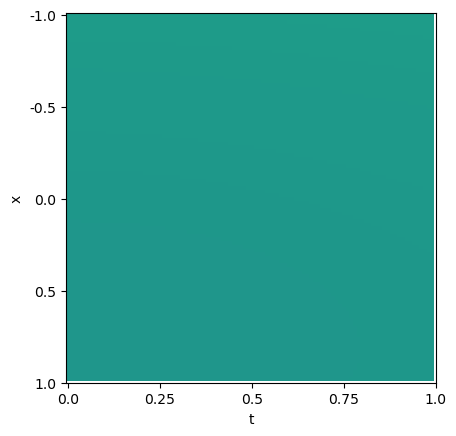

In [31]:
# plot the result as training progresses
plt.figure()
plt.imshow(y.reshape(100,100).detach(), vmin=-1, vmax=1)
plt.xticks(np.linspace(0,100,5).astype(int), np.linspace(0,1,5))
plt.yticks(np.linspace(0,100,5).astype(int), np.linspace(-1,1,5))
plt.xlabel("t"); plt.ylabel("x")
#plt.title("Training step: %i"%(i+1))
plt.show()
	

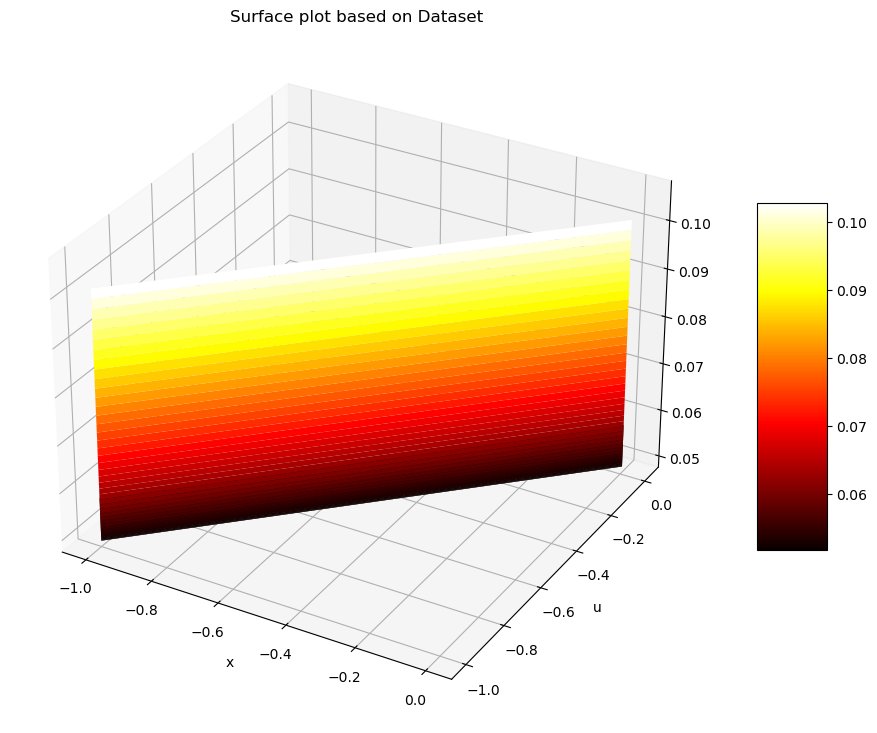

In [32]:
# Creating 3D figure:
fig = plt.figure(figsize =(14, 9)) 
ax = plt.axes(projection ='3d') 

# Creating color map 
my_cmap = plt.get_cmap('hot') 

# Creating plot 
surf = ax.plot_surface(x_test[0].detach().numpy(), x_test[1].detach().numpy(), y.detach().numpy(), cmap = my_cmap, edgecolor ='none') 

fig.colorbar(surf, ax = ax, shrink = 0.5, aspect = 5) 

ax.set_title('Surface plot based on Dataset') 
plt.xlabel("x")
plt.ylabel("t")
plt.ylabel("u")

# show plot 
plt.show() 




In [33]:
#for i in range(10000):
#    optimizer.zero_grad()
#    
#    # compute the "data loss"
#    y1, y2, y3 = model(x1), model(x2), model(x3)
#    loss1 = torch.mean((y1-u1)**2) + torch.mean((y2-u2)**2) + torch.mean((y3-u3)**2)
#    
#    # compute the "physics loss"
#    yp = model(x_physics)
#    dx  = torch.autograd.grad(yp, x_physics, torch.ones_like(yp), create_graph=True)[0]# computes dy/dx
#    dx1, dx2 = dx[:,0:1], dx[:,1:2]
#    dx1dx = torch.autograd.grad(dx1, x_physics, torch.ones_like(dx1), create_graph=True)[0]# computes d^2y/dx^2
#    dx1dx1 = dx1dx[:,0:1]
#    physics = (dx2[:,0] + yp[:,0] * dx1[:,0]) - (nu * dx1dx1[:,0])# computes the residual of the Burgers equation
#    loss2 = (0.1)*torch.mean(physics**2)
#    
#    # backpropagate joint loss
#    loss = loss1 + loss2# add two loss terms together
#    loss.backward()
#    optimizer.step()
#    
#    
#    # plot the result as training progresses
#    if (i+1) % 1000 == 0: 
#        y = model(x_test)
#        plt.figure()
#        plt.imshow(y.reshape(100,100).detach(), vmin=-1, vmax=1)
#        plt.xticks(np.linspace(0,100,5).astype(int), np.linspace(0,1,5))
#        plt.yticks(np.linspace(0,100,5).astype(int), np.linspace(-1,1,5))
#        plt.xlabel("t"); plt.ylabel("x")
#        plt.title("Training step: %i"%(i+1))
#        plt.show()
#